In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [5]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', '{:.2f}'.format)

Import Dataset

In [6]:
df = pd.read_csv("/content/used_cars_data.csv")
df.sample(5)

S.No.                            Name    Location  Year  \
3622  3622   Hyundai Santa Fe 4WD AT         Coimbatore  2016   
5037  5037   Hyundai i10 Sportz 1.2          Kolkata     2015   
10    10     Maruti Ciaz Zeta                Kochi       2018   
2334  2334   Toyota Fortuner 2.8 2WD AT      Ahmedabad   2016   
6650  6650   Mitsubishi Pajero Sport 4X2 AT  Coimbatore  2015   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
3622  28881              Diesel    Automatic    First      13.01 kmpl   
5037  18000              Petrol    Manual       First      20.36 kmpl   
10    25692              Petrol    Manual       First      21.56 kmpl   
2334  88008              Diesel    Automatic    Second     12.9 kmpl    
6650  76115              Diesel    Automatic    First      13.5 kmpl    

       Engine       Power  Seats   New_Price  Price  
3622  2199 CC  194.3 bhp  7.00    NaN        21.37   
5037  1197 CC  78.9 bhp   5.00    NaN        2.85    
10    1462 CC  103.25 bhp 5.00    10.65 Lakh 9.95    
2334  2755 CC  174.5 bhp  7.00    34.45 Lakh 22.50   
6650  2477 CC  175.56 bhp 7.00    32.41 Lakh NaN

Data Preparation

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [8]:
# Convert Mileage into numerical form
df["Mileage"] = df["Mileage"].str.replace(r"([kmpl/g])", "").astype("float")

In [9]:
# Convert Power Column in numerical form
df["Power"] = df["Power"].replace("null bhp", 0)
df["Power"] = df["Power"].str.replace(r"([ bhp])", "").astype("float")

mean_power = df[df["Power"] != 0]
df["Power"] = df["Power"].replace(0, mean_power["Power"].mean())
df["Power"].fillna(mean_power["Power"].mean(), inplace = True)

In [10]:
# Convert New Price Column in numerical form
df["New_Price"] = df["New_Price"].str.replace(r"([LakhCr])", "").astype("float")
df["New_Price"].fillna(0, inplace = True)

In [11]:
# Fill missing values with Average
df["Seats"].fillna(df["Seats"].mean(), inplace = True)

In [12]:
# Convert Engine Column in numerical form
df["Engine"] = df["Engine"].str.replace(r"([CC])", "").astype("float")
df["Engine"].fillna(df["Engine"].mean(), inplace = True)

In [13]:
# Drop New Price Column as it contains almost 90% missing values
df = df.drop(columns = ["New_Price"])

In [14]:
# Drop null values of Price Column
df = df[df['Price'].notna()]

In [15]:
# Rename Columns
df = df.rename(columns = {"Mileage": "Mileage kmpl/kg",
                          "Engine": "Engine CC",
                          "Power": "Power bph"})

Cleaned Data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage kmpl/kg    6017 non-null   float64
 9   Engine CC          6019 non-null   float64
 10  Power bph          6019 non-null   float64
 11  Seats              6019 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 658.3+ KB


In [17]:
df.describe()

S.No.    Year  Kilometers_Driven  Mileage kmpl/kg  Engine CC  \
count 6019.00 6019.00 6019.00            6017.00          6019.00      
mean  3009.00 2013.36 58738.38           18.13            1621.25      
std   1737.68 3.27    91268.84           4.58             599.55       
min   0.00    1998.00 171.00             0.00             72.00        
25%   1504.50 2011.00 34000.00           15.17            1198.00      
50%   3009.00 2014.00 53000.00           18.15            1493.00      
75%   4513.50 2016.00 73000.00           21.10            1969.00      
max   6018.00 2019.00 6500000.00         33.54            5998.00      

       Power bph   Seats   Price  
count 6019.00    6019.00 6019.00  
mean  113.24     5.28    9.48     
std   53.23      0.81    11.19    
min   34.20      0.00    0.44     
25%   78.00      5.00    3.50     
50%   98.60      5.00    5.64     
75%   138.03     5.00    9.95     
max   560.00     10.00   160.00

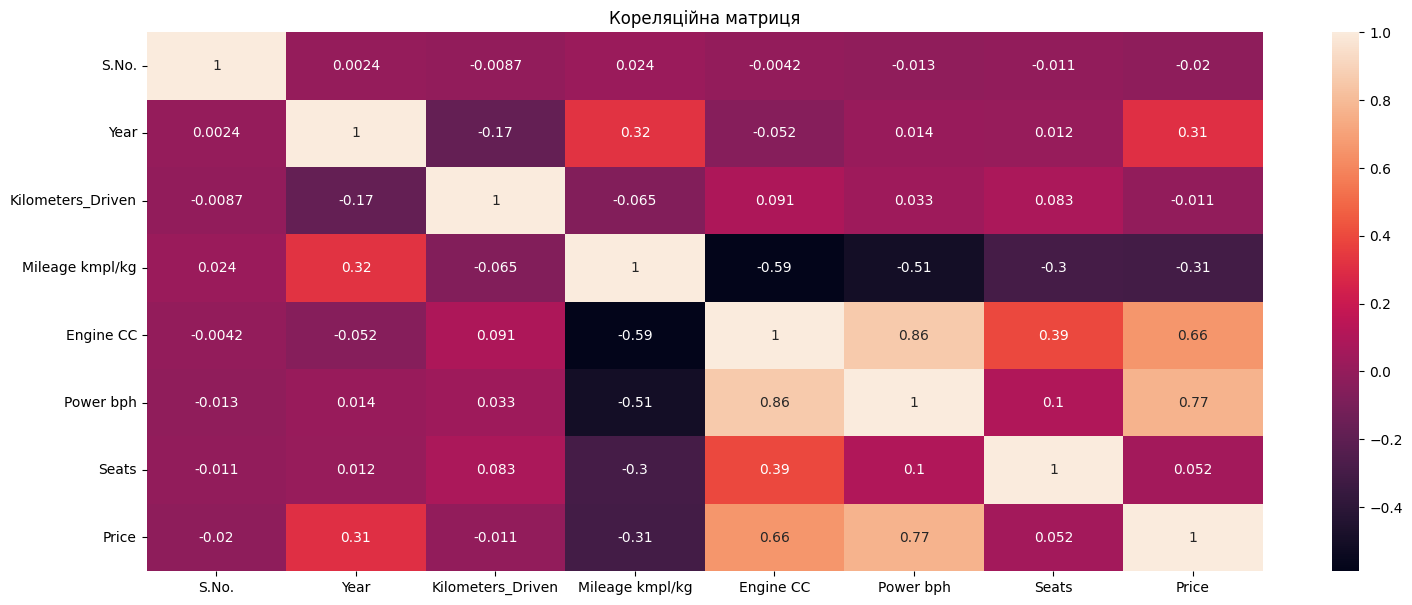

In [18]:
plt.figure(figsize = (18, 7))
correlation = df.corr()
sns.heatmap(correlation, annot = True)
plt.title("Кореляційна матриця")
plt.show()
plt.close()
plt.show()

Exploratory Data Analysis

Top 10 cars by frequency

In [ ]:
cars = df["Name"].value_counts().to_frame().reset_index().head(10)
cars.columns = ["Cars", "Frequency"]
cars

Cars  Frequency
0  Mahindra XUV500 W8 2WD      49       
1  Maruti Swift VDI            45       
2  Honda City 1.5 S MT         34       
3  Maruti Swift Dzire VDI      34       
4  Maruti Swift VDI BSIV       31       
5  Maruti Ritz VDi             30       
6  Hyundai i10 Sportz          30       
7  Toyota Fortuner 3.0 Diesel  29       
8  Honda Amaze S i-Dtech       27       
9  Hyundai Grand i10 Sportz    27

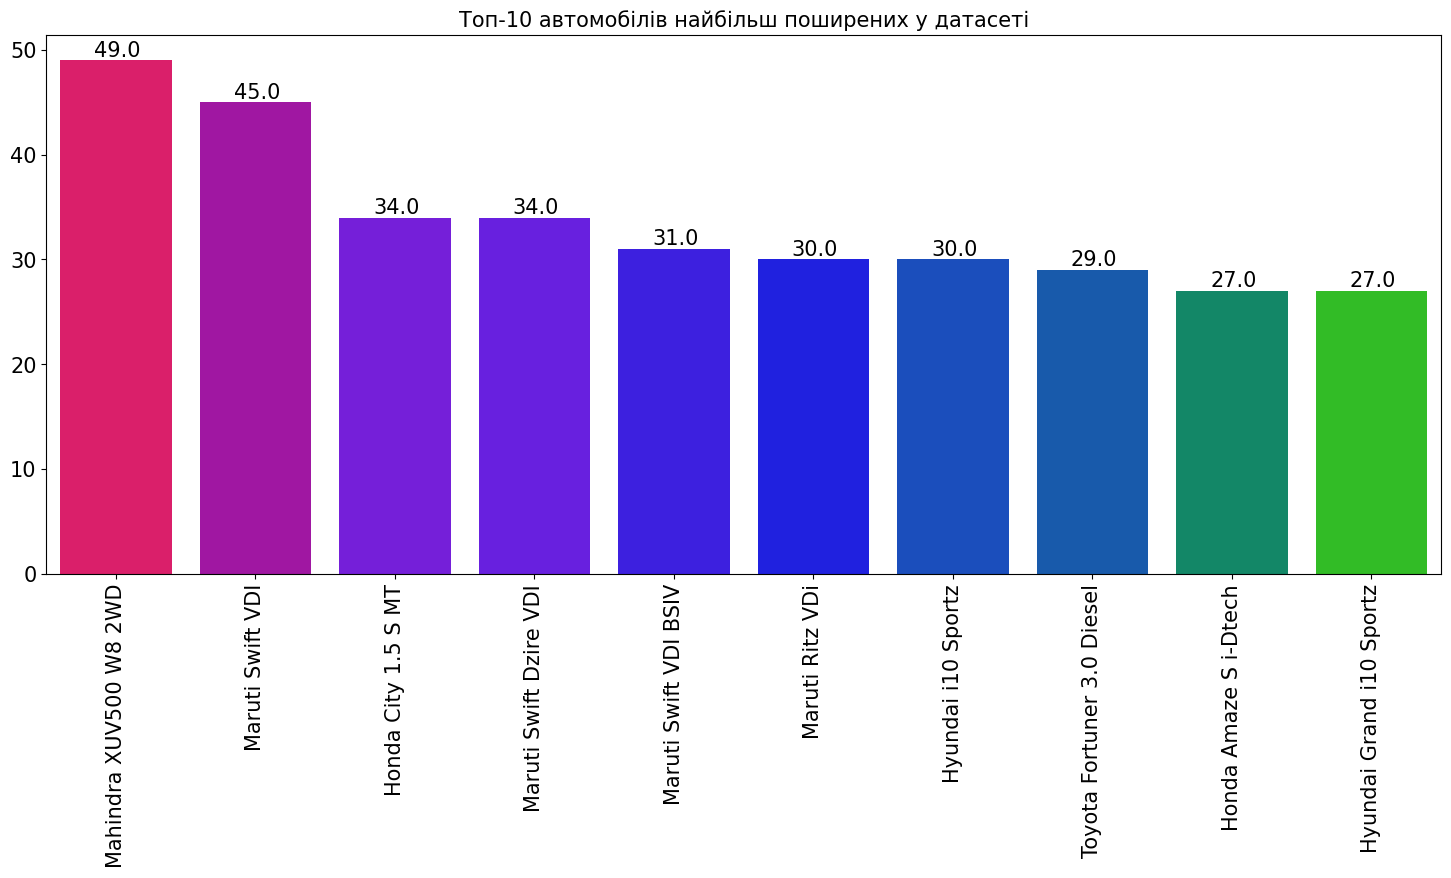

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Cars", y = "Frequency", data = cars, palette = "prism")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.41, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Топ-10 автомобілів найбільш поширених у датасеті", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Locations having number of cars selling

In [ ]:
city = df["Location"].value_counts().reset_index()
city.columns = ["City", "Cars"]
city

City  Cars
0   Mumbai      790 
1   Hyderabad   742 
2   Kochi       651 
3   Coimbatore  636 
4   Pune        622 
5   Delhi       554 
6   Kolkata     535 
7   Chennai     494 
8   Jaipur      413 
9   Bangalore   358 
10  Ahmedabad   224

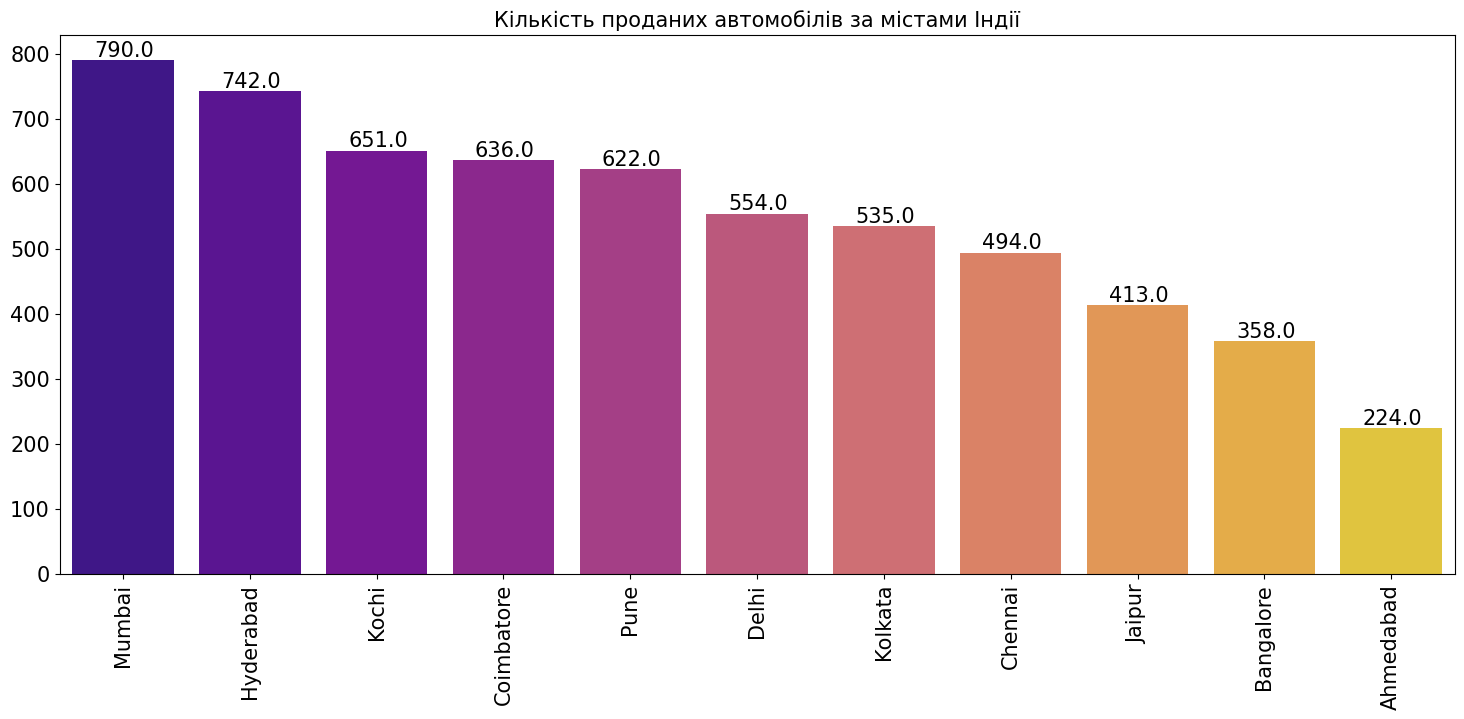

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x="City", y = "Cars", data = city, palette = "plasma")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.41, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Кількість проданих автомобілів за містами Індії", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Years having number of cars selling

In [ ]:
years = df["Year"].value_counts().to_frame().reset_index()
years.columns = ["Years", "Cars"]
years

Years  Cars
0   2014   797 
1   2015   744 
2   2016   741 
3   2013   649 
4   2017   587 
5   2012   580 
6   2011   466 
7   2010   342 
8   2018   298 
9   2009   198 
10  2008   174 
11  2007   125 
12  2019   102 
13  2006   78  
14  2005   57  
15  2004   31  
16  2003   17  
17  2002   15  
18  2001   8   
19  2000   4   
20  1998   4   
21  1999   2

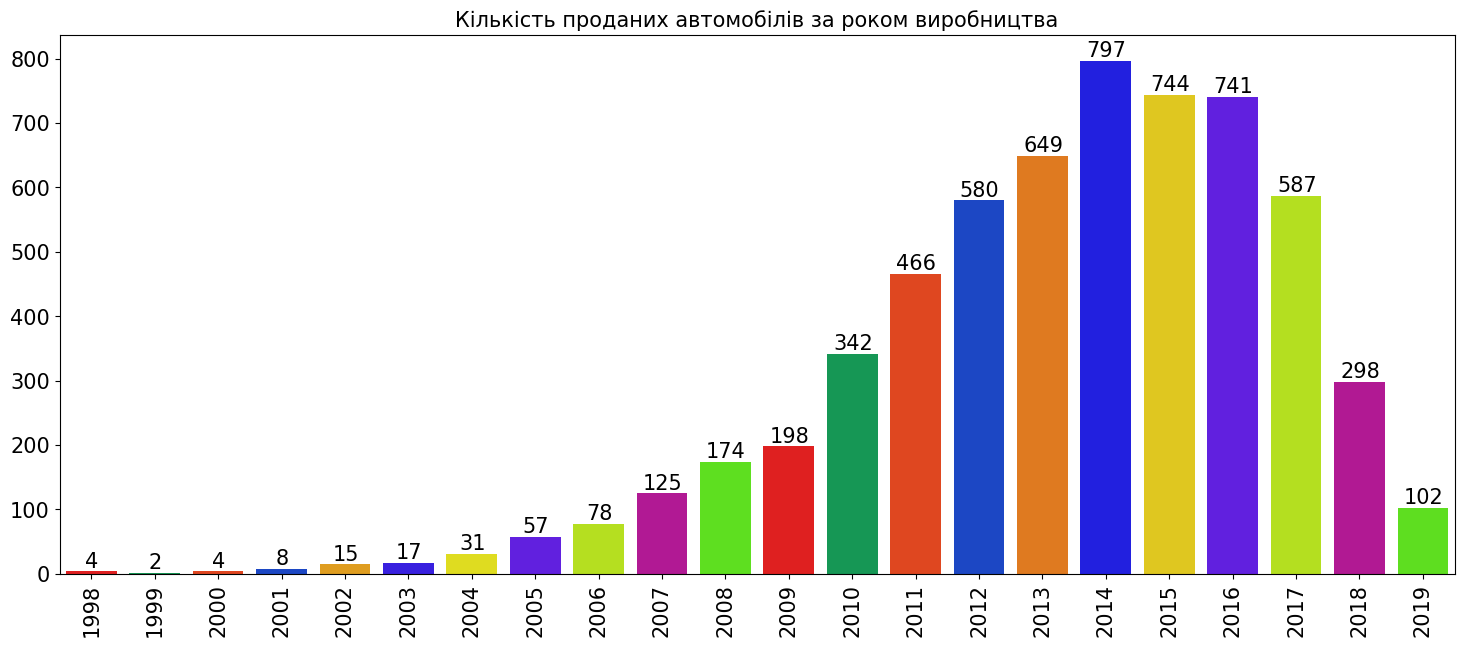

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Years", y = "Cars", data = years, palette = "prism_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.41, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Кількість проданих автомобілів за роком виробництва", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Kilometers Drive by Frequency of Cars

In [ ]:
Kilometers_Driven = df["Kilometers_Driven"].value_counts().to_frame().reset_index().head(10)
Kilometers_Driven.columns = ["Kilometers Drive", "Cars"]
Kilometers_Driven

Kilometers Drive  Cars
0  60000             82  
1  45000             70  
2  65000             68  
3  50000             61  
4  55000             60  
5  70000             60  
6  30000             54  
7  52000             54  
8  80000             50  
9  75000             50

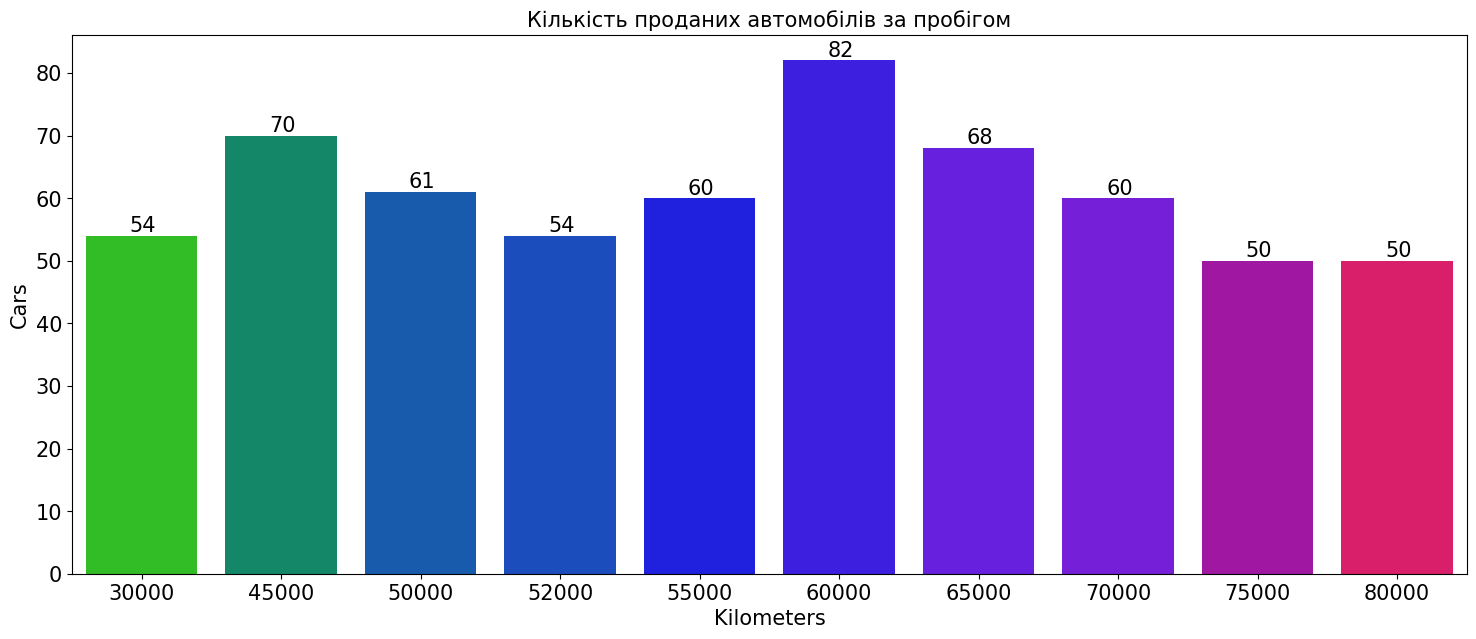

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Kilometers Drive", y = "Cars", data = Kilometers_Driven, palette = "prism_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.41, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Кількість проданих автомобілів за пробігом", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Kilometers", size = 15)
plt.ylabel("Cars", size = 15)
plt.show()

Fuel Types used by cars

In [ ]:
fuel_cars = df["Fuel_Type"].value_counts().to_frame().reset_index()
fuel_cars.columns = ["Fuel Type", "Cars"]
fuel_cars

Fuel Type  Cars
0  Diesel    3205
1  Petrol    2746
2  CNG       56  
3  LPG       10  
4  Electric  2

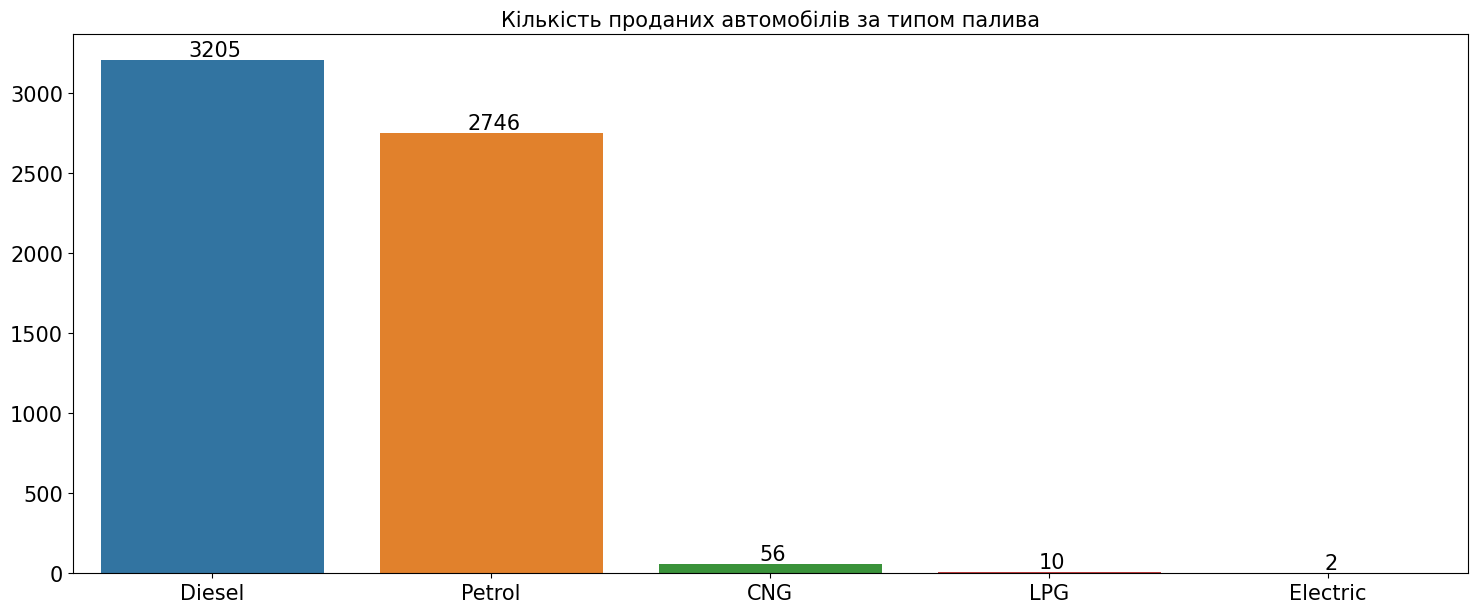

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Fuel Type", y = "Cars", data = fuel_cars)
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.41, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Кількість проданих автомобілів за типом палива", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Transmission Type in Cars

In [ ]:
transmission_cars = df["Transmission"].value_counts().to_frame().reset_index()
transmission_cars.columns = ["Transmission Type", "Cars"]
transmission_cars

Transmission Type  Cars
0  Manual            4299
1  Automatic         1720

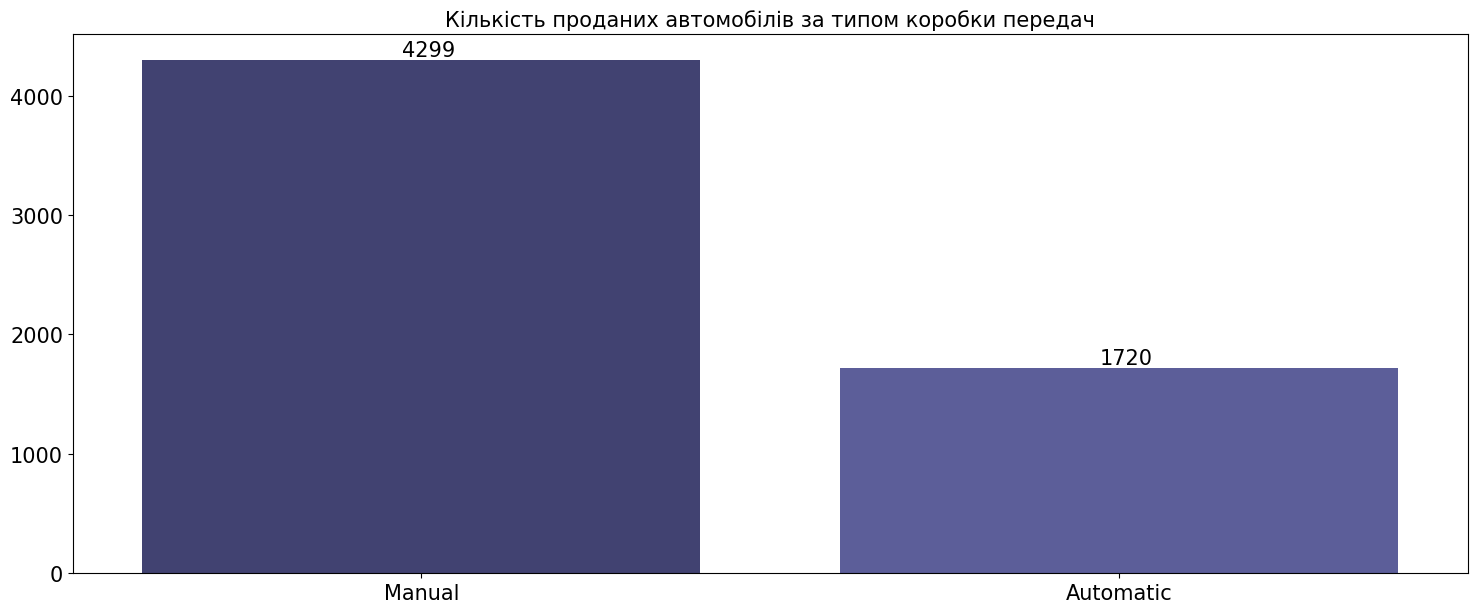

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Transmission Type", y = "Cars", data = transmission_cars, palette = "tab20b")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.41, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Кількість проданих автомобілів за типом коробки передач", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Number of Cars by owner type

In [ ]:
cars_owner = df["Owner_Type"].value_counts().to_frame().reset_index()
cars_owner.columns = ["Owner", "Cars"]
cars_owner

Owner  Cars
0  First           4929
1  Second          968 
2  Third           113 
3  Fourth & Above  9

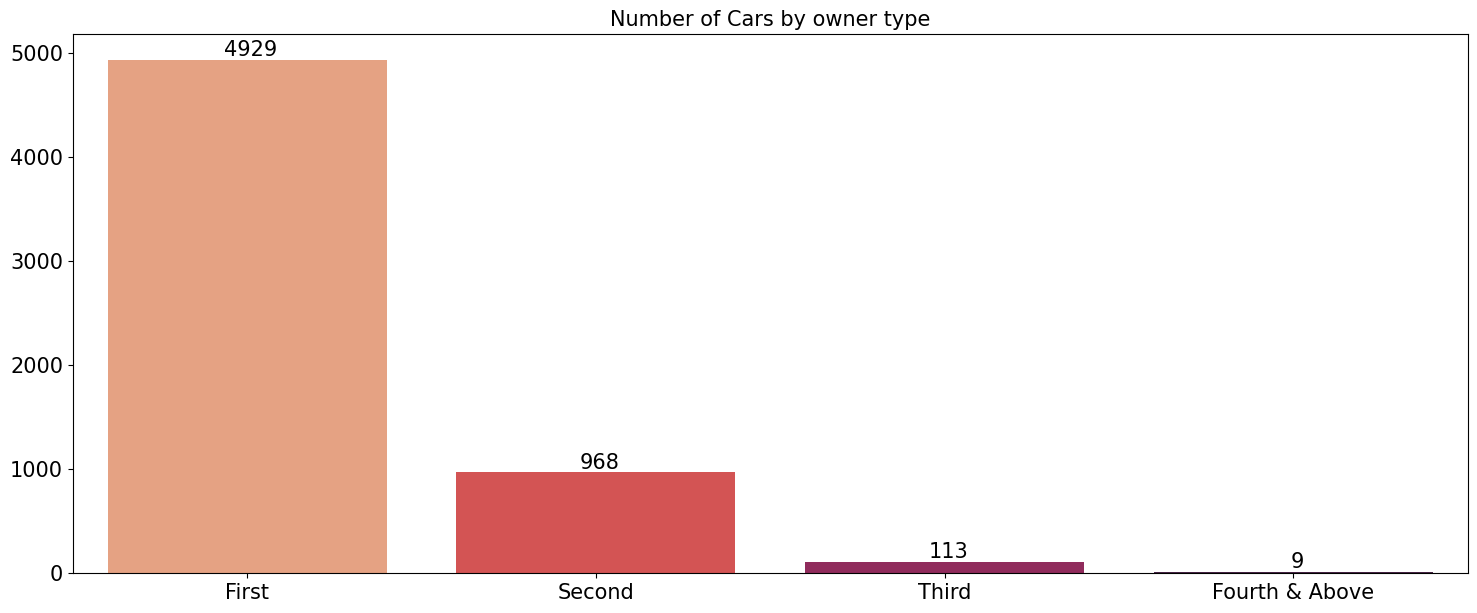

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Owner", y = "Cars", data = cars_owner, palette = "rocket_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.41, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Number of Cars by owner type", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Highest number of cars by mileage

In [ ]:
mileage_cars = df["Mileage kmpl/kg"].value_counts().to_frame().reset_index().head(10)
mileage_cars.columns = ["Mileage", "Cars"]
mileage_cars

Mileage  Cars
0 17.00     173 
1 18.90     172 
2 18.60     119 
3 20.36     88  
4 21.10     87  
5 17.80     85  
6 16.00     76  
7 12.80     72  
8 20.00     71  
9 18.00     69

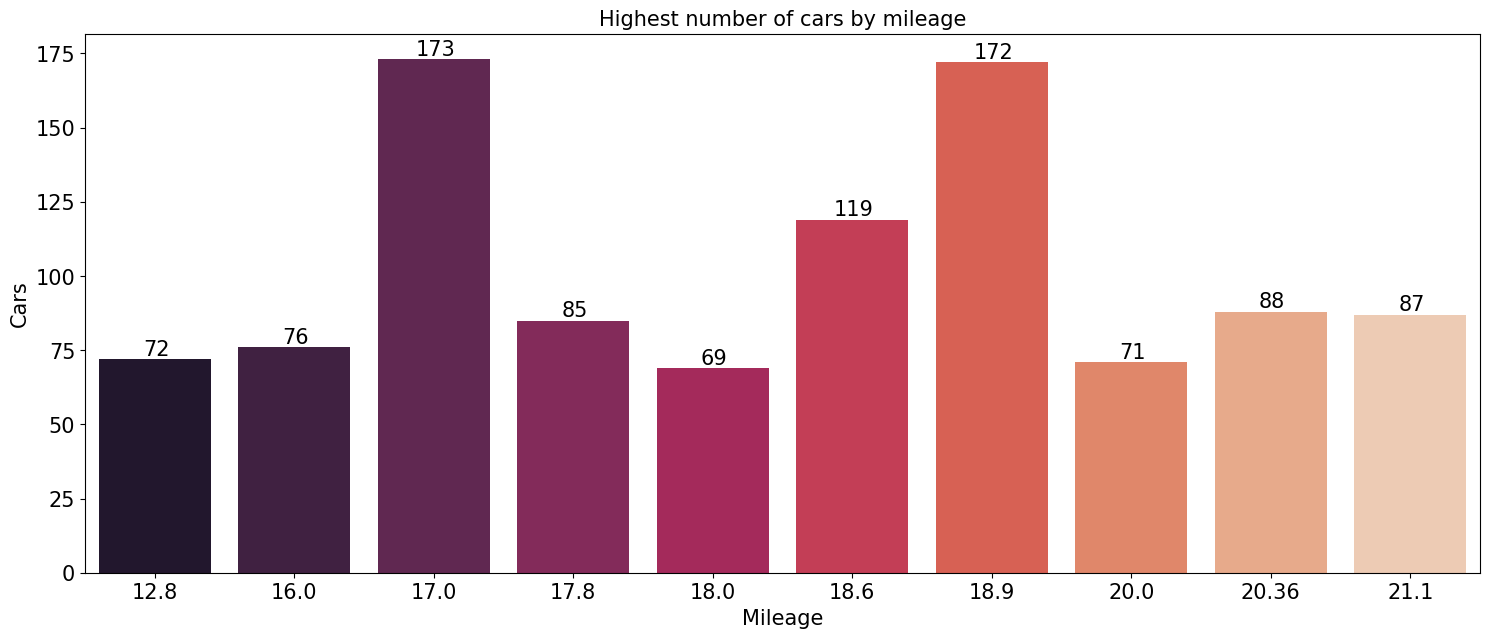

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Mileage", y = "Cars", data = mileage_cars, palette = "rocket")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.41, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Highest number of cars by mileage", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Mileage", size = 15)
plt.ylabel("Cars", size = 15)
plt.show()

Number of Cars by Highest Mileage

In [ ]:
highest_mileage = df["Mileage kmpl/kg"].value_counts().to_frame().reset_index().sort_values(by = "index", ascending = False).head(10)
highest_mileage.columns = ["Mileage", "Cars"]
highest_mileage

Mileage  Cars
228 33.54     5   
273 33.44     4   
326 32.26     2   
327 31.79     2   
380 30.46     1   
35  28.40     40  
66  28.09     28  
265 27.62     4   
271 27.40     4   
140 27.39     13

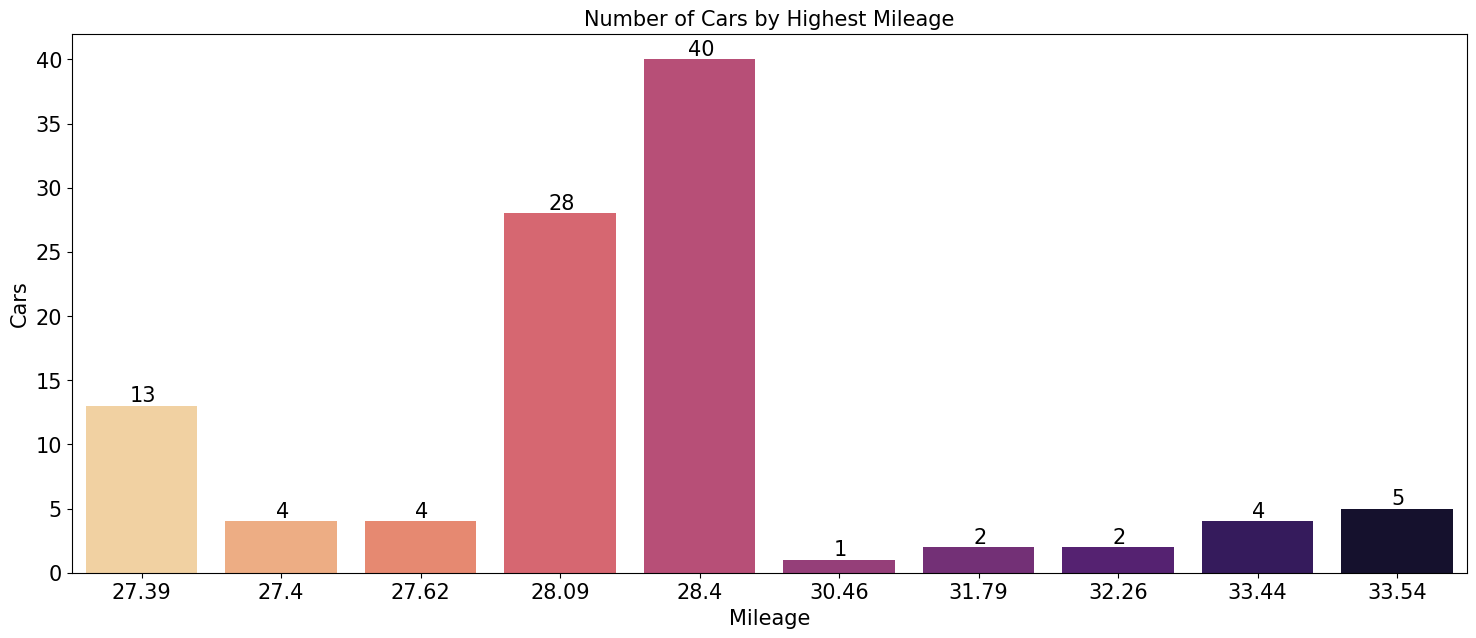

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Mileage", y = "Cars", data = highest_mileage, palette = "magma_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.41, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Number of Cars by Highest Mileage", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Mileage", size = 15)
plt.ylabel("Cars", size = 15)
plt.show()

Highest number of cars by Engine CC

In [ ]:
engine = df["Engine CC"].value_counts().to_frame().reset_index().head(10)
engine.columns = ["Engine CC", "Cars"]
engine

Engine CC  Cars
0 1197.00     606 
1 1248.00     512 
2 1498.00     304 
3 998.00      259 
4 2179.00     240 
5 1497.00     229 
6 1198.00     227 
7 1968.00     216 
8 1995.00     183 
9 1461.00     152

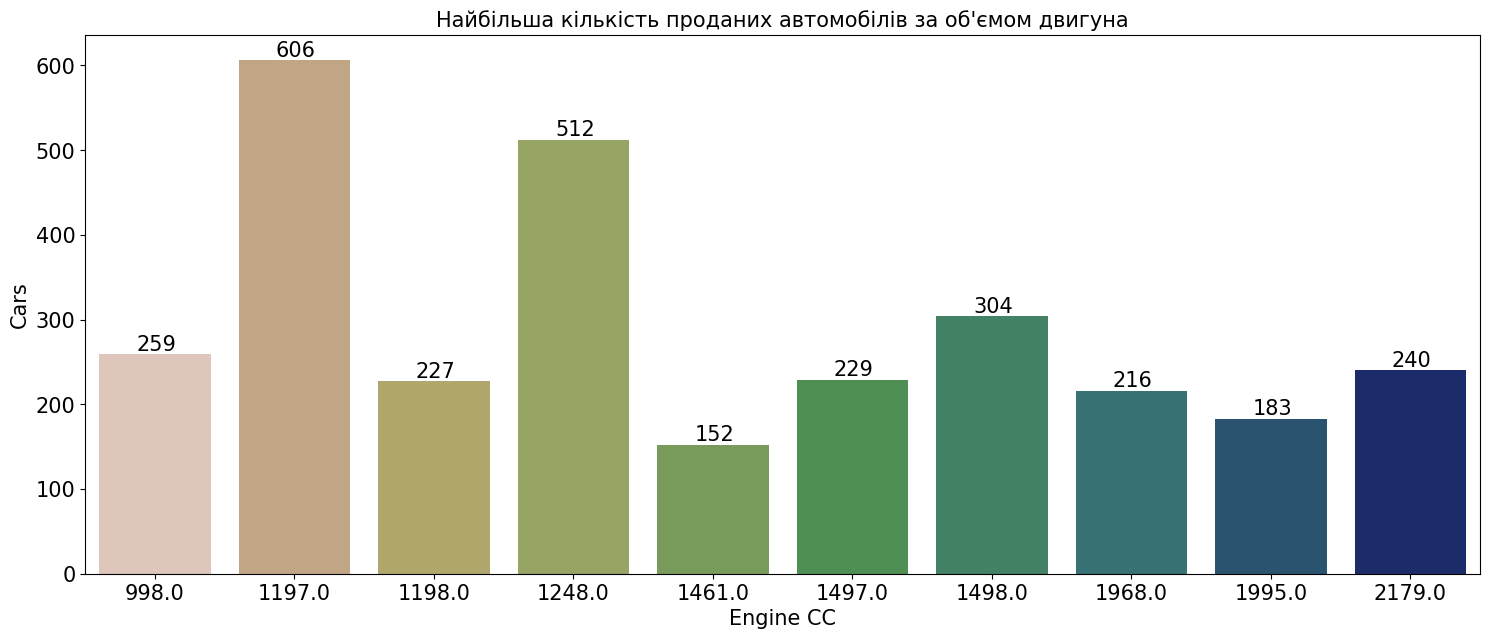

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Engine CC", y = "Cars", data = engine, palette = "gist_earth_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.41, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Найбільша кількість проданих автомобілів за об'ємом двигуна", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Engine CC", size = 15)
plt.ylabel("Cars", size = 15)
plt.show()

Number of Cars by Highest Engine CC

In [ ]:
engine = df["Engine CC"].value_counts().to_frame().reset_index().sort_values(by = "index", ascending = False).head(10)
engine.columns = ["Engine CC", "Cars"]
engine

Engine CC  Cars
126 5998.00     1   
104 5461.00     3   
129 5204.00     1   
115 5000.00     2   
121 4951.00     1   
98  4806.00     4   
107 4395.00     3   
89  4367.00     5   
79  4134.00     8   
111 3597.00     2

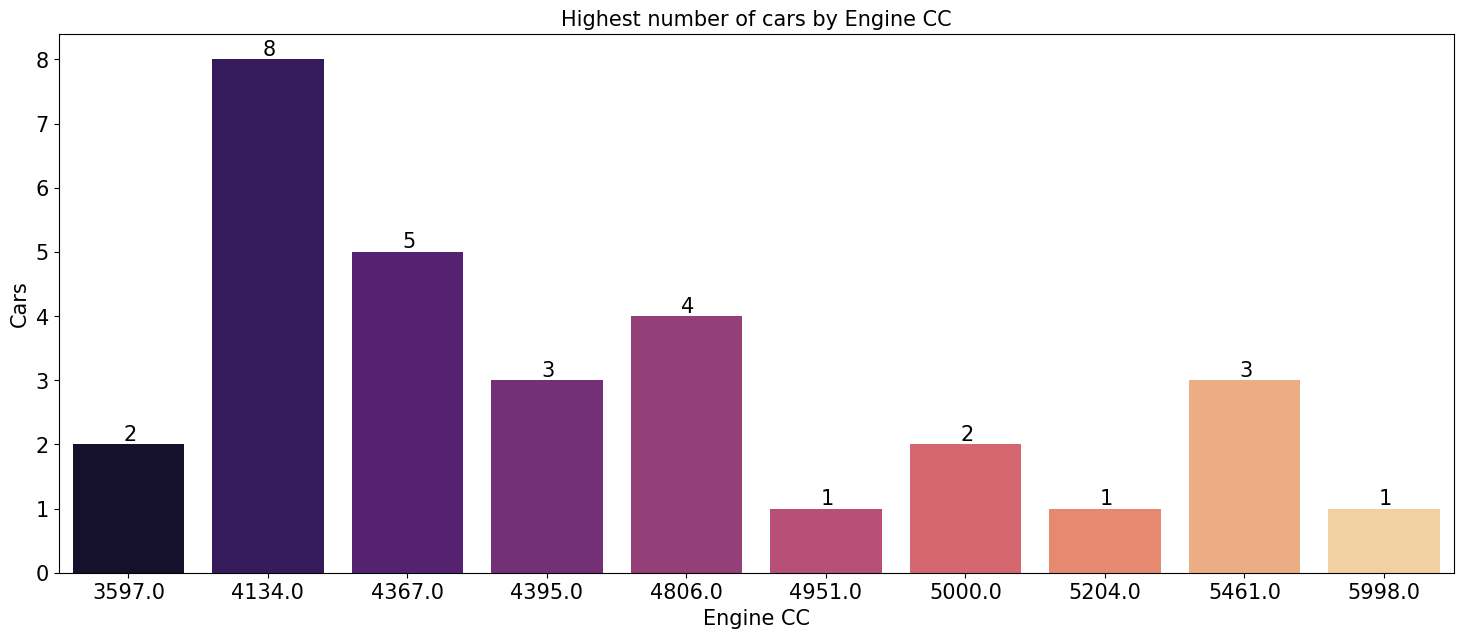

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Engine CC", y = "Cars", data = engine, palette = "magma")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.41, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Highest number of cars by Engine CC", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Engine CC", size = 15)
plt.ylabel("Cars", size = 15)
plt.show()

Highest number of cars by Power bph

In [ ]:
power = df["Power bph"].value_counts().to_frame().reset_index()
power.columns = ["Power bph", "Cars"]
power = power.head(10)
power

Power bph  Cars
0 74.00       235 
1 112.77      143 
2 98.60       131 
3 73.90       125 
4 140.00      123 
5 88.50       112 
6 78.90       111 
7 67.10       107 
8 67.04       107 
9 82.00       101

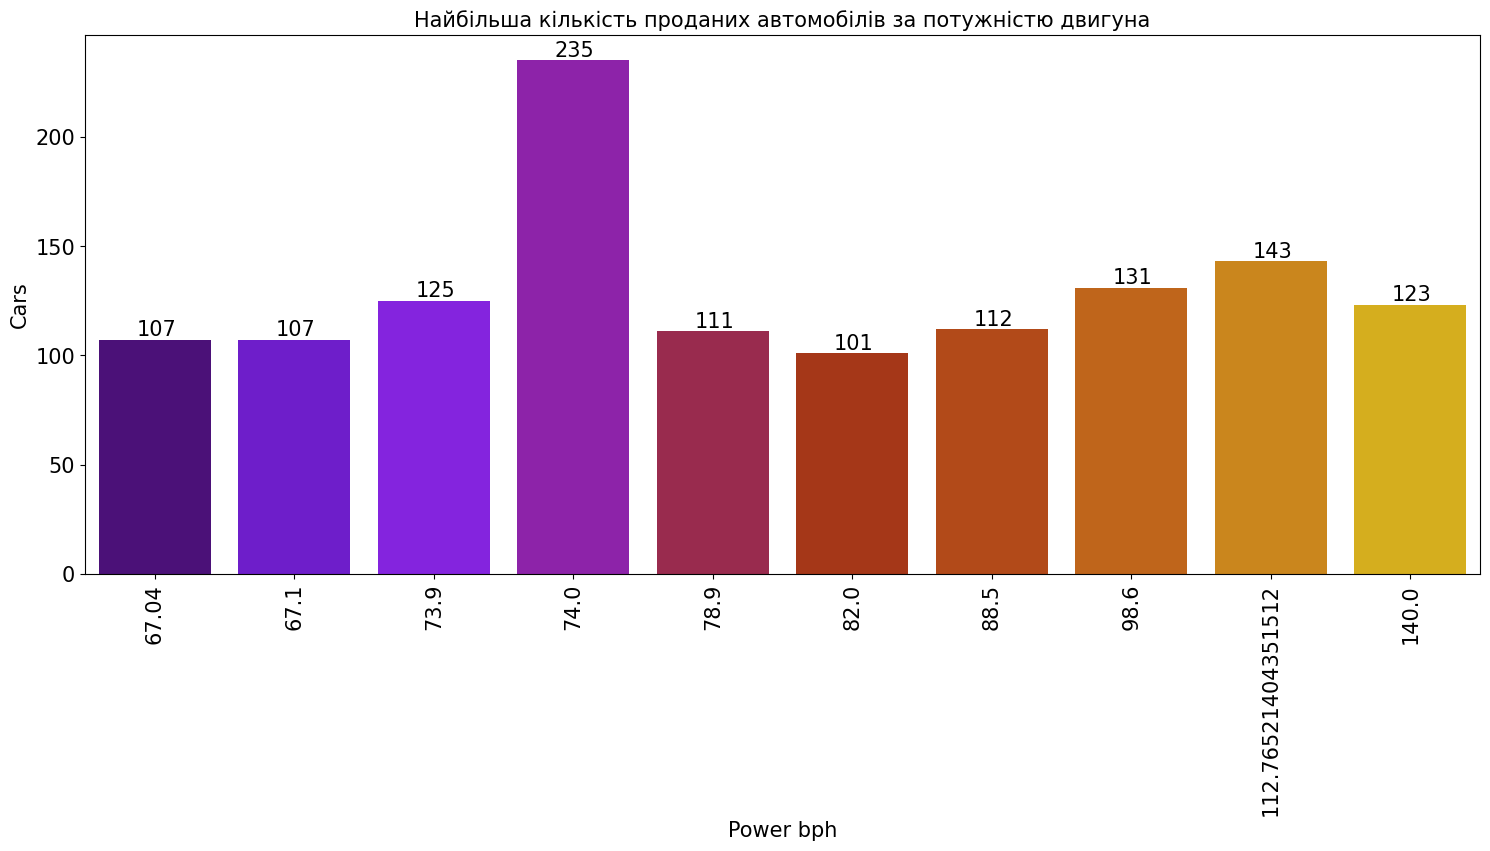

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Power bph", y = "Cars", data = power, palette = "gnuplot")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.41, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Найбільша кількість проданих автомобілів за потужністю двигуна", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel("Power bph", size = 15)
plt.ylabel("Cars", size = 15)
plt.show()

Number of Cars by Highest Power bph

In [ ]:
power = df["Power bph"].value_counts().to_frame().reset_index().sort_values(by = "index", ascending = False).head(10)
power.columns = ["Power bph", "Cars"]
power

Power bph  Cars
328 560.00      1   
321 552.00      1   
349 550.00      1   
325 503.00      1   
323 500.00      1   
309 488.10      1   
263 450.00      2   
287 444.00      2   
311 421.00      1   
359 402.00      1

Highest number of cars by Seats

In [ ]:
seats = df["Seats"].value_counts().to_frame().reset_index().head(10)
seats.columns = ["Seats", "Cars"]
seats

Seats  Cars
0 5.00    5014
1 7.00    674 
2 8.00    134 
3 4.00    99  
4 5.28    42  
5 6.00    31  
6 2.00    16  
7 10.00   5   
8 9.00    3   
9 0.00    1

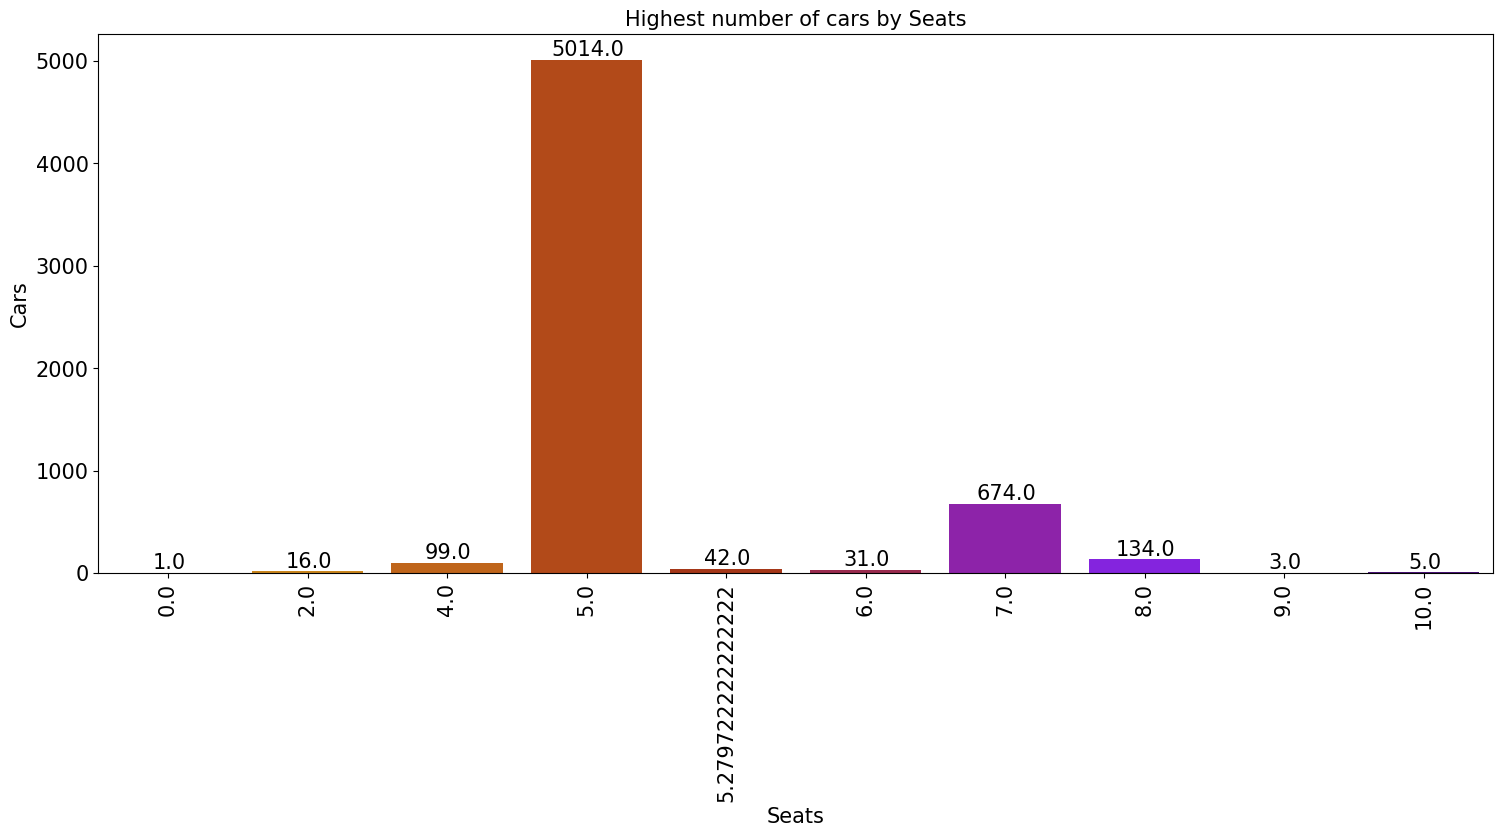

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Seats", y = "Cars", data = seats, palette = "gnuplot_r")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.41, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Highest number of cars by Seats", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel("Seats", size = 15)
plt.ylabel("Cars", size = 15)
plt.show()

Highest number of cars by Price

In [ ]:
price = df["Price"].value_counts().to_frame().reset_index().head(10)
price.columns = ["Price (Lakhs)", "Cars"]
price

Price (Lakhs)  Cars
0 4.50            88  
1 5.50            84  
2 3.50            82  
3 4.25            73  
4 3.25            71  
5 3.00            68  
6 6.50            64  
7 2.50            63  
8 4.00            56  
9 4.75            53

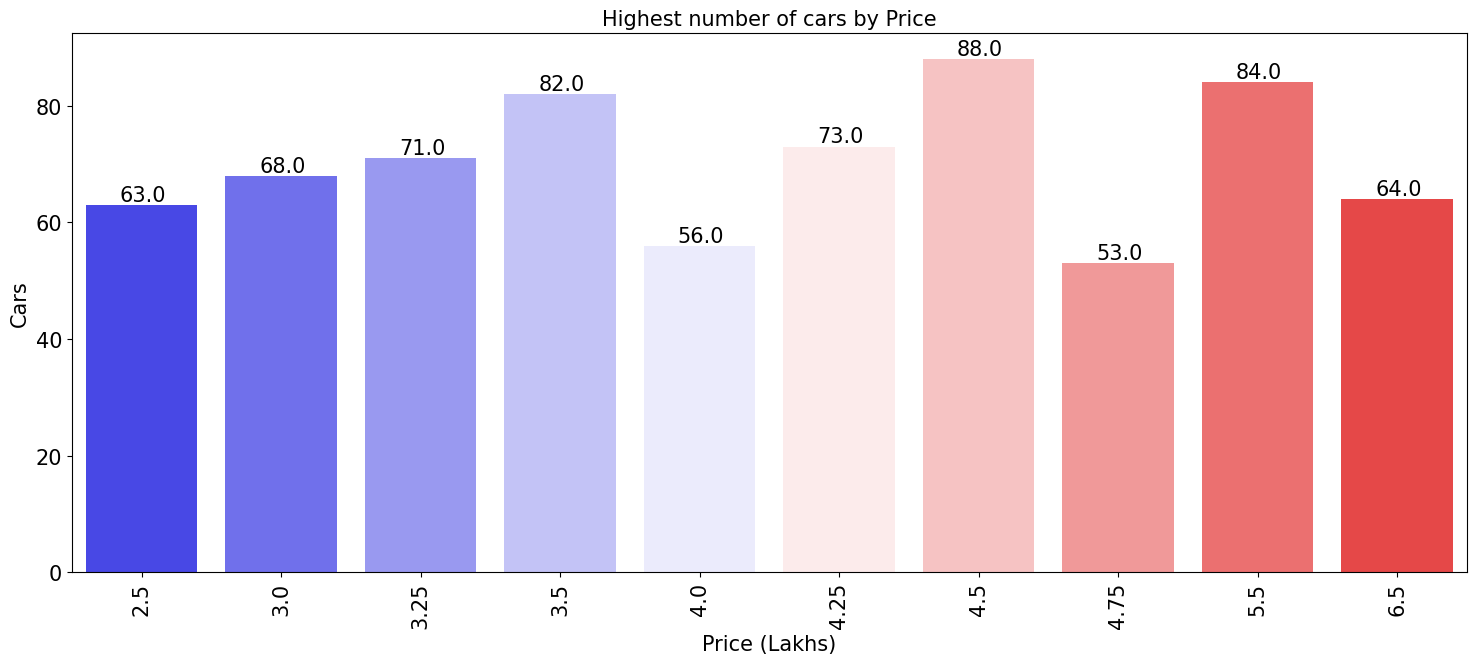

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Price (Lakhs)", y = "Cars", data = price, palette = "bwr")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.41, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Highest number of cars by Price", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel("Price (Lakhs)", size = 15)
plt.ylabel("Cars", size = 15)
plt.show()

Number of Cars by Highest Price

In [ ]:
price = df["Price"].value_counts().to_frame().reset_index().sort_values(by = "index", ascending = False).head(10)
price.columns = ["Price (Lakhs)", "Cars"]
price

Price (Lakhs)  Cars
877  160.00          1   
887  120.00          1   
671  100.00          1   
1166 97.07           1   
1360 93.67           1   
1362 93.00           1   
841  90.00           1   
814  85.00           1   
1350 83.96           1   
410  79.00           2

Deep Analysis

In [ ]:
df.head()

S.No.                              Name    Location  Year  \
0  0      Maruti Wagon R LXI CNG            Mumbai      2010   
1  1      Hyundai Creta 1.6 CRDi SX Option  Pune        2015   
2  2      Honda Jazz V                      Chennai     2011   
3  3      Maruti Ertiga VDI                 Chennai     2012   
4  4      Audi A4 New 2.0 TDI Multitronic   Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage kmpl/kg  \
0  72000              CNG       Manual       First     26.60              
1  41000              Diesel    Manual       First     19.67              
2  46000              Petrol    Manual       First     18.20              
3  87000              Diesel    Manual       First     20.77              
4  40670              Diesel    Automatic    Second    15.20              

   Engine CC  Power bph  Seats  Price  
0 998.00     58.16      5.00   1.75    
1 1582.00    126.20     5.00   12.50   
2 1199.00    88.70      5.00   4.50    
3 1248.00    88.76      7.00   6.00    
4 1968.00    140.80     5.00   17.74

Highest Car Model available for sale by location

In [ ]:
nl = df.groupby(["Location", "Name"])["Name"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False)
nl = nl.drop_duplicates("Location", keep = "first")
nl.columns = ["City", "Car Model", "Cars"]
nl

City                             Car Model  Cars
1950  Hyderabad   Maruti Ritz VDi                       12  
3152  Kolkata     Maruti Swift Dzire VDI                9   
1474  Delhi       Mahindra XUV500 W8 2WD                9   
1003  Coimbatore  Hyundai Grand i10 AT Asta             8   
4102  Pune        Maruti Swift VDI                      8   
2715  Kochi       Mahindra XUV500 W8 2WD                8   
2220  Jaipur      Hyundai EON Era Plus                  7   
3743  Mumbai      Skoda Superb Elegance 1.8 TSI AT      7   
188   Bangalore   Audi A4 2.0 TDI 177 Bhp Premium Plus  5   
717   Chennai     Maruti Swift VDI                      5   
133   Ahmedabad   Maruti Wagon R LXI                    4

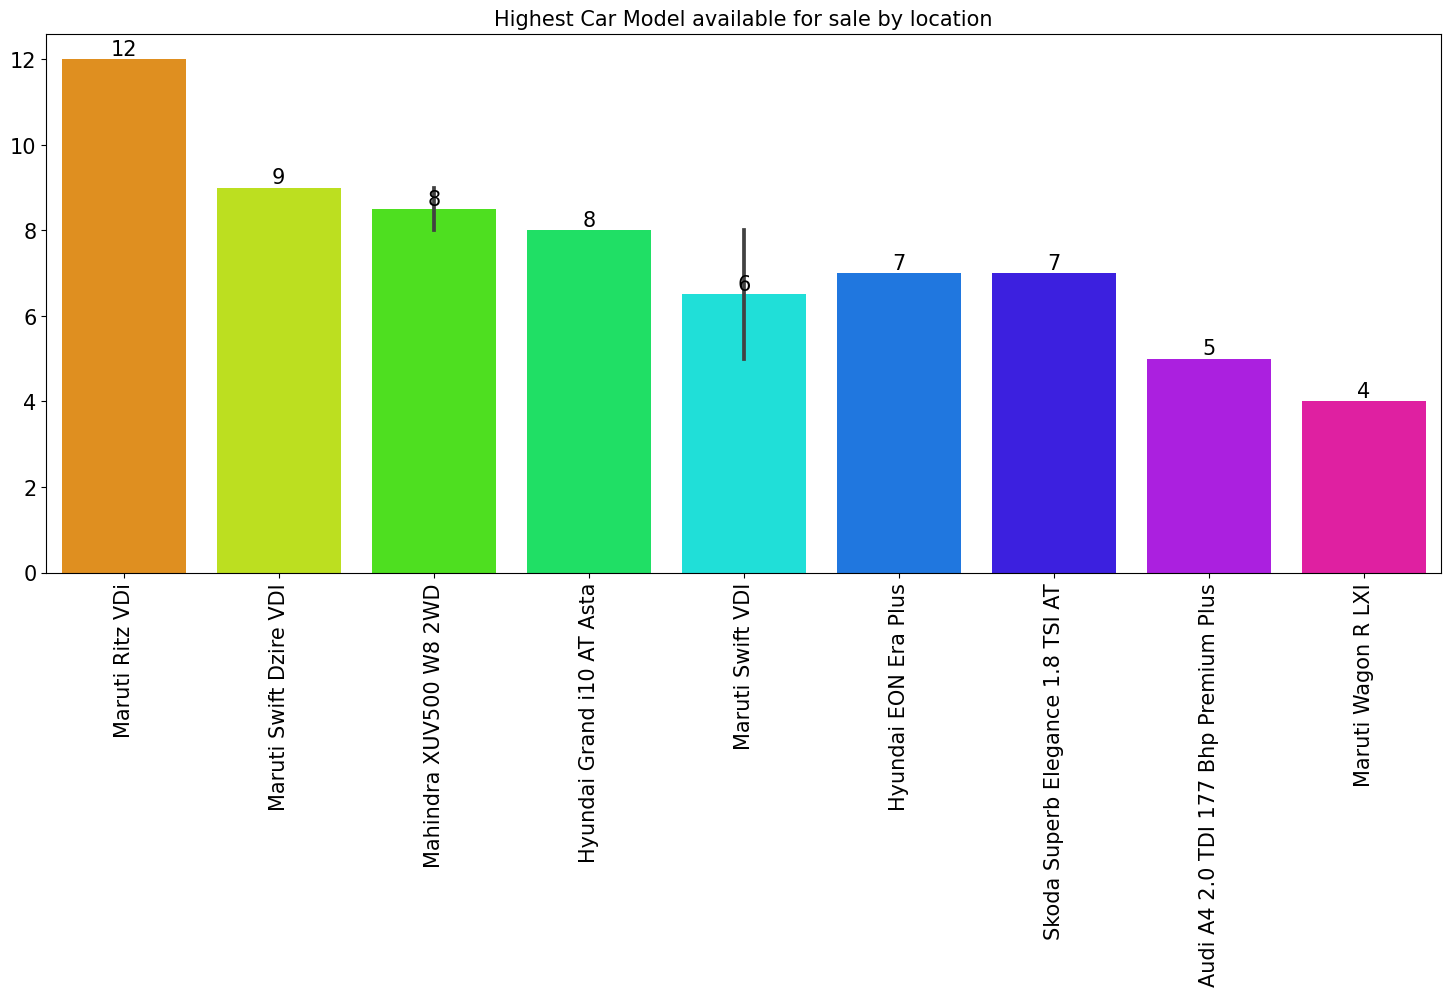

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Car Model", y = "Cars", data = nl, palette = "hsv")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.4, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Highest Car Model available for sale by location", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Highest Car Model available for sale by Year

In [ ]:
cy = df.groupby(["Year", "Name"])["Name"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False)
cy = cy.drop_duplicates("Year", keep = "first")
cy.columns = ["Year", "Car Model", "Cars"]
cy

Year                                              Car Model  Cars
2035  2014  Maruti Swift VDI                                       14  
1265  2012  Maruti Swift VDI                                       12  
3029  2016  Renault KWID RXT                                       12  
1573  2013  Mahindra XUV500 W8 2WD                                 11  
837   2011  Honda City 1.5 S MT                                    10  
754   2010  Toyota Fortuner 3.0 Diesel                             9   
452   2009  Honda City 1.5 S MT                                    9   
2483  2015  Maruti Swift Dzire VDI                                 9   
3387  2017  Maruti Vitara Brezza ZDi Plus Dual Tone                7   
3685  2018  Mercedes-Benz New C-Class C 220d Avantgarde Edition C  7   
356   2008  Maruti Alto LXi                                        5   
188   2007  Chevrolet Aveo U-VA 1.2 LS                             4   
85    2005  Hyundai Accent GLE                                     4   
164   2006  Maruti Wagon R LXI                                     3   
3791  2019  Mercedes-Benz CLA 200 CDI Sport                        3   
61    2004  Hyundai Santro Xing XP                                 2   
0     1998  Maruti 1000 AC                                         1   
48    2003  Skoda Octavia Elegance 1.9 TDI                         1   
26    2002  Maruti Alto Vxi 1.1                                    1   
11    2001  Honda City 1.5 EXI                                     1   
4     1999  Honda City 1.3 EXI                                     1   
6     2000  Mahindra Bolero ZLX BSIII                              1

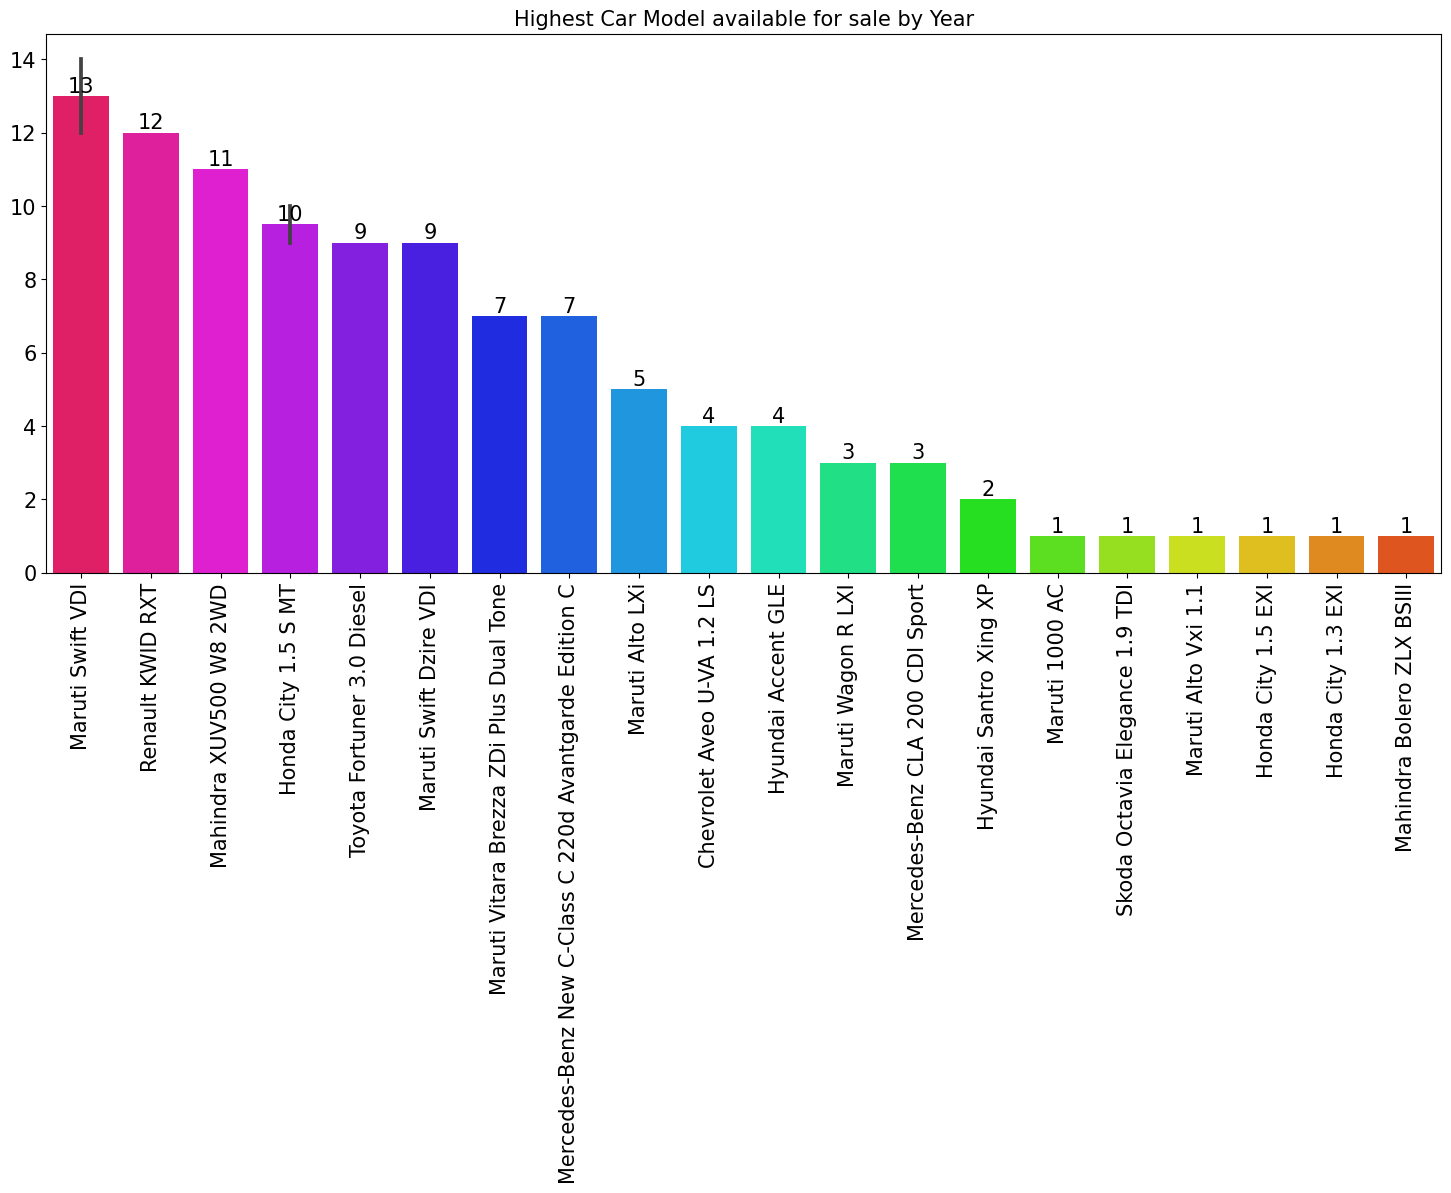

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Car Model", y = "Cars", data = cy, palette = "hsv_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.4, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Highest Car Model available for sale by Year", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Car Model available for sale by small Kilometers Driven

In [ ]:
kd = df.groupby(["Kilometers_Driven", "Name"])["Name"].agg(["count"]).reset_index().sort_values(by = "Kilometers_Driven")
kd = kd.drop_duplicates("Name", keep = "first")
kd.columns = ["Kilometers_Driven", "Car Model", "Cars"]
kd = kd.head(10)
kd

Kilometers_Driven                                   Car Model  Cars
0   171                Maruti Alto 800 2016-2019 VXI               1   
1   600                Maruti Wagon R ZXI AMT 1.2                  1   
10  1000               Volkswagen Polo 1.0 MPI Trendline           1   
8   1000               Tata Tigor 1.2 Revotron XTA                 1   
7   1000               Renault KWID RXL                            1   
6   1000               Maruti Ignis 1.2 Alpha                      1   
9   1000               Tata Xenon XT EX 4X2                        1   
4   1000               Hyundai i20 Active SX Dual Tone Petrol      1   
3   1000               Hyundai Grand i10 1.2 Kappa Asta            1   
2   1000               Ford Figo 2015-2019 1.2P Sports Edition MT  1

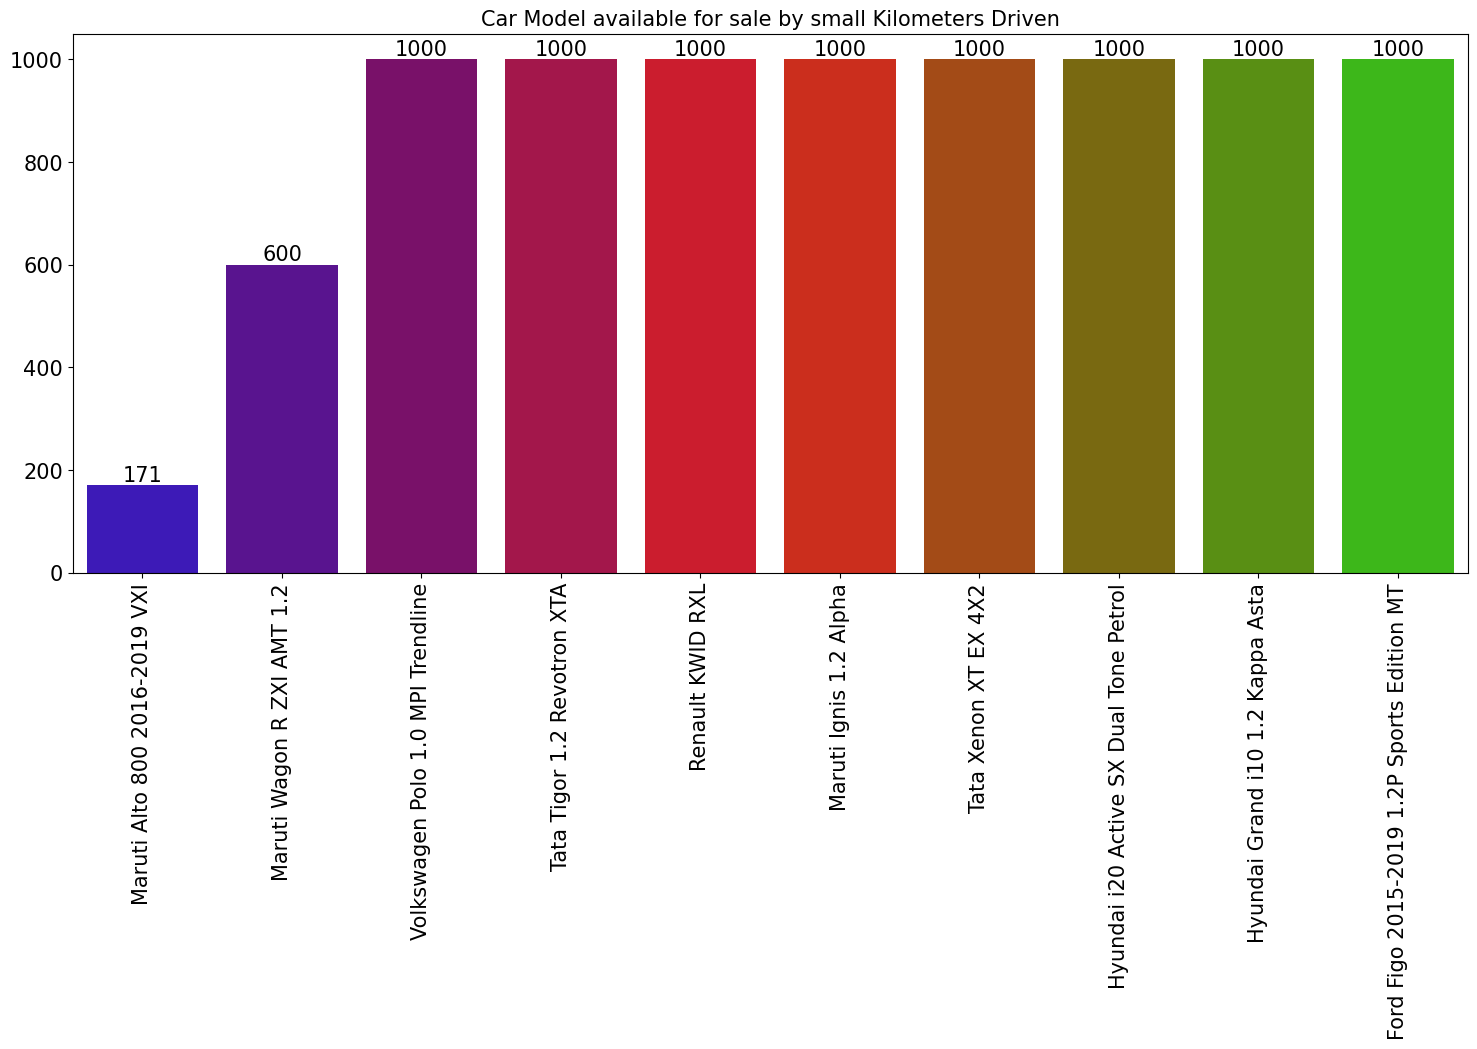

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Car Model", y = "Kilometers_Driven", data = kd, palette = "brg")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.4, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Car Model available for sale by small Kilometers Driven", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Car Models available for sale by highest Mileage kmpl/kg

In [ ]:
cm = df.groupby(["Mileage kmpl/kg", "Name"])["Name"].agg(["count"]).reset_index().sort_values(by = "Mileage kmpl/kg", ascending = False)
cm = cm.drop_duplicates("Name", keep = "first")
cm.columns = ["Mileage kmpl/kg", "Car Model", "Cars"]
cm = cm.head(10)
cm

Mileage kmpl/kg                          Car Model  Cars
1963 33.54             Maruti Wagon R CNG LXI             5   
1962 33.44             Maruti Alto 800 2016-2019 CNG LXI  4   
1961 32.26             Maruti Alto K10 LXI CNG Optional   1   
1960 32.26             Maruti Alto K10 LXI CNG            1   
1959 31.79             Maruti Celerio CNG VXI MT          2   
1958 30.46             Maruti Alto 800 CNG LXI            1   
1951 28.40             Maruti Swift AMT DDiS VDI          1   
1945 28.40             Maruti Dzire AMT VDI               1   
1946 28.40             Maruti Dzire AMT ZDI Plus          4   
1947 28.40             Maruti Dzire LDI                   3

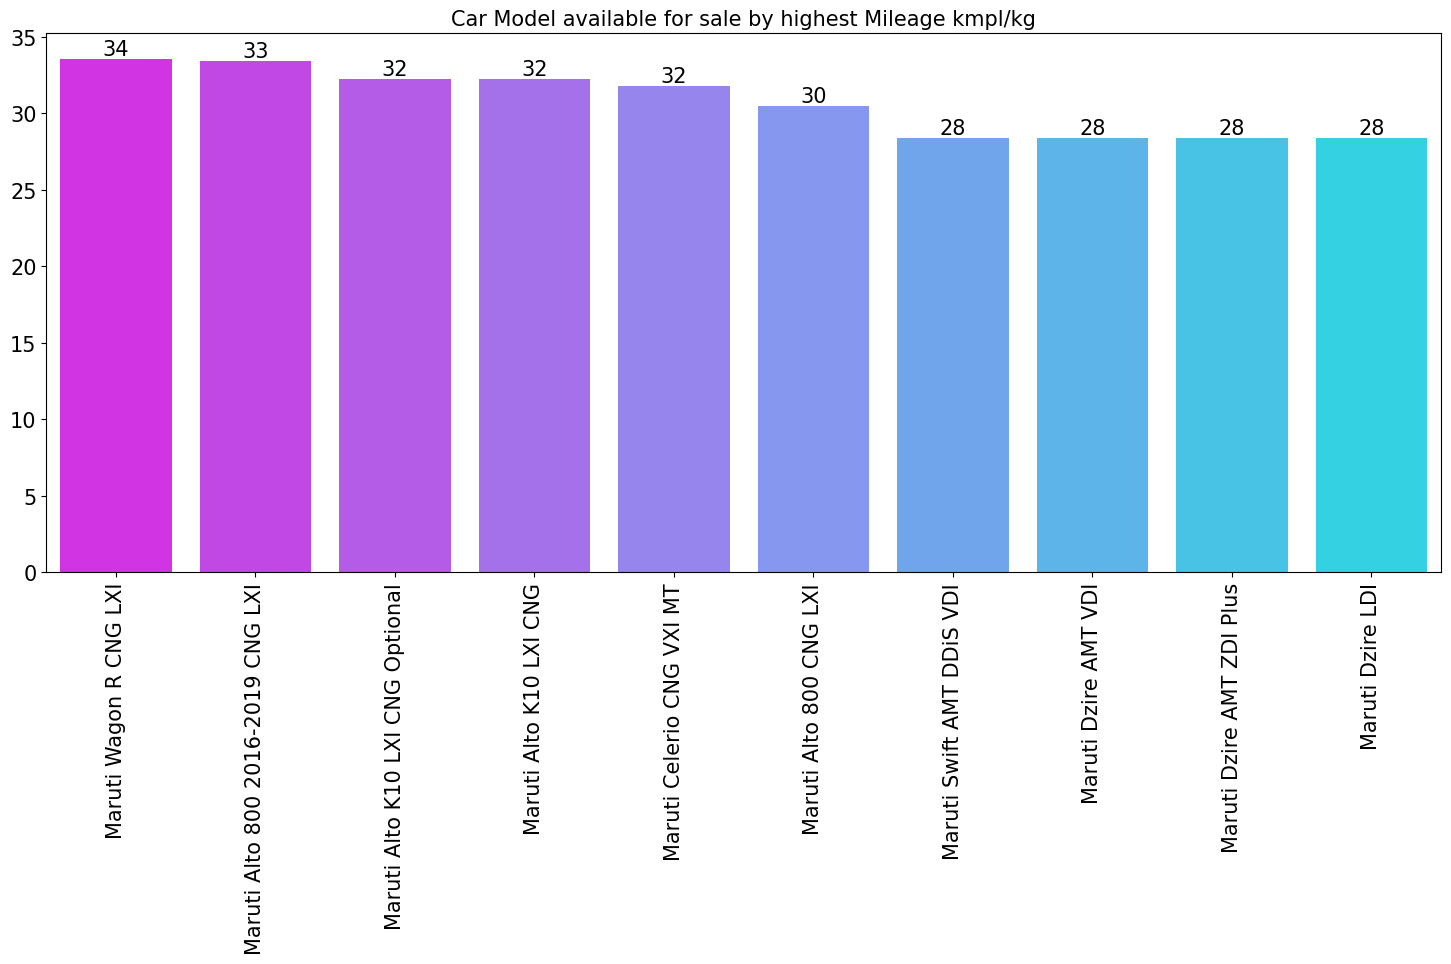

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Car Model", y = "Mileage kmpl/kg", data = cm, palette = "cool_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.4, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Car Model available for sale by highest Mileage kmpl/kg", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Car Models available for sale by highest Engine CC

In [ ]:
ce = df.groupby(["Engine CC", "Name"])["Name"].agg(["count"]).reset_index().sort_values(by = "Engine CC", ascending = False)
ce = ce.drop_duplicates("Name", keep = "first")
ce.columns = ["Engine CC", "Car Model", "Cars"]
ce = ce.head(10)
ce

Engine CC                              Car Model  Cars
1887 5998.00     Bentley Continental Flying Spur        1   
1886 5461.00     Mercedes-Benz SLK-Class 55 AMG         1   
1885 5461.00     Mercedes-Benz SL-Class SL 500          1   
1884 5461.00     Mercedes-Benz S Class 2005 2013 S 500  1   
1883 5204.00     Lamborghini Gallardo Coupe             1   
1882 5000.00     Jaguar XJ 5.0 L V8 Supercharged        1   
1881 5000.00     Jaguar F Type 5.0 V8 S                 1   
1880 4951.00     Ford Mustang V8                        1   
1879 4806.00     Porsche Panamera 2010 2013 Diesel      1   
1878 4806.00     Porsche Panamera 2010 2013 4S          1

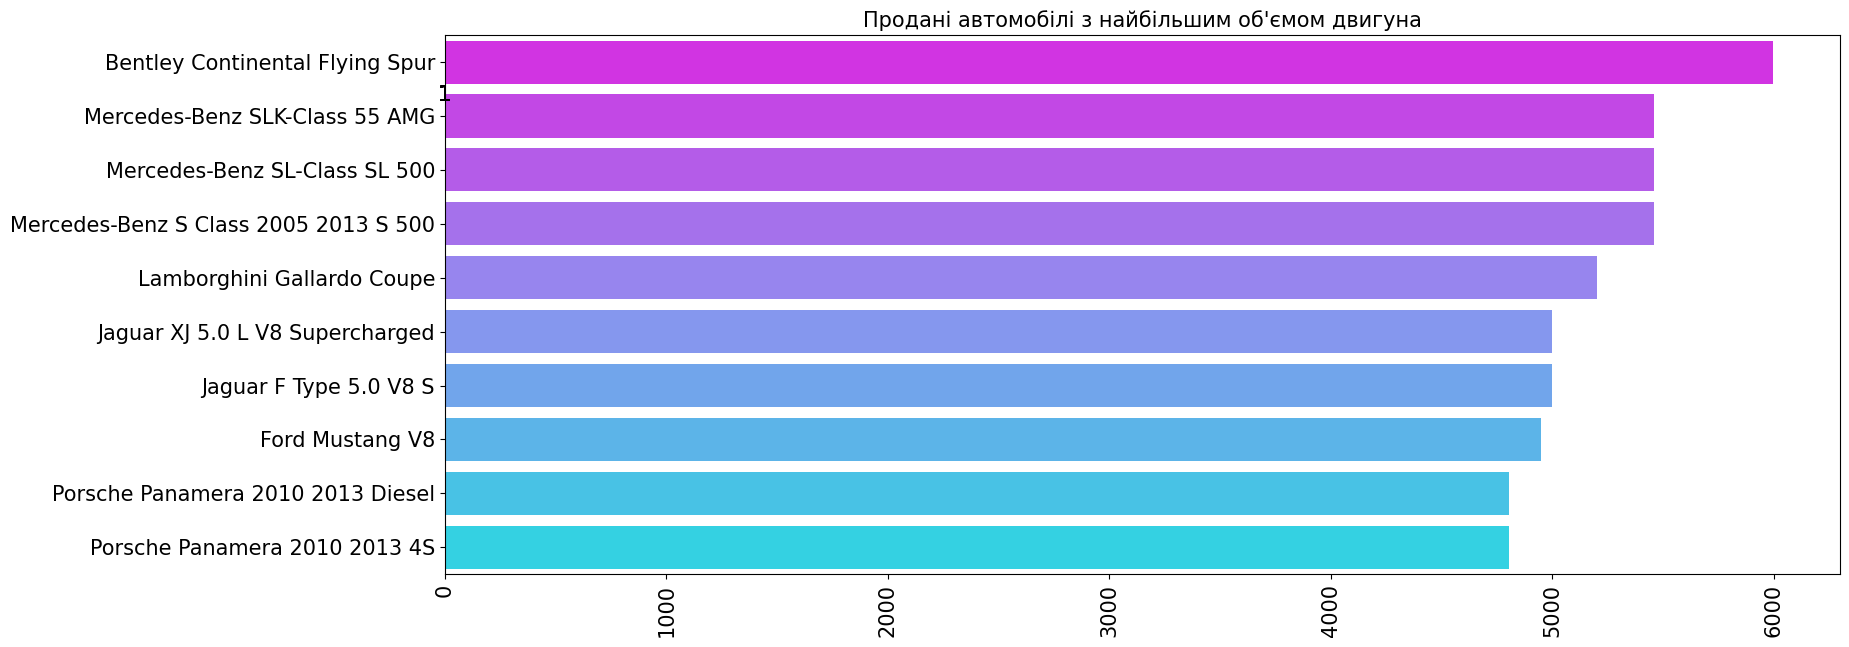

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Engine CC", y = "Car Model", data = ce, palette = "cool_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.05, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Продані автомобілі з найбільшим об'ємом двигуна", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Car Models available for sale by highest Power bph

In [ ]:
cp = df.groupby(["Power bph", "Name"])["Name"].agg(["count"]).reset_index().sort_values(by = "Power bph", ascending = False)
cp = cp.drop_duplicates("Name", keep = "first")
cp.columns = ["Power bph", "Car Model", "Cars"]
cp = cp.head(10)
cp

Power bph                        Car Model  Cars
1967 560.00      Lamborghini Gallardo Coupe       1   
1966 552.00      Bentley Continental Flying Spur  1   
1965 550.00      Porsche Cayenne Turbo S          1   
1964 503.00      Jaguar XJ 5.0 L V8 Supercharged  1   
1963 500.00      Porsche Cayenne 2009-2014 Turbo  1   
1962 488.10      Jaguar F Type 5.0 V8 S           1   
1961 450.00      BMW 6 Series 650i Coupe          1   
1960 450.00      BMW 6 Series 630i Coupe          1   
1959 444.00      Audi RS5 Coupe                   2   
1958 421.00      Mercedes-Benz SLK-Class 55 AMG   1

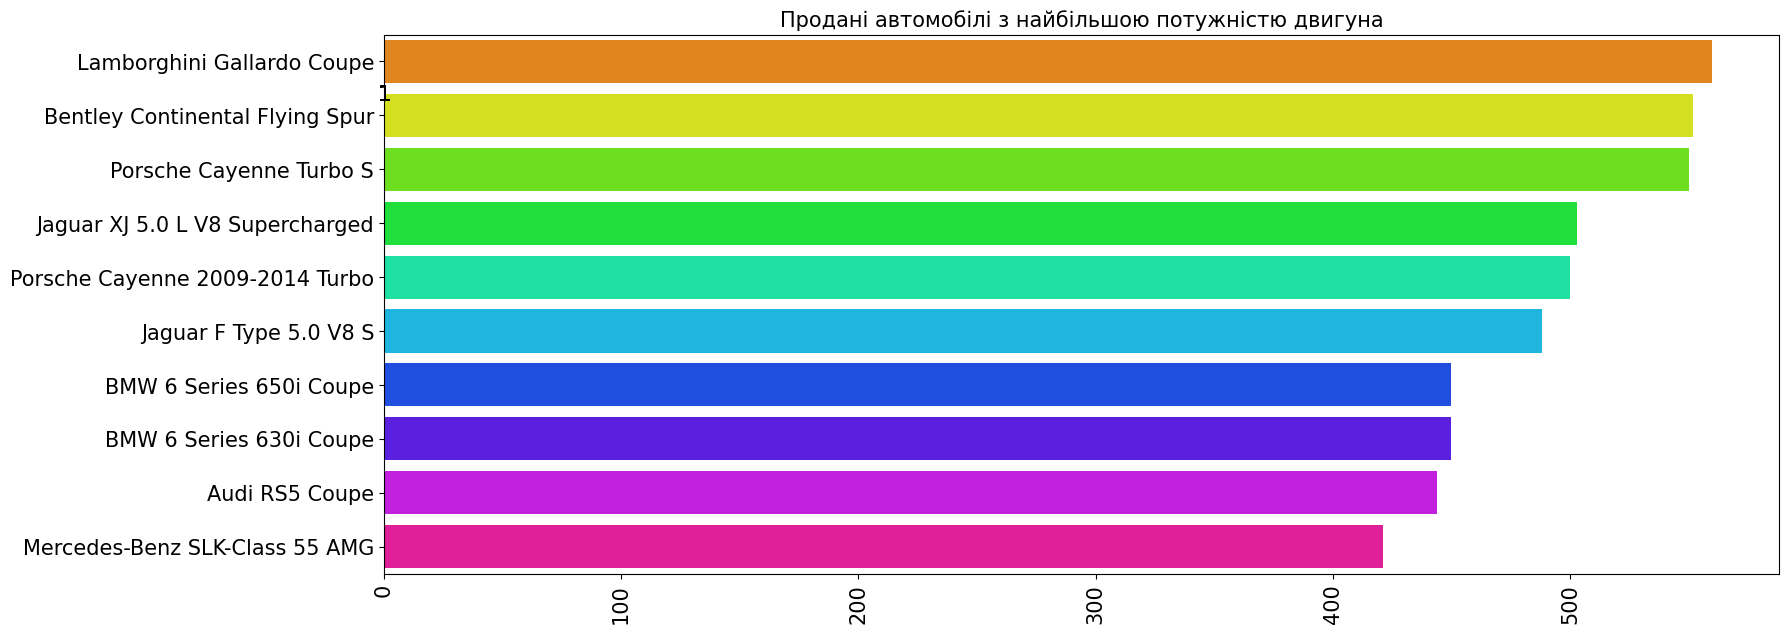

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Power bph", y = "Car Model", data = cp, palette = "hsv")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.1, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Продані автомобілі з найбільшою потужністю двигуна", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Car Models available for sale by highest Seats

In [ ]:
cs = df.groupby(["Seats", "Name"])["Name"].agg(["count"]).reset_index().sort_values(by = "Seats", ascending = False)
cs = cs.drop_duplicates("Name", keep = "first")
cs.columns = ["Seats", "Car Model", "Cars"]
cs = cs.head(10)
cs

Seats                              Car Model  Cars
1882 10.00   Toyota Qualis RS E2                    1   
1881 10.00   Toyota Qualis FS B3                    1   
1880 10.00   Toyota Qualis FS B2                    1   
1879 10.00   Tata Sumo DX                           1   
1878 10.00   Chevrolet Tavera LS B3 10 Seats BSIII  1   
1877 9.00    Mahindra Xylo D2 Maxx                  1   
1876 9.00    Mahindra Scorpio LX BS IV              1   
1875 9.00    Chevrolet Tavera LT 9 Str BS IV        1   
1840 8.00    Mahindra Scorpio VLX 4WD               1   
1835 8.00    Mahindra Scorpio VLX 2.2 mHawk BSIII   2

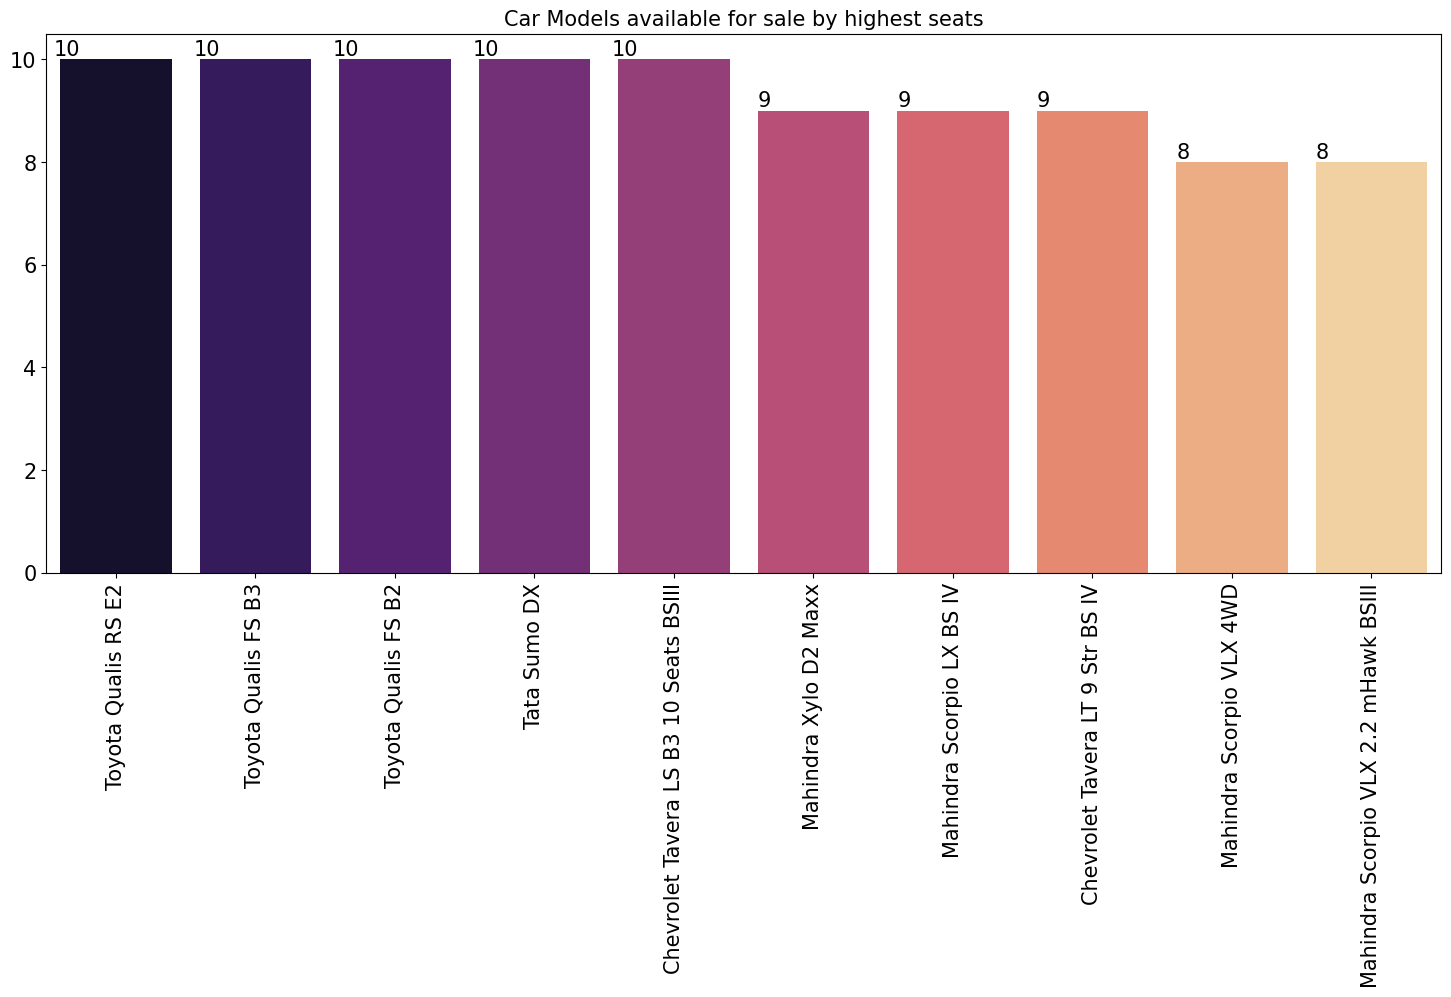

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Car Model", y = "Seats", data = cs, palette = "magma")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.05, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Car Models available for sale by highest seats", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Car Models available for sale by highest Price

In [ ]:
cp = df.groupby(["Price", "Name"])["Name"].agg(["count"]).reset_index().sort_values(by = "Price", ascending = False)
cp = cp.drop_duplicates("Name", keep = "first")
cp.columns = ["Price", "Car Model", "Cars"]
cp = cp.head(10)
cp

Price                                    Car Model  Cars
5744 160.00  Land Rover Range Rover 3.0 Diesel LWB Vogue  1   
5743 120.00  Lamborghini Gallardo Coupe                   1   
5742 100.00  Jaguar F Type 5.0 V8 S                       1   
5741 97.07   Land Rover Range Rover Sport SE              1   
5740 93.67   BMW 7 Series 740Li                           1   
5738 90.00   Mercedes-Benz SLK-Class 55 AMG               1   
5737 85.00   BMW X6 xDrive 40d M Sport                    1   
5736 83.96   Mercedes-Benz SLC 43 AMG                     1   
5734 79.00   Jaguar XJ 3.0L Portfolio                     1   
5735 79.00   Mercedes-Benz GLS 350d Grand Edition         1

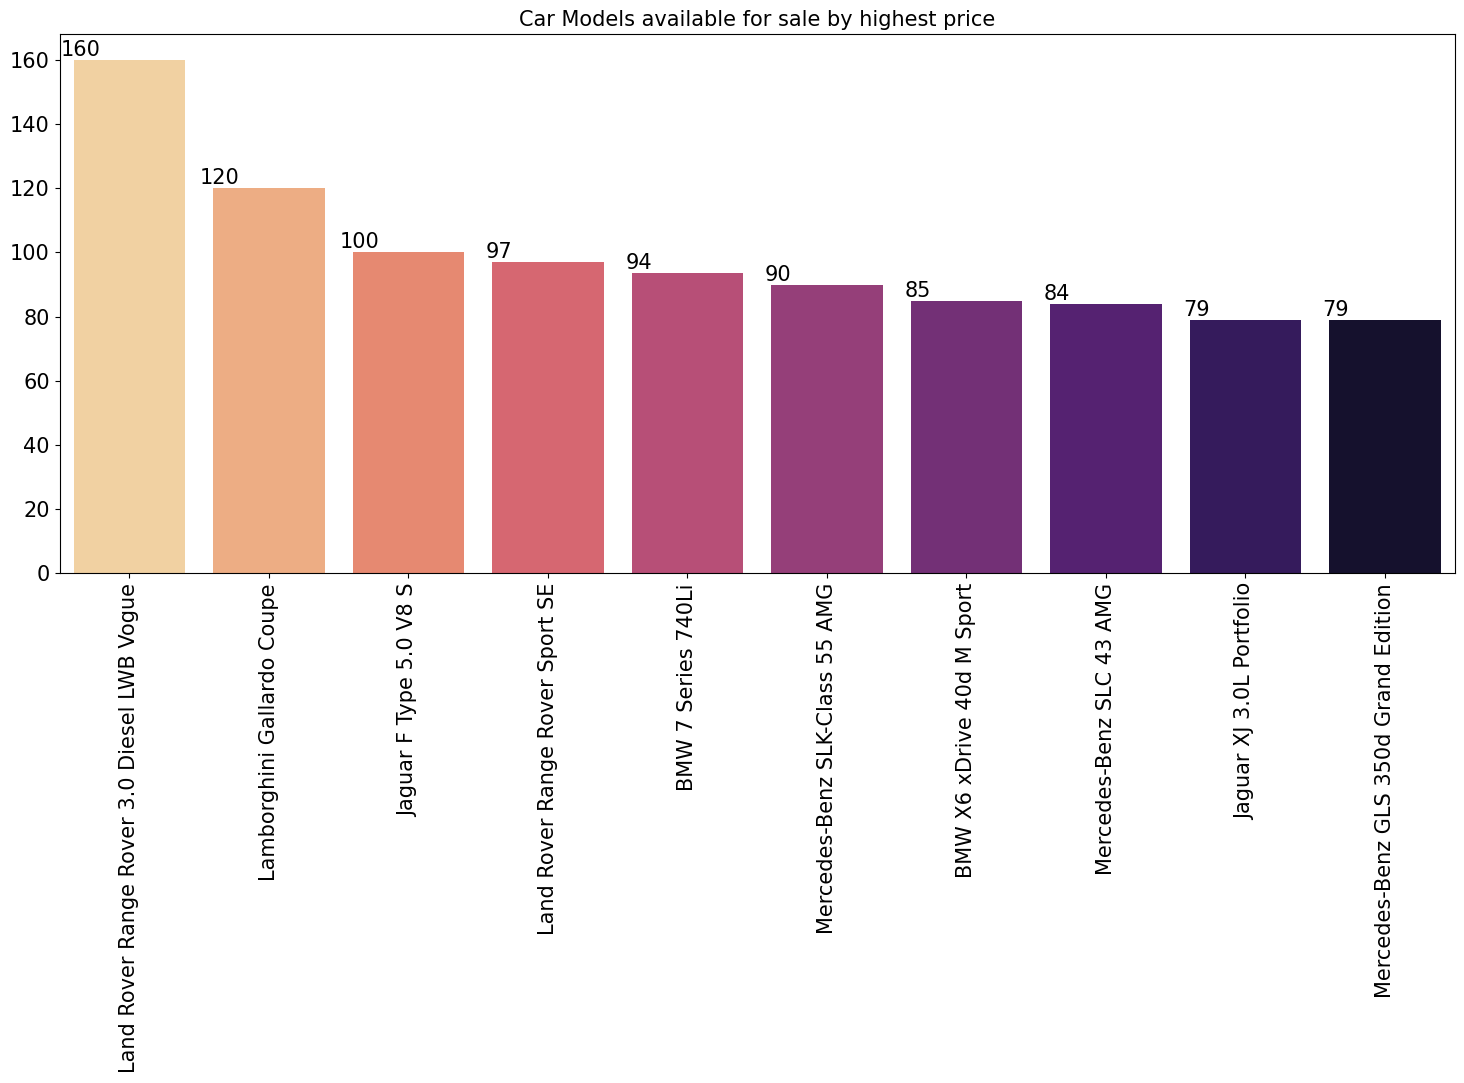

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Car Model", y = "Price", data = cp, palette = "magma_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.05, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Car Models available for sale by highest price", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Highest Number of Cars available for sale in cities by years

In [ ]:
ly = df.groupby(["Year", "Location"])["Location"].agg(["count"]).sort_values(by = "count", ascending = False).reset_index()
ly = ly.drop_duplicates("Location", keep = "first")
ly.columns = ["Year", "Location", "Cars"]
ly

Year    Location  Cars
0   2017  Coimbatore  126 
1   2014  Mumbai      115 
2   2017  Kochi       114 
8   2014  Delhi       99  
9   2014  Kolkata     90  
10  2012  Hyderabad   89  
21  2012  Pune        78  
26  2014  Bangalore   72  
30  2016  Chennai     66  
45  2015  Jaipur      54  
67  2014  Ahmedabad   37

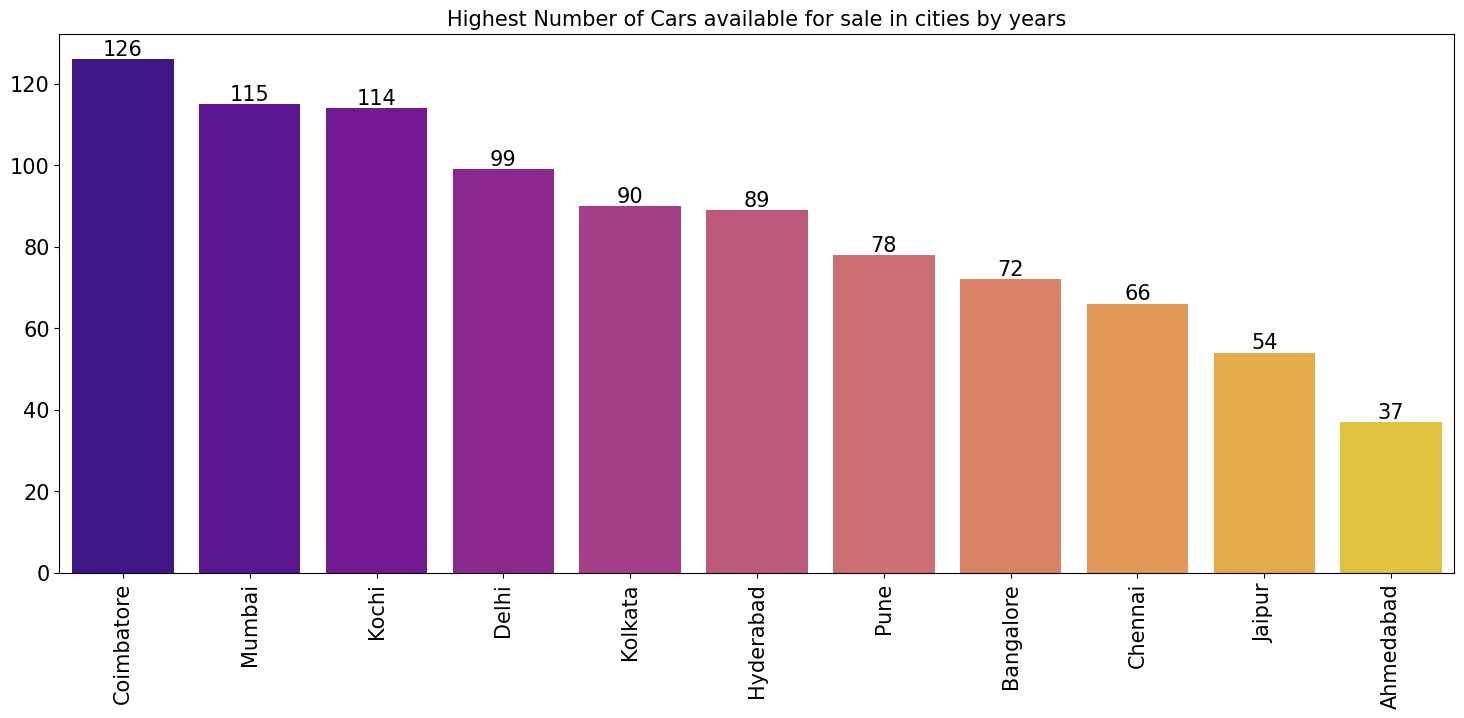

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Location", y = "Cars", data = ly, palette = "plasma")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.4, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Highest Number of Cars available for sale in cities by years", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Lowest Kilometers Drive by Cars for sale in cities

In [ ]:
cc = df.groupby("Location")["Kilometers_Driven"].agg(["sum", "count", "min", "mean", "max"]).reset_index().sort_values(by = "sum")
cc.columns = ["City", "Total Drive km", "Cars", "Min Drive km", "Avg Drive km", "Max Drive km"]
cc

City  Total Drive km  Cars  Min Drive km  Avg Drive km  Max Drive km
0   Ahmedabad   12371486        224   1000         55229.85       173000      
1   Bangalore   20925339        358   1331         58450.67       445000      
8   Kolkata     23311825        535   1000         43573.50       775000      
7   Kochi       29194732        651   3102         44845.98       169006      
6   Jaipur      29588897        413   1000         71643.82       300000      
3   Coimbatore  29906148        636   2526         47022.25       186679      
4   Delhi       31753404        554   1000         57316.61       231673      
9   Mumbai      35702626        790   171          45193.20       262000      
10  Pune        43885210        622   1000         70555.00       282000      
2   Chennai     44447151        494   3000         89973.99       6500000     
5   Hyderabad   52459493        742   1000         70700.13       299322

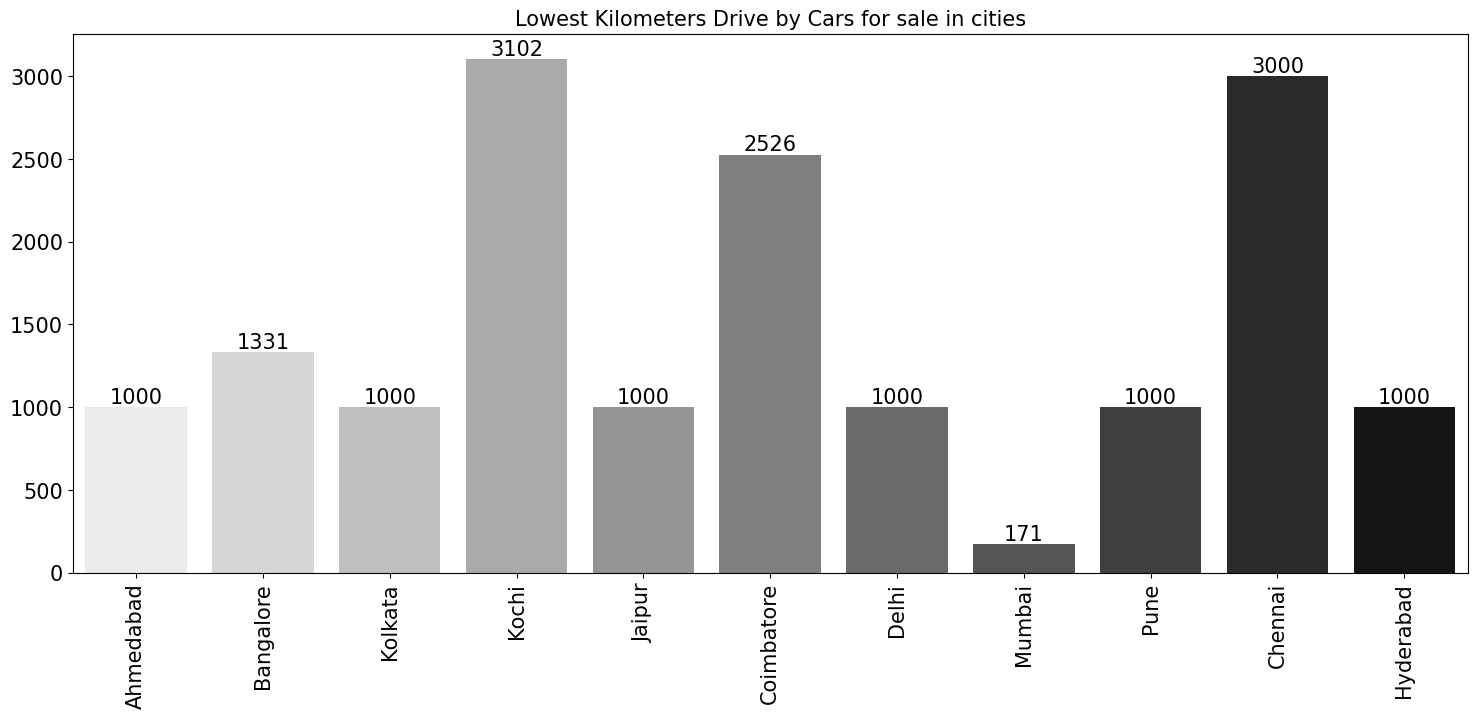

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "City", y = "Min Drive km", data = cc, palette = "gist_yarg")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.4, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Lowest Kilometers Drive by Cars for sale in cities", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Fuel Type used by cars for sale in locations

In [ ]:
fc = df.groupby(["Location", "Fuel_Type"])["Fuel_Type"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False)
fc = fc.drop_duplicates("Location", keep = "first")
fc.columns = ["City", "Fuel", "Cars"]
fc

City    Fuel  Cars
15  Hyderabad   Diesel  506 
30  Mumbai      Petrol  458 
9   Coimbatore  Diesel  356 
23  Kochi       Petrol  339 
34  Pune        Petrol  320 
12  Delhi       Diesel  306 
6   Chennai     Diesel  289 
25  Kolkata     Petrol  279 
18  Jaipur      Diesel  230 
3   Bangalore   Diesel  219 
1   Ahmedabad   Diesel  138

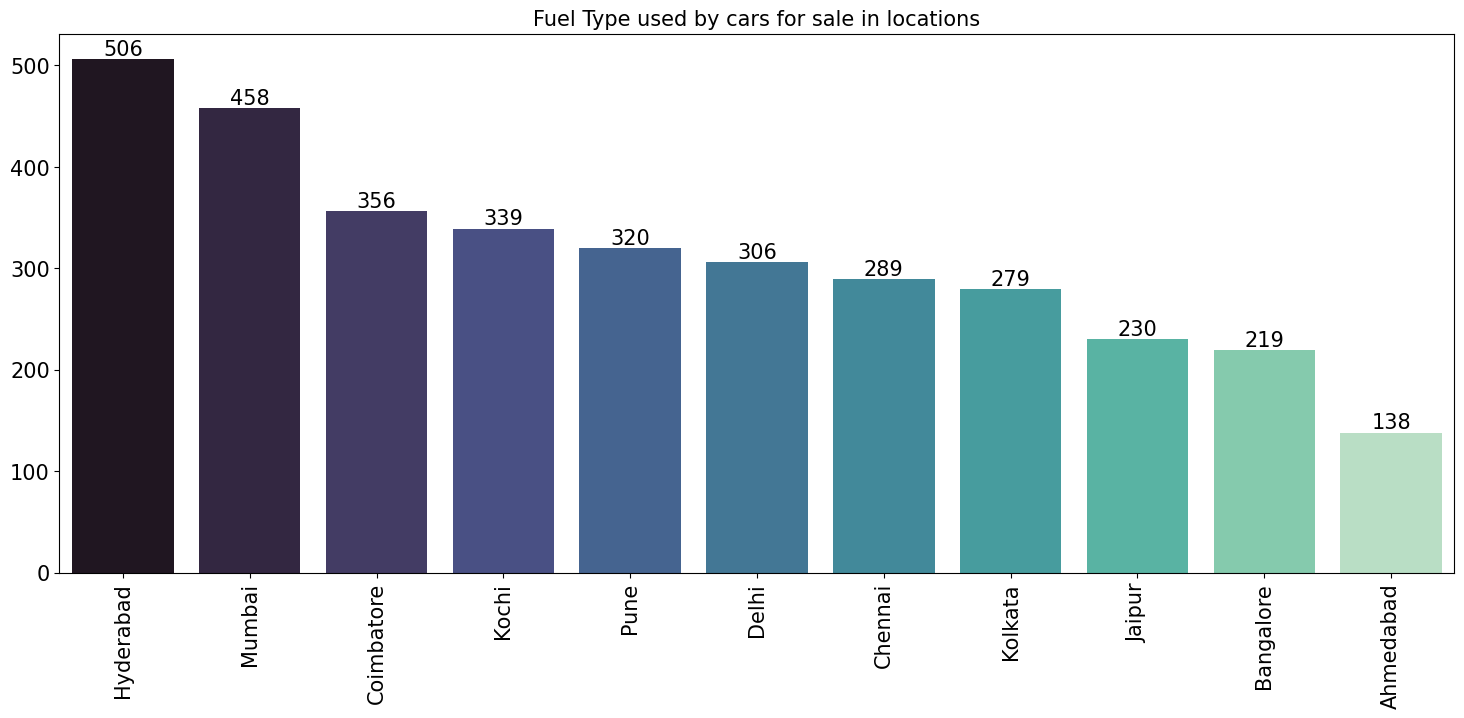

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "City", y = "Cars", data = fc, palette = "mako")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.4, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Fuel Type used by cars for sale in locations", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Owners of Cars for sale by Location

In [ ]:
cl = df.groupby(["Location", "Owner_Type"])["Owner_Type"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False)
cl = cl.drop_duplicates("Owner_Type", keep = "first")
cl.columns = ["City", "Owner Type", "Cars"]
cl

City      Owner Type  Cars
17  Hyderabad  First           658 
34  Pune       Second          170 
9   Chennai    Third           36  
29  Mumbai     Fourth & Above  2

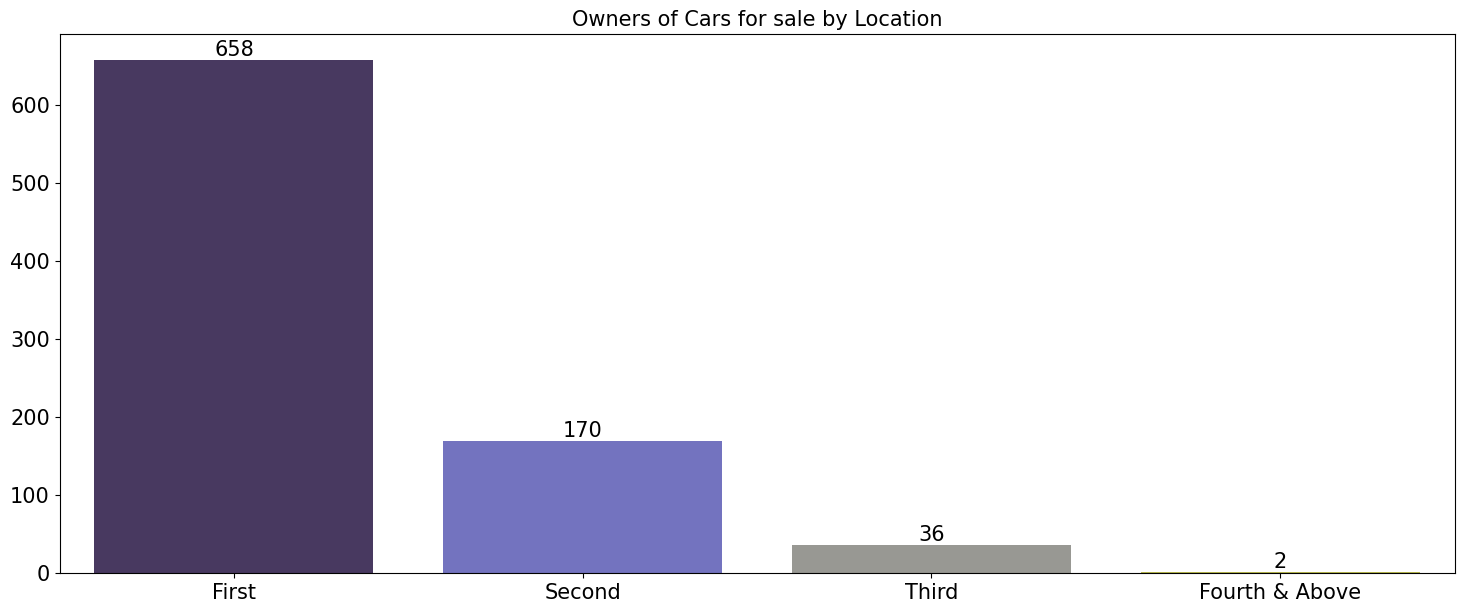

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Owner Type", y = "Cars", data = cl, palette = "gist_stern")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.4, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Owners of Cars for sale by Location", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Cars for sale in Location by Transmission

In [ ]:
lt = df.groupby(["Location", "Transmission"])["Transmission"].agg(["count"]).reset_index()
lt.columns = ["City", "Transmission", "Cars"]
lt.sort_values(by = "Cars", ascending = False)

City Transmission  Cars
11  Hyderabad   Manual       546 
19  Mumbai      Manual       487 
21  Pune        Manual       478 
17  Kolkata     Manual       455 
15  Kochi       Manual       446 
7   Coimbatore  Manual       389 
9   Delhi       Manual       383 
5   Chennai     Manual       374 
13  Jaipur      Manual       361 
18  Mumbai      Automatic    303 
6   Coimbatore  Automatic    247 
3   Bangalore   Manual       214 
14  Kochi       Automatic    205 
10  Hyderabad   Automatic    196 
8   Delhi       Automatic    171 
1   Ahmedabad   Manual       166 
20  Pune        Automatic    144 
2   Bangalore   Automatic    144 
4   Chennai     Automatic    120 
16  Kolkata     Automatic    80  
0   Ahmedabad   Automatic    58  
12  Jaipur      Automatic    52

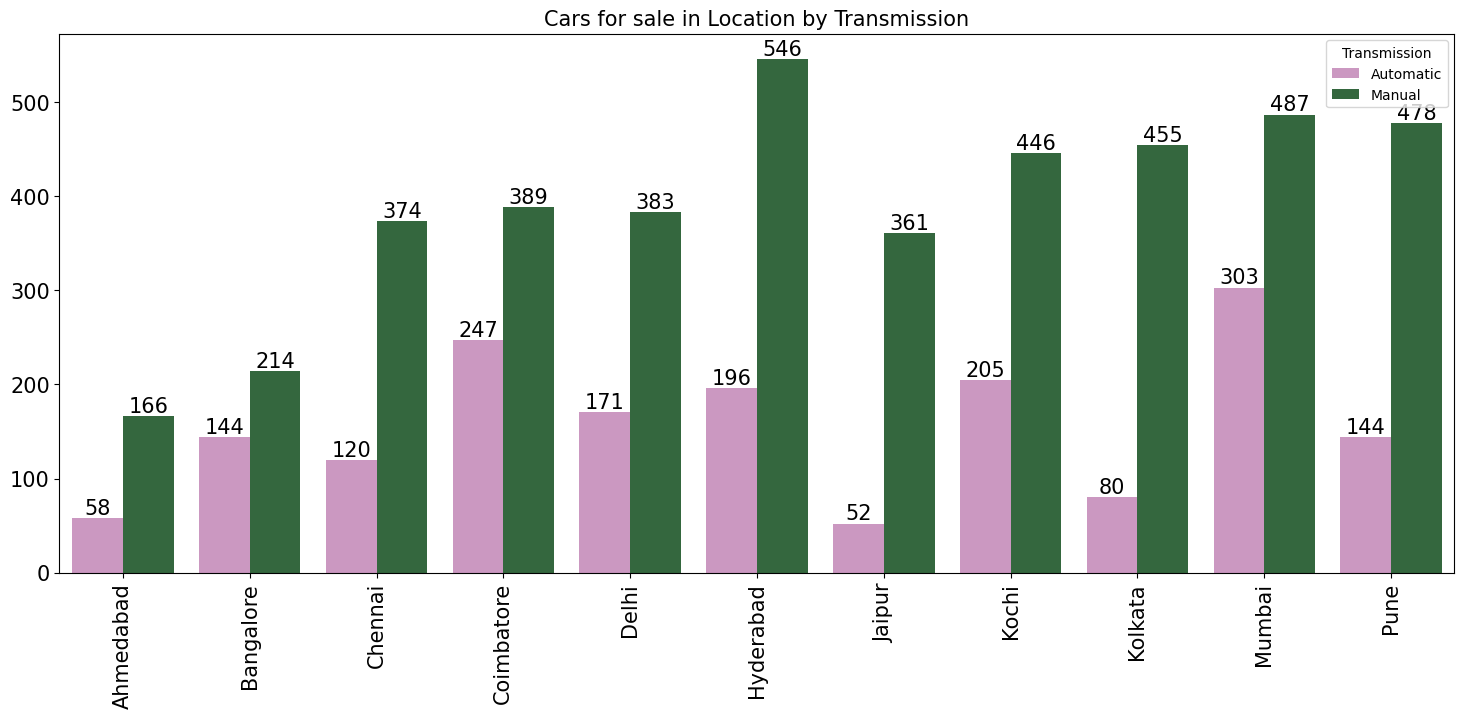

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "City", y = "Cars", hue = "Transmission", data = lt, palette = "cubehelix_r")
for p in graph.patches:
  graph.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x()+0.2, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Cars for sale in Location by Transmission", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Cars for sale (Mileage kmpl/kg) by Location

In [ ]:
ml = df.groupby(["Location"])["Mileage kmpl/kg"].agg(["sum", "mean", "max"]).reset_index().sort_values(by = "sum")
ml.columns = ["City", "Total Mileage kmpl/kg", "Avg Mileage kmpl/kg", "Max Mileage kmpl/kg"]
ml

City  Total Mileage kmpl/kg  Avg Mileage kmpl/kg  \
0   Ahmedabad  4216.60                18.82                  
1   Bangalore  5987.46                16.72                  
6   Jaipur     7845.58                19.00                  
2   Chennai    8882.20                18.02                  
4   Delhi      9918.94                17.90                  
8   Kolkata    10242.37               19.14                  
10  Pune       11156.89               17.94                  
3   Coimbatore 11324.67               17.81                  
7   Kochi      12135.61               18.64                  
9   Mumbai     13693.66               17.36                  
5   Hyderabad  13714.08               18.48                  

    Max Mileage kmpl/kg  
0  28.40                 
1  28.09                 
6  28.40                 
2  28.40                 
4  33.54                 
8  28.40                 
10 33.54                 
3  28.40                 
7  33.44                 
9  33.54                 
5  28.40

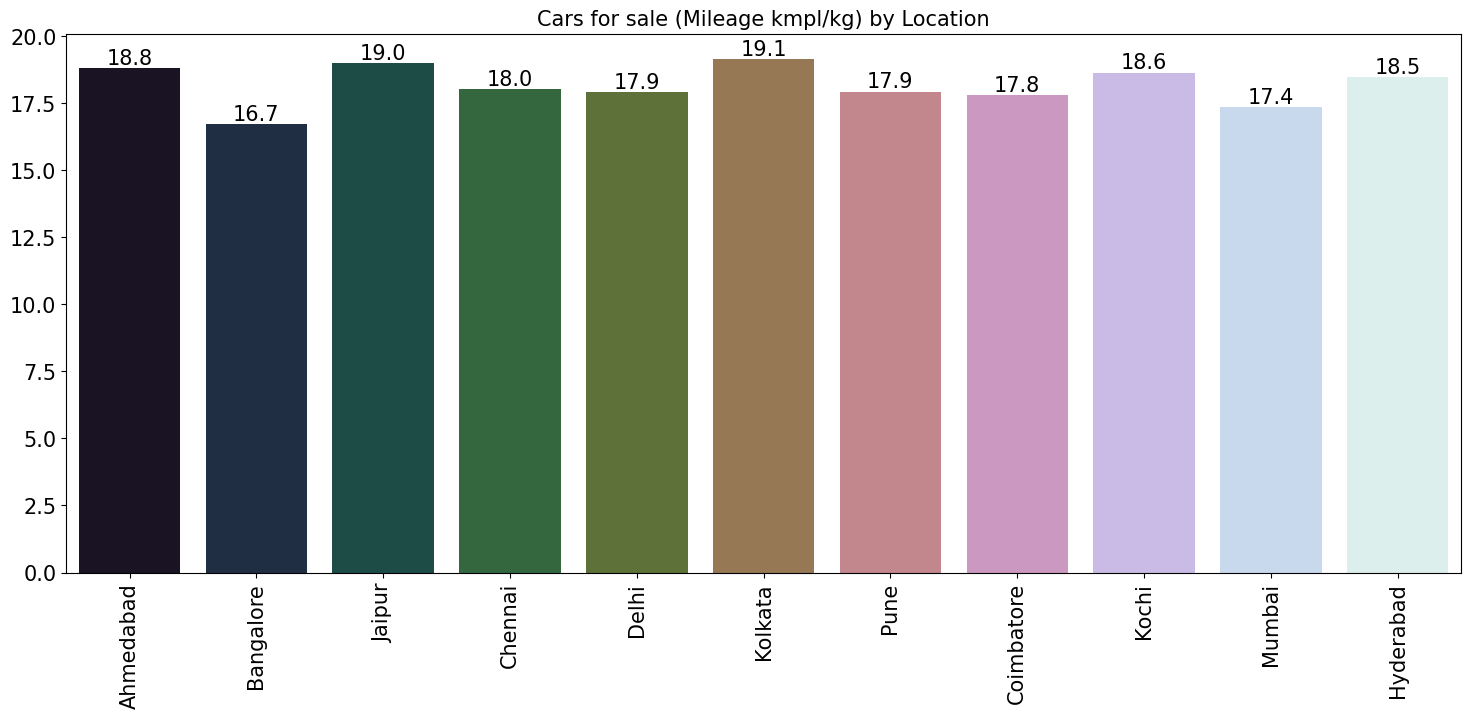

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "City", y = "Avg Mileage kmpl/kg", data = ml, palette = "cubehelix")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.4, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Cars for sale (Mileage kmpl/kg) by Location", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Cars for sale (Engine CC) by Location

In [ ]:
el = df.groupby("Location")["Engine CC"].agg(["min", "max"]).reset_index().sort_values(by = "max", ascending = False)
el.columns = ["City", "Min Engine CC", "Max Engine CC"]
el

City  Min Engine CC  Max Engine CC
5   Hyderabad  624.00         5998.00       
1   Bangalore  624.00         5461.00       
8   Kolkata    793.00         5461.00       
4   Delhi      796.00         5204.00       
3   Coimbatore 624.00         5000.00       
7   Kochi      624.00         4951.00       
9   Mumbai     796.00         4806.00       
10  Pune       624.00         3498.00       
2   Chennai    72.00          3200.00       
6   Jaipur     624.00         3198.00       
0   Ahmedabad  624.00         2993.00

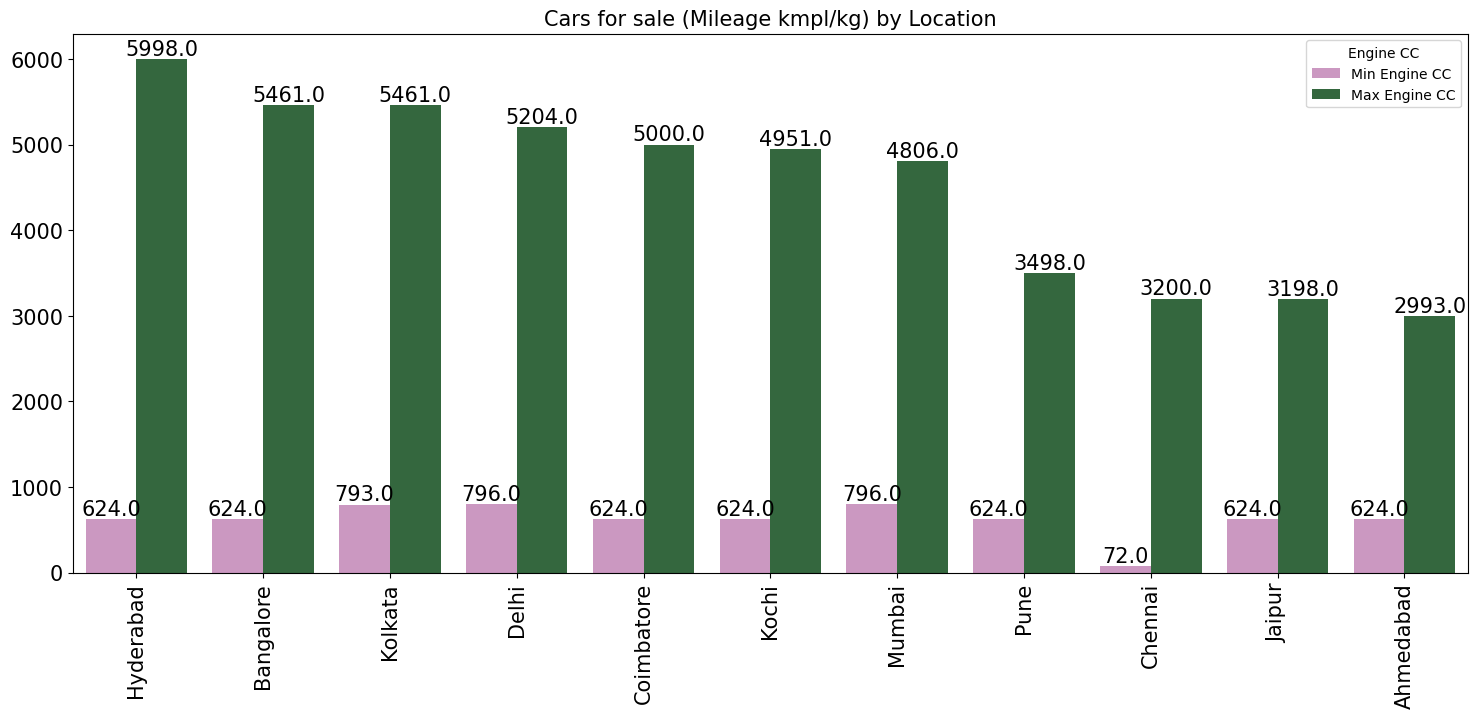

In [ ]:
el = el.melt("City", var_name = "Engine CC", value_name = "Size")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "City", y = "Size", hue = "Engine CC", data = el, palette = "cubehelix_r")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.2, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Cars for sale (Mileage kmpl/kg) by Location", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Cars for sale (Power bph) by Location

In [ ]:
pl = df.groupby("Location")["Power bph"].agg(["min", "max"]).reset_index().sort_values(by = "max", ascending = False)
pl.columns = ["Location", "Min Power bph", "Max Power bph"]
pl

Location  Min Power bph  Max Power bph
4   Delhi      38.40          560.00        
5   Hyderabad  34.20          552.00        
9   Mumbai     34.20          550.00        
3   Coimbatore 34.20          503.00        
7   Kochi      34.20          450.00        
1   Bangalore  37.48          421.00        
8   Kolkata    34.20          387.30        
10  Pune       35.00          321.00        
0   Ahmedabad  37.50          308.43        
2   Chennai    35.50          308.43        
6   Jaipur     34.20          265.00

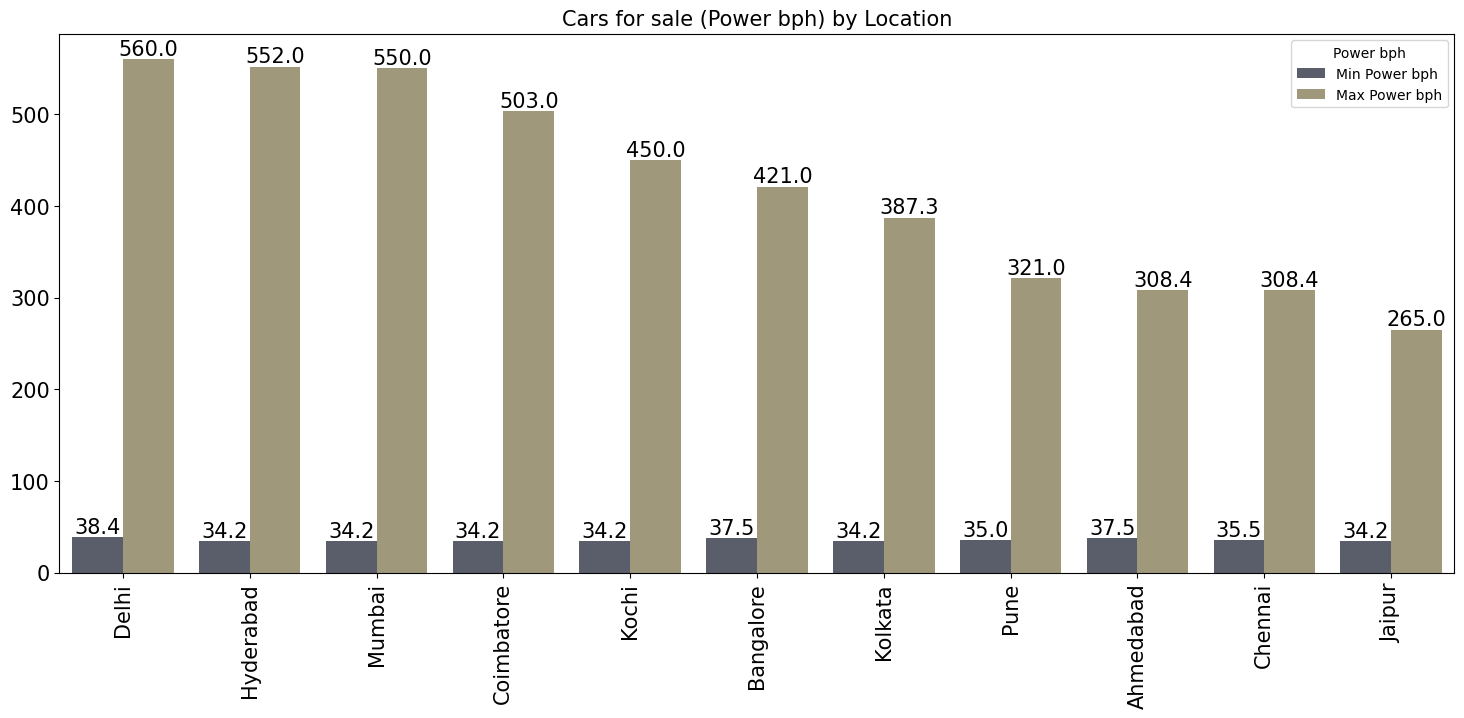

In [ ]:
pl = pl.melt("Location", var_name = "Power bph", value_name = "Size")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Location", y = "Size", hue = "Power bph", data = pl, palette = "cividis")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.2, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Cars for sale (Power bph) by Location", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Cars for sale Seat by Location

In [ ]:
sl = df.groupby("Location")["Seats"].agg(["min", "max"]).reset_index().sort_values(by = "max", ascending = False)
sl.columns = ["City", "Min Seats", "Max Seats"]
sl

City  Min Seats  Max Seats
1   Bangalore  2.00       10.00     
5   Hyderabad  0.00       10.00     
9   Mumbai     2.00       10.00     
10  Pune       2.00       10.00     
2   Chennai    4.00       9.00      
8   Kolkata    2.00       9.00      
0   Ahmedabad  4.00       8.00      
3   Coimbatore 2.00       8.00      
4   Delhi      2.00       8.00      
6   Jaipur     4.00       8.00      
7   Kochi      2.00       8.00

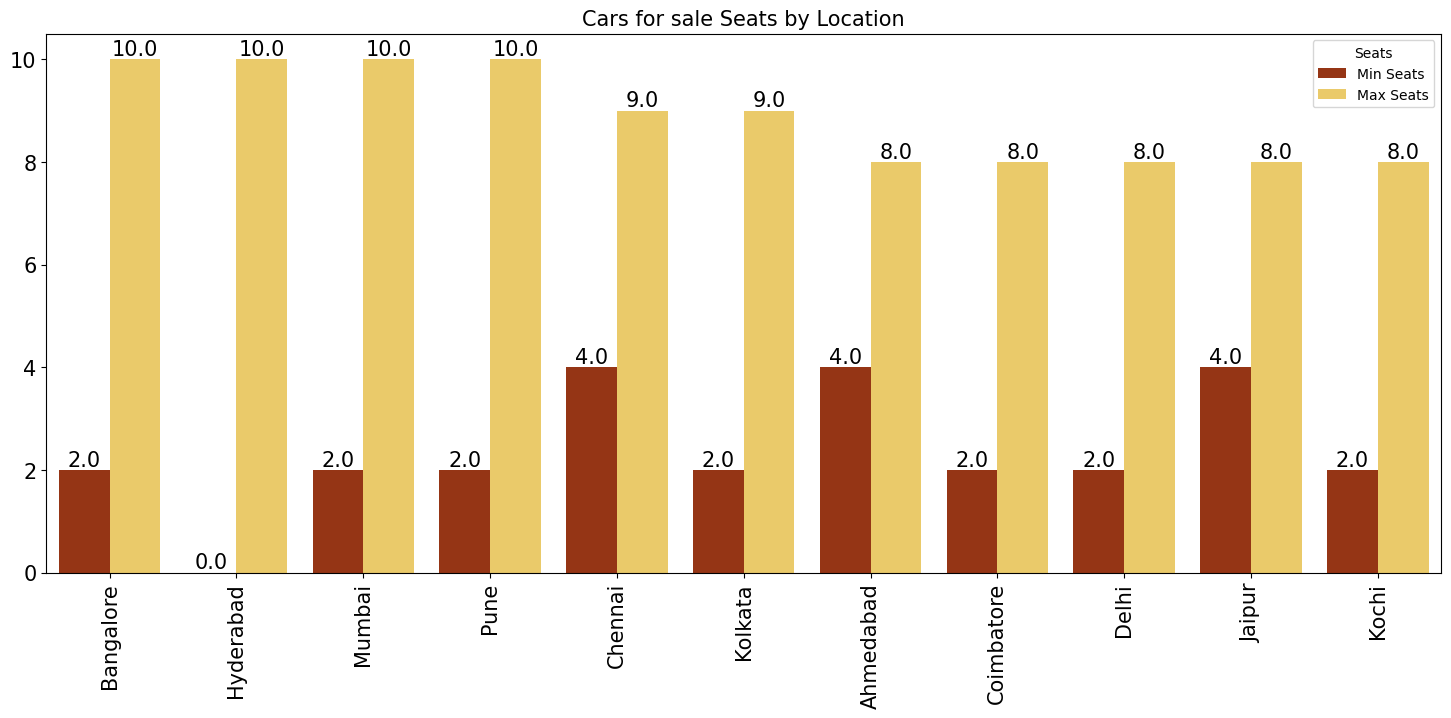

In [ ]:
sl = sl.melt("City", var_name = "Seats", value_name = "Count")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "City", y = "Count", hue = "Seats", data = sl, palette = "afmhot")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.2, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Cars for sale Seats by Location", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Cars for sale highest price by Location

In [ ]:
pl = df.groupby("Location")["Price"].agg(["sum", "min", "mean", "max"]).reset_index().sort_values(by = "max", ascending = False)
pl.columns = ["City", "Total Worth", "Min Price", "Mean Price", "Max Price"]
pl

City  Total Worth  Min Price  Mean Price  Max Price
5   Hyderabad  7254.20      0.60       9.78        160.00    
4   Delhi      5378.08      0.75       9.71        120.00    
7   Kochi      7277.65      1.26       11.18       97.07     
3   Coimbatore 9589.75      1.68       15.08       93.67     
1   Bangalore  4771.65      1.35       13.33       93.00     
0   Ahmedabad  1894.44      0.75       8.46        85.00     
8   Kolkata    3028.75      0.65       5.66        75.00     
9   Mumbai     7449.17      0.55       9.43        75.00     
2   Chennai    3830.29      0.65       7.75        70.00     
10  Pune       4183.73      0.44       6.73        68.00     
6   Jaipur     2399.21      0.45       5.81        42.50

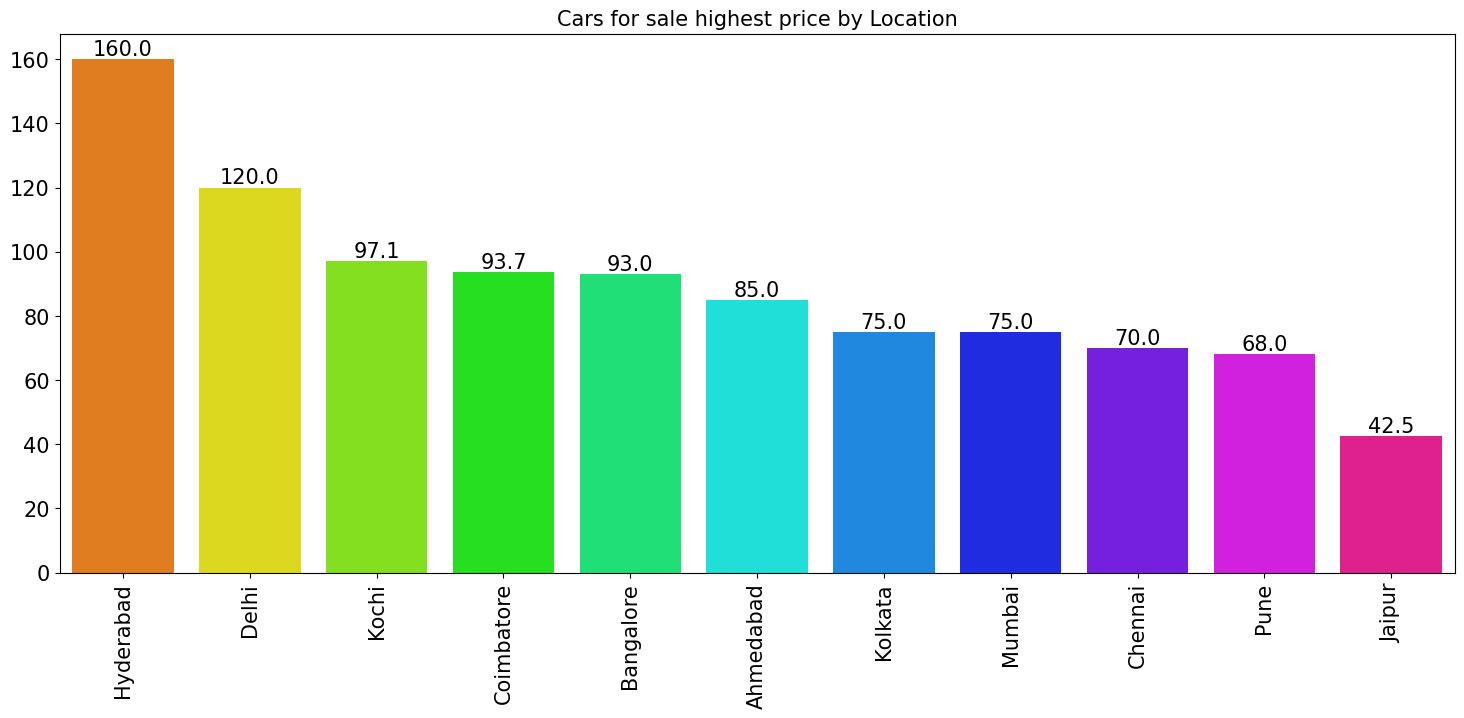

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "City", y = "Max Price", data = pl, palette = "hsv")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.4, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Cars for sale highest price by Location", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Kilometers drive by cars for sale related to Fuel Type

In [ ]:
kf = df.groupby("Fuel_Type")["Kilometers_Driven"].agg(["sum", "min", "mean", "max"]).reset_index()
kf.columns = ["Fuel Type", "Total Drive(km)", "Min Drive(km)", "Avg Drive(km)", "Max Drive(km)"]
kf

Fuel Type  Total Drive(km)  Min Drive(km)  Avg Drive(km)  Max Drive(km)
0  CNG       3104979          10600         55446.05        100000       
1  Diesel    216880619        1000          67669.46        6500000      
2  Electric  94000            44000         47000.00        50000        
3  LPG       599662           17000         59966.20        75000        
4  Petrol    132867051        171           48385.67        620000

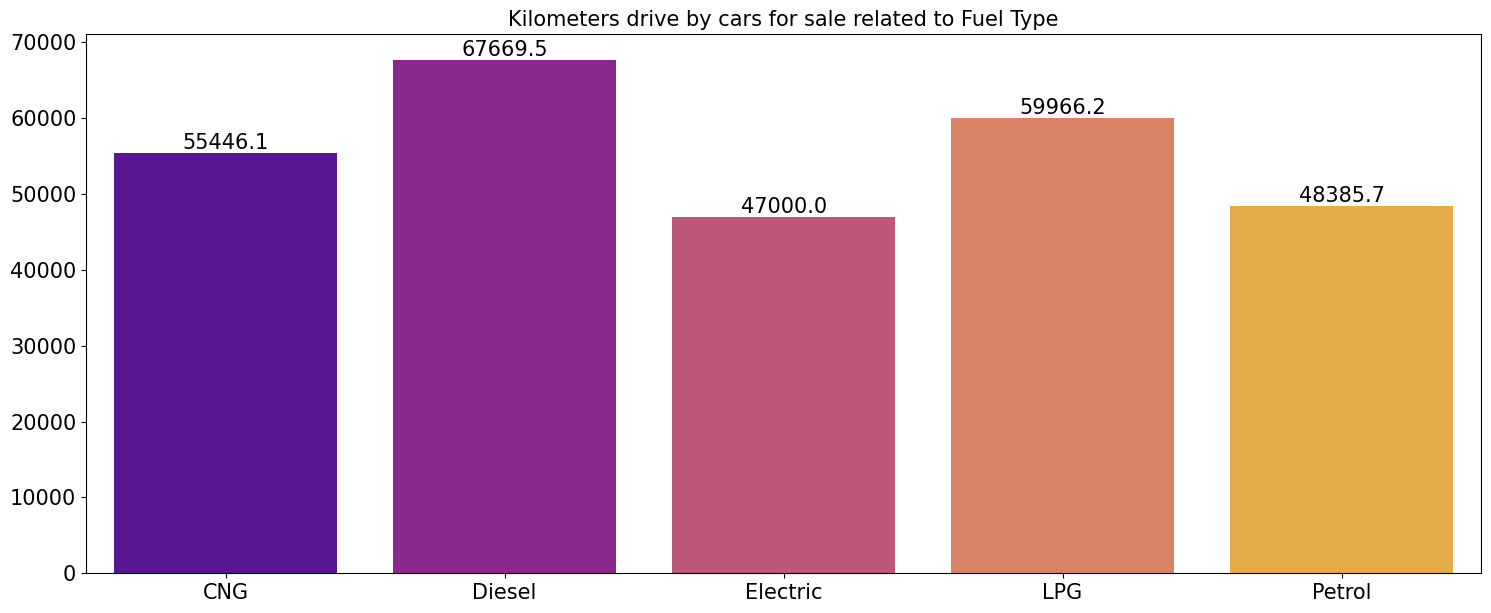

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Fuel Type", y = "Avg Drive(km)", data = kf, palette = "plasma")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.4, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Kilometers drive by cars for sale related to Fuel Type", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Fuel Type of used cars for sale by Year

In [ ]:
fy = df.groupby(["Fuel_Type", "Year"])["Fuel_Type"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False)
fy = fy.drop_duplicates("Fuel_Type", keep = "first")
fy.columns = ["Year", "Fuel", "Cars"]
fy

Year  Fuel  Cars
27  Diesel    2014  490 
59  Petrol    2016  331 
6   CNG       2014  11  
39  LPG       2012  4   
33  Electric  2011  1

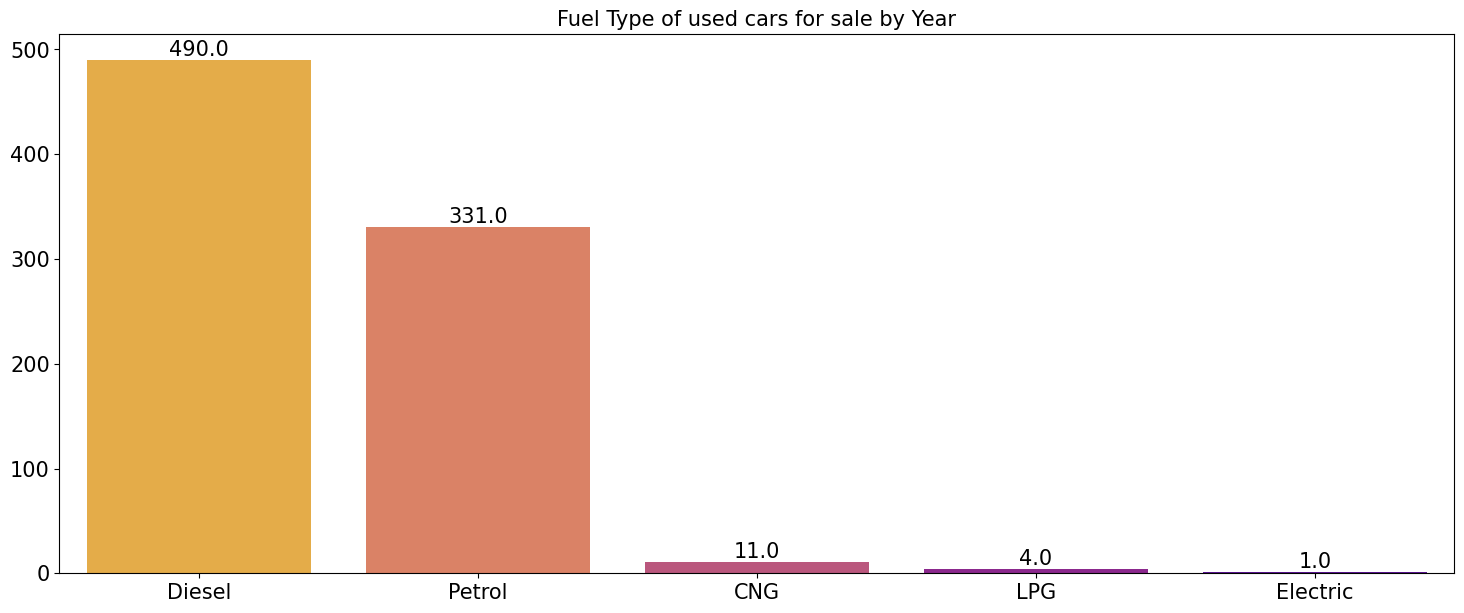

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Year", y = "Cars", data = fy, palette = "plasma_r")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.4, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Fuel Type of used cars for sale by Year", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Fuel Type of cars for sale by Transmission Type

In [ ]:
ft = df.groupby(["Fuel_Type", "Transmission"])["Transmission"].agg(["count"]).reset_index()
ft.columns = ["Fuel", "Transmission", "Cars"]
ft

Fuel Transmission  Cars
0  CNG       Manual       56  
1  Diesel    Automatic    1108
2  Diesel    Manual       2097
3  Electric  Automatic    2   
4  LPG       Manual       10  
5  Petrol    Automatic    610 
6  Petrol    Manual       2136

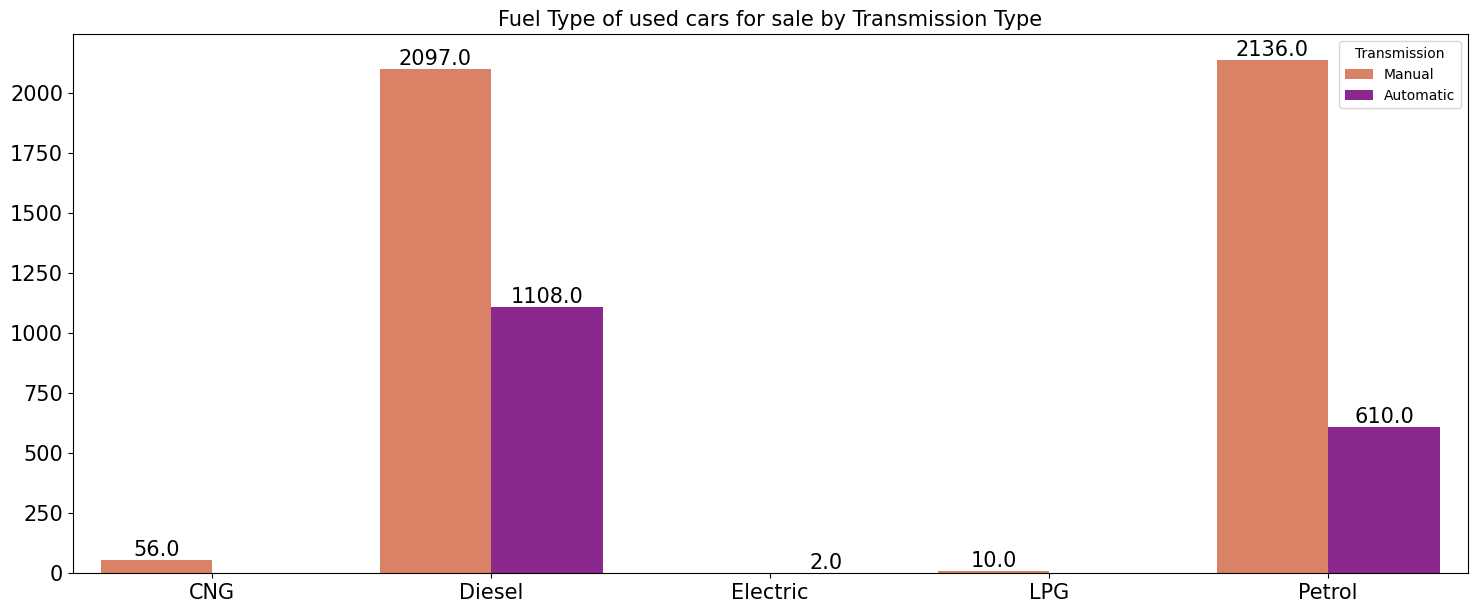

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Fuel", y = "Cars", hue = "Transmission", data = ft, palette = "plasma_r")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.2, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Fuel Type of used cars for sale by Transmission Type", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Fuel Type of cars for sale by Owner Type

In [ ]:
fo = df.groupby(["Fuel_Type", "Owner_Type"])["Owner_Type"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False)
fo

Fuel_Type      Owner_Type  count
3   Diesel    First           2670 
10  Petrol    First           2204 
5   Diesel    Second          487  
12  Petrol    Second          469  
13  Petrol    Third           69   
0   CNG       First           45   
6   Diesel    Third           43   
1   CNG       Second          10   
8   LPG       First           8    
4   Diesel    Fourth & Above  5    
11  Petrol    Fourth & Above  4    
7   Electric  First           2    
9   LPG       Second          2    
2   CNG       Third           1

Fuel Type of cars for sale by Mileage kmpl/kg

In [ ]:
fm = df.groupby("Fuel_Type")["Mileage kmpl/kg"].agg(["min", "mean", "max"]).reset_index()
fm.columns = ["Fuel", "Min Mileage kmpl/kg", "Avg Mileage kmpl/kg", "Max Mileage kmpl/kg"]
fm = fm.dropna()
fm

Fuel  Min Mileage kmpl/kg  Avg Mileage kmpl/kg  Max Mileage kmpl/kg
0  CNG    13.20                25.42                33.54               
1  Diesel 0.00                 18.62                28.40               
3  LPG    13.45                19.38                26.20               
4  Petrol 0.00                 17.42                26.00

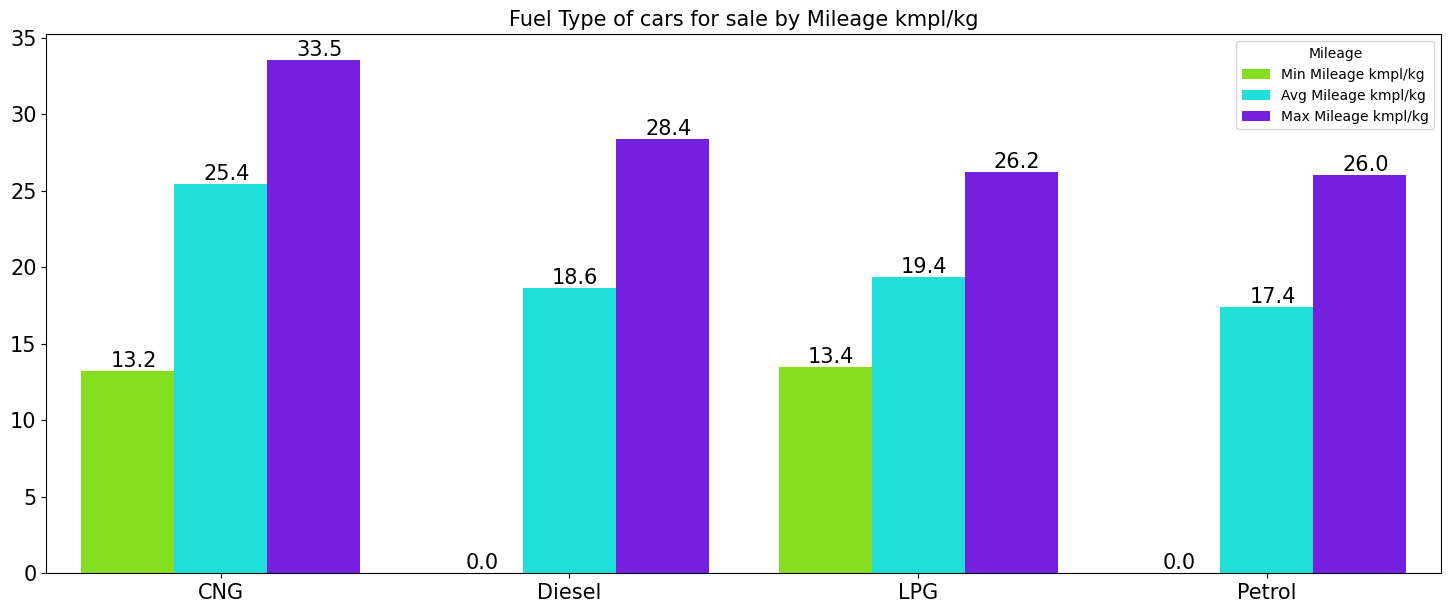

In [ ]:
fm = fm.melt("Fuel", var_name = "Mileage", value_name = "kmpl/kg")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Fuel", y = "kmpl/kg", hue = "Mileage", data = fm, palette = "hsv")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.15, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Fuel Type of cars for sale by Mileage kmpl/kg", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Fuel Type of cars for sale by Engine CC

In [ ]:
fe = df.groupby("Fuel_Type")["Engine CC"].agg(["min", "mean", "max"]).reset_index()
fe.columns = ["Fuel", "Min Engine CC", "Avg Engine CC", "Max Engine CC"]
fe

Fuel  Min Engine CC  Avg Engine CC  Max Engine CC
0  CNG      796.00         1091.05        1798.00       
1  Diesel   793.00         1860.99        4806.00       
2  Electric 72.00          935.00         1798.00       
3  LPG      814.00         1027.40        1086.00       
4  Petrol   624.00         1354.91        5998.00

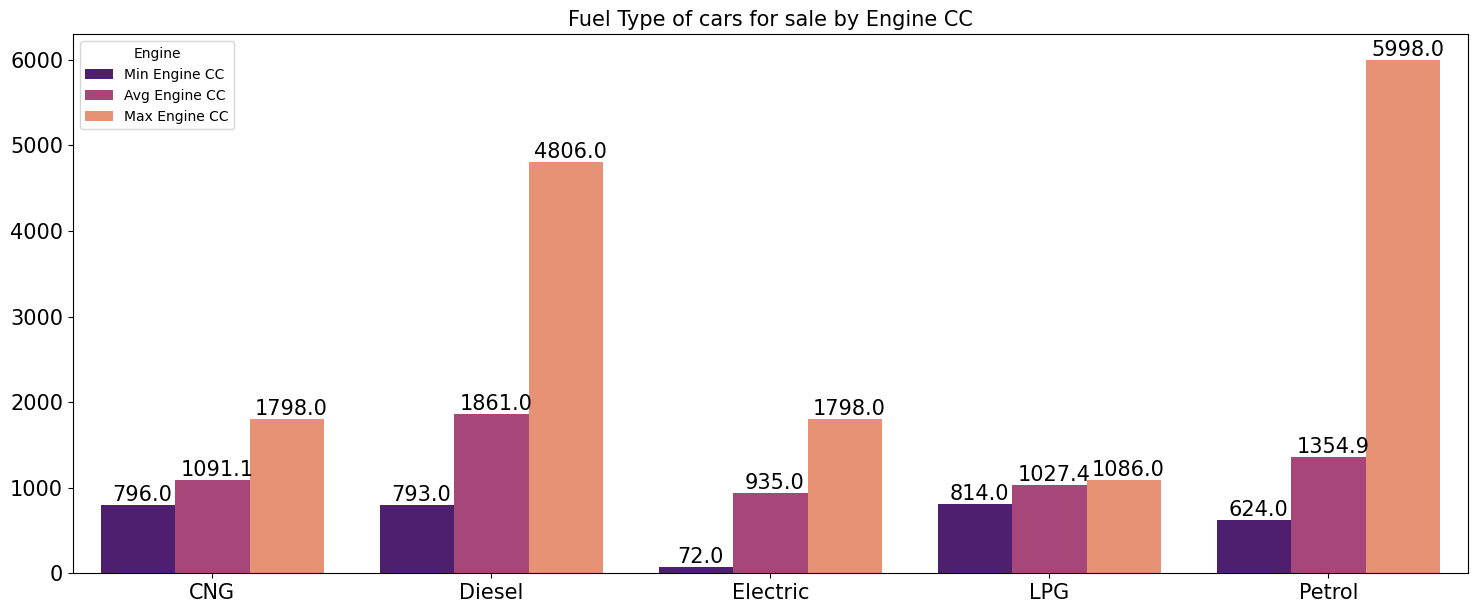

In [ ]:
fe = fe.melt("Fuel", var_name = "Engine", value_name = "CC")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Fuel", y = "CC", hue = "Engine", data = fe, palette = "magma")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.15, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Fuel Type of cars for sale by Engine CC", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Fuel Type of cars for sale by Power bph

In [ ]:
fp = df.groupby("Fuel_Type")["Power bph"].agg(["min", "mean", "max"]).reset_index()
fp.columns = ["Fuel", "Min Power bph", "Avg Power bph", "Max Power bph"]
fp

Fuel  Min Power bph  Avg Power bph  Max Power bph
0  CNG      38.40          65.69          138.00        
1  Diesel   35.50          127.66         394.30        
2  Electric 41.00          57.00          73.00         
3  LPG      55.20          59.91          68.05         
4  Petrol   34.20          97.62          560.00

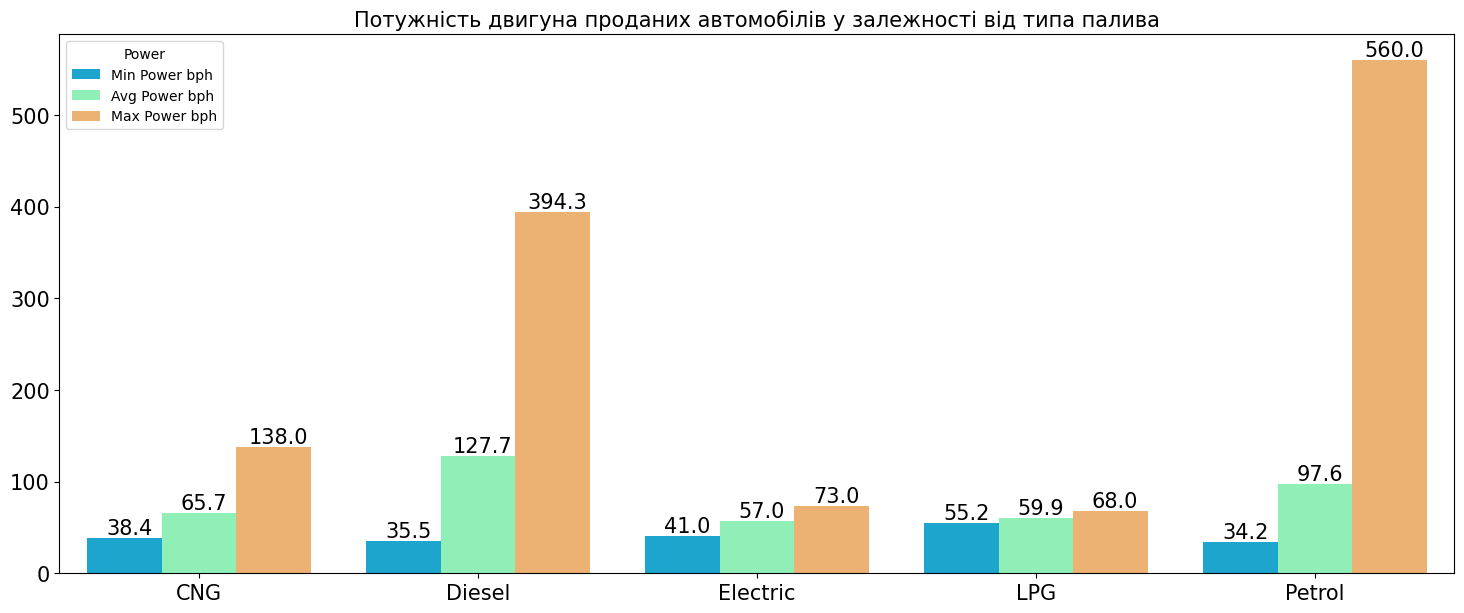

In [ ]:
fp = fp.melt("Fuel", var_name = "Power", value_name = "bph")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Fuel", y = "bph", hue = "Power", data = fp, palette = "rainbow")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.15, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Потужність двигуна проданих автомобілів у залежності від типа палива", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Fuel Type of cars for sale by Price

In [ ]:
fsp = df.groupby("Fuel_Type")["Price"].agg(["count", "sum", "min", "mean", "max"]).reset_index()
fsp.columns = ["Fuel", "Cars", "Total Price", "Min Price", "Avg Price", "Max Price"]
fsp

Fuel  Cars  Total Price  Min Price  Avg Price  Max Price
0  CNG       56   196.94       1.20       3.52       8.35      
1  Diesel    3205 41154.14     0.60       12.84      160.00    
2  Electric  2    25.75        12.75      12.88      13.00     
3  LPG       10   24.87        1.45       2.49       3.20      
4  Petrol    2746 15655.22     0.44       5.70       120.00

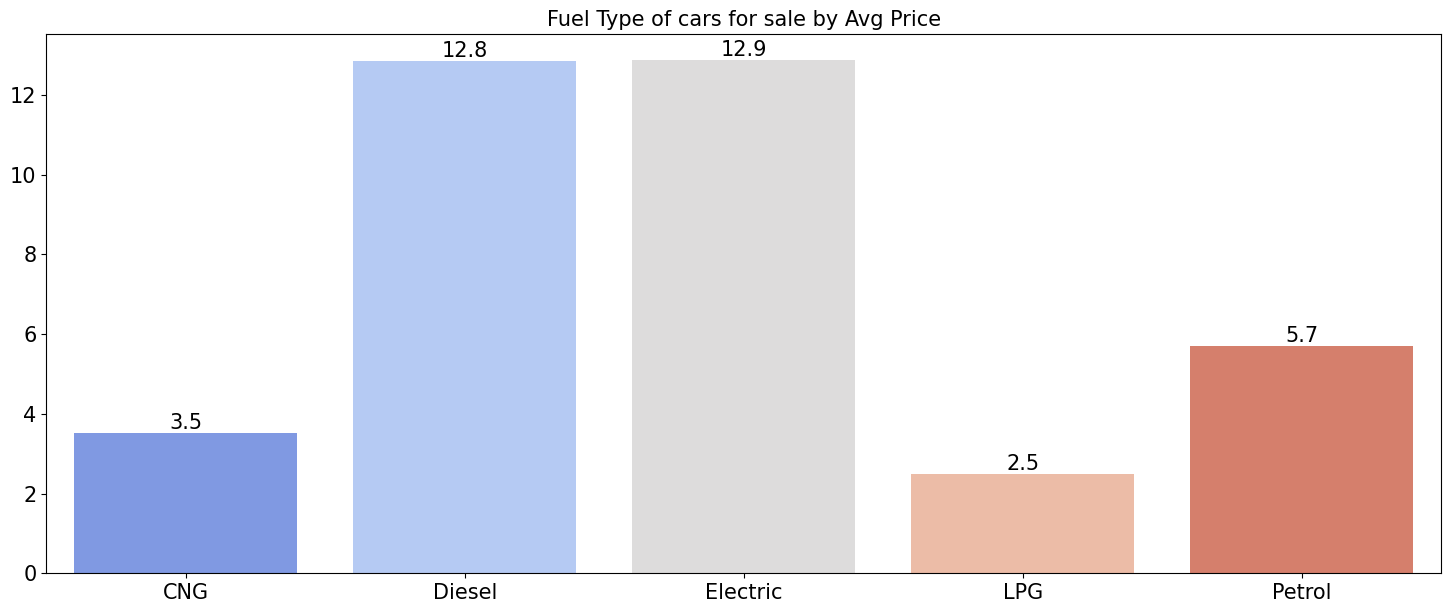

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Fuel", y = "Avg Price", data = fsp, palette = "coolwarm")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.4, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Fuel Type of cars for sale by Avg Price", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Transmission Type of cars for sale by Year

In [ ]:
ty = df.groupby(["Year", "Transmission"])["Transmission"].agg(["count"]).reset_index()
ty.columns = ["Year", "Transmission", "Cars"]
ty.sort_values(by = "Cars")

Year Transmission  Cars
0   1998  Automatic    1   
2   1999  Manual       2   
6   2003  Automatic    2   
1   1998  Manual       3   
3   2000  Manual       4   
8   2004  Automatic    6   
4   2001  Manual       8   
10  2005  Automatic    9   
12  2006  Automatic    11  
5   2002  Manual       15  
7   2003  Manual       15  
14  2007  Automatic    20  
9   2004  Manual       25  
16  2008  Automatic    42  
38  2019  Automatic    46  
11  2005  Manual       48  
39  2019  Manual       56  
18  2009  Automatic    67  
13  2006  Manual       67  
20  2010  Automatic    77  
15  2007  Manual       105 
36  2018  Automatic    107 
19  2009  Manual       131 
17  2008  Manual       132 
22  2011  Automatic    132 
24  2012  Automatic    147 
26  2013  Automatic    180 
37  2018  Manual       191 
34  2017  Automatic    198 
30  2015  Automatic    221 
28  2014  Automatic    225 
32  2016  Automatic    229 
21  2010  Manual       265 
23  2011  Manual       334 
35  2017  Manual       389 
25  2012  Manual       433 
27  2013  Manual       469 
33  2016  Manual       512 
31  2015  Manual       523 
29  2014  Manual       572

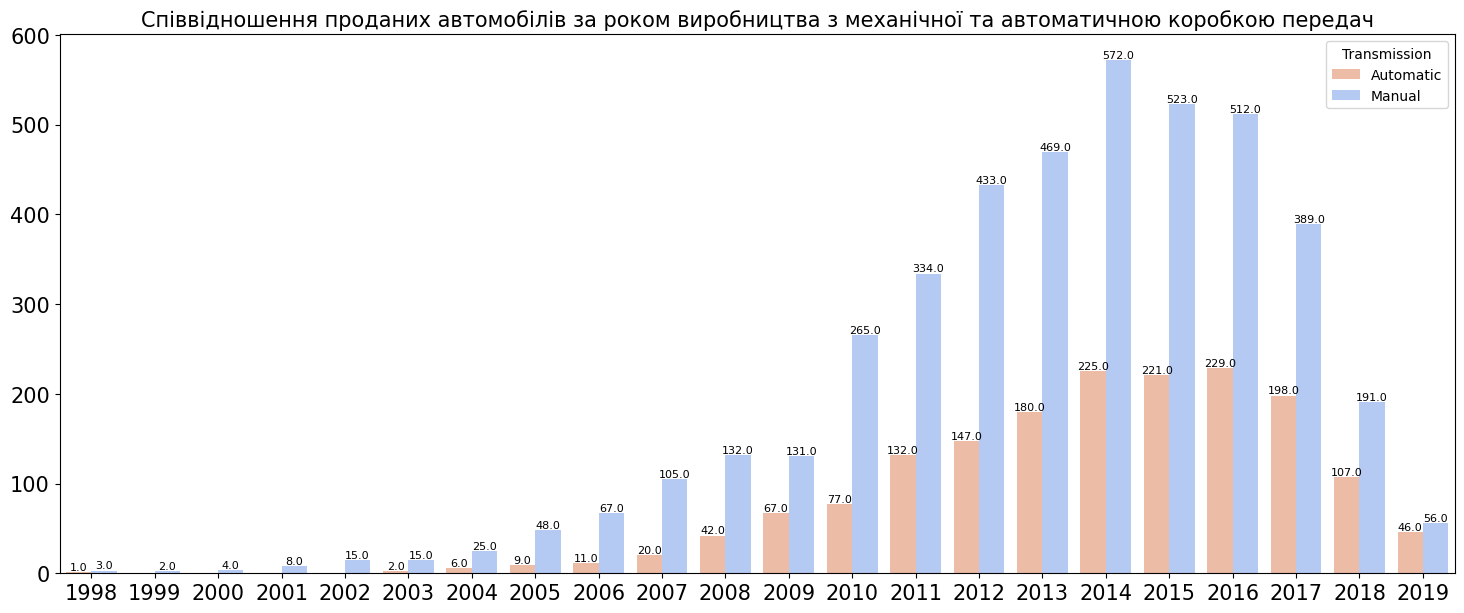

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Year", y = "Cars", hue = "Transmission", data = ty, palette = "coolwarm_r")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.2, p.get_height()),
                 ha='center', va='bottom', color='black', size = 8)
plt.title("Співвідношення проданих автомобілів за роком виробництва з механічної та автоматичною коробкою передач", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Transmission Type of cars for sale by Kilometers_Driven

In [ ]:
td = df.groupby("Transmission")["Kilometers_Driven"].agg(["count", "sum", "min", "mean", "max"]).reset_index()
td.columns = ["Transmission", "Cars", "Total Drive(km)", "Min Drive(km)", "Avg Drive(km)", "Max Drive(km)"]
td

Transmission  Cars  Total Drive(km)  Min Drive(km)  Avg Drive(km)  \
0  Automatic    1720  94661515         600           55035.76         
1  Manual       4299  258884796        171           60219.77         

   Max Drive(km)  
0  6500000        
1  720000

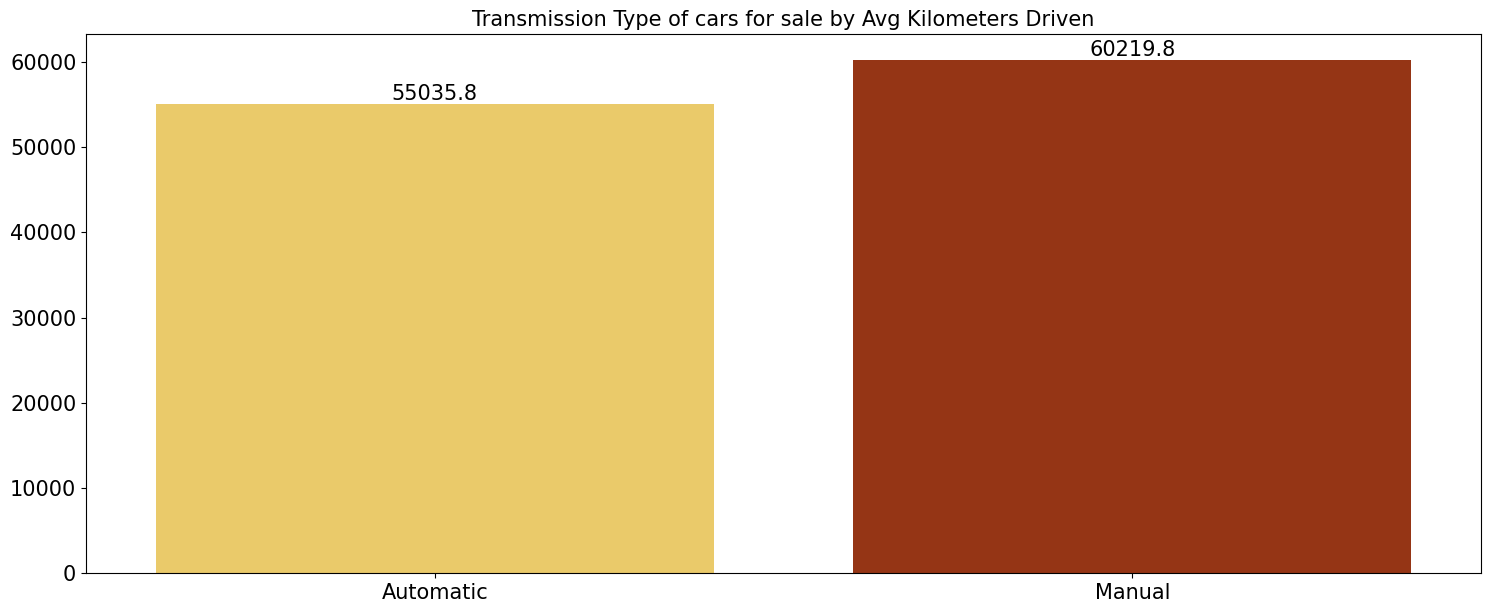

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Transmission", y = "Avg Drive(km)", data = td, palette = "afmhot_r")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.4, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Transmission Type of cars for sale by Avg Kilometers Driven", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Transmission Type of cars for sale by Owner_Type

In [ ]:
co = df.groupby(["Transmission", "Owner_Type"])["Owner_Type"].agg(["count"]).reset_index()
co

Transmission      Owner_Type  count
0  Automatic    First           1409 
1  Automatic    Fourth & Above  1    
2  Automatic    Second          285  
3  Automatic    Third           25   
4  Manual       First           3520 
5  Manual       Fourth & Above  8    
6  Manual       Second          683  
7  Manual       Third           88

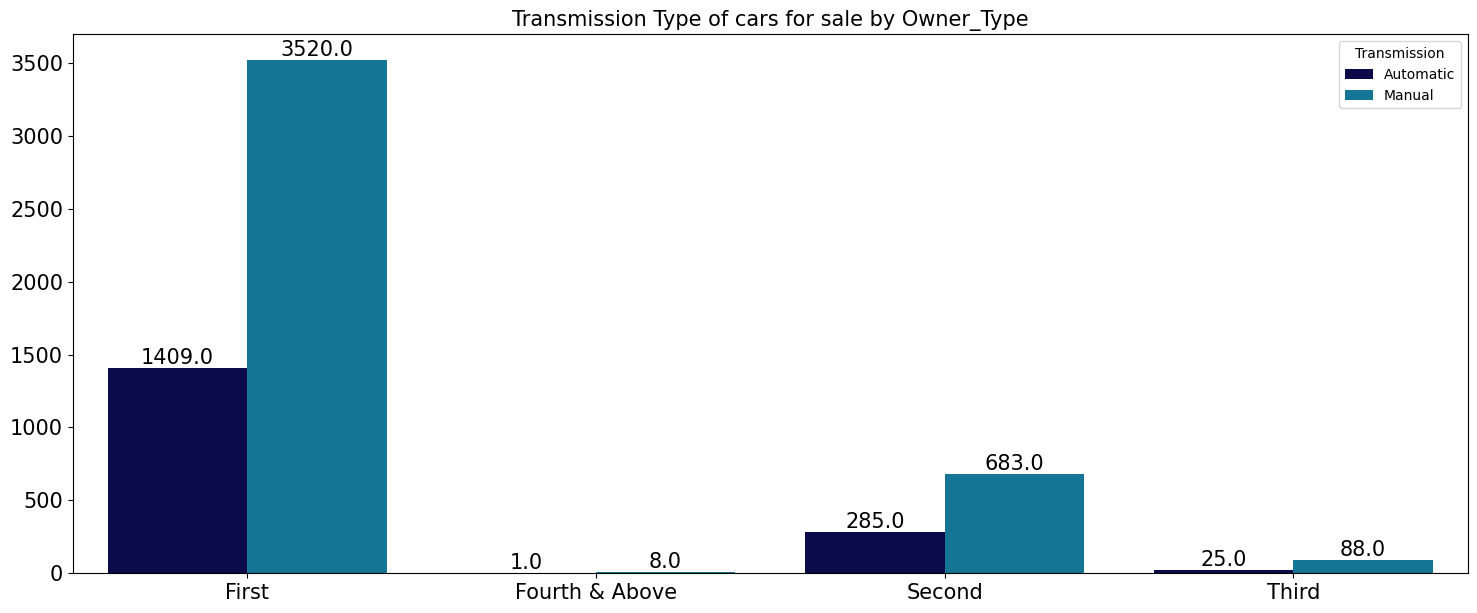

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Owner_Type", y = "count", hue = "Transmission", data = co, palette = "ocean")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.2, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Transmission Type of cars for sale by Owner_Type", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Transmission Type of cars for sale by Mileage kmpl/kg

In [ ]:
tm = df.groupby("Transmission")["Mileage kmpl/kg"].agg(["count", "sum", "min", "mean", "max"]).reset_index()
tm.columns = ["Transmission", "Cars", "Total Mileage kmpl/kg", "Min Mileage kmpl/kg", "Avg Mileage kmpl/kg", "Max Mileage kmpl/kg"]
tm

Transmission  Cars  Total Mileage kmpl/kg  Min Mileage kmpl/kg  \
0  Automatic    1718 27006.40               0.00                   
1  Manual       4299 82111.66               0.00                   

   Avg Mileage kmpl/kg  Max Mileage kmpl/kg  
0 15.72                28.40                 
1 19.10                33.54

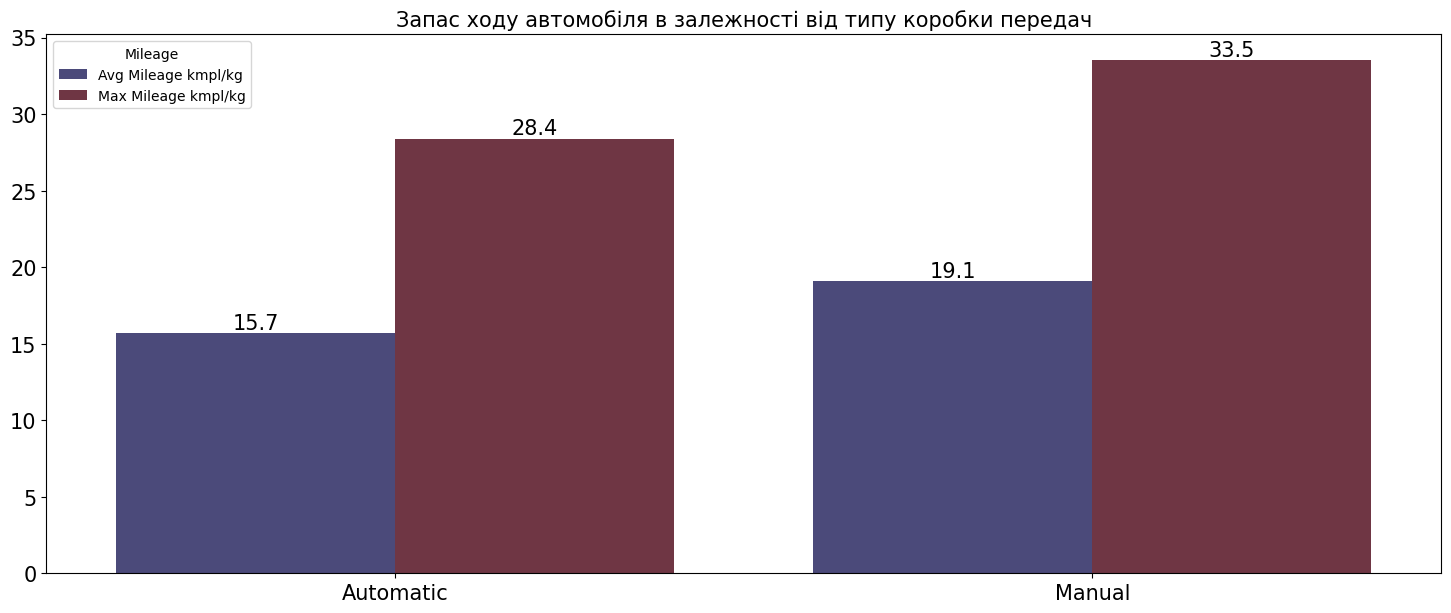

In [ ]:
tm = tm[["Transmission", "Avg Mileage kmpl/kg", "Max Mileage kmpl/kg"]]
tm = tm.melt("Transmission", var_name = "Mileage", value_name = "kmpl/kg")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Transmission", y = "kmpl/kg", hue = "Mileage", data = tm, palette = "icefire")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.2, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Запас ходу автомобіля в залежності від типу коробки передач", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Transmission Type of cars for sale by Engine CC

In [ ]:
te = df.groupby("Transmission")["Engine CC"].agg(["count", "min", "max"]).reset_index()
te.columns = ["Transmission", "Cars", "Min Engine CC", "Max Engine CC"]
te

Transmission  Cars  Min Engine CC  Max Engine CC
0  Automatic    1720 72.00          5998.00       
1  Manual       4299 624.00         3436.00

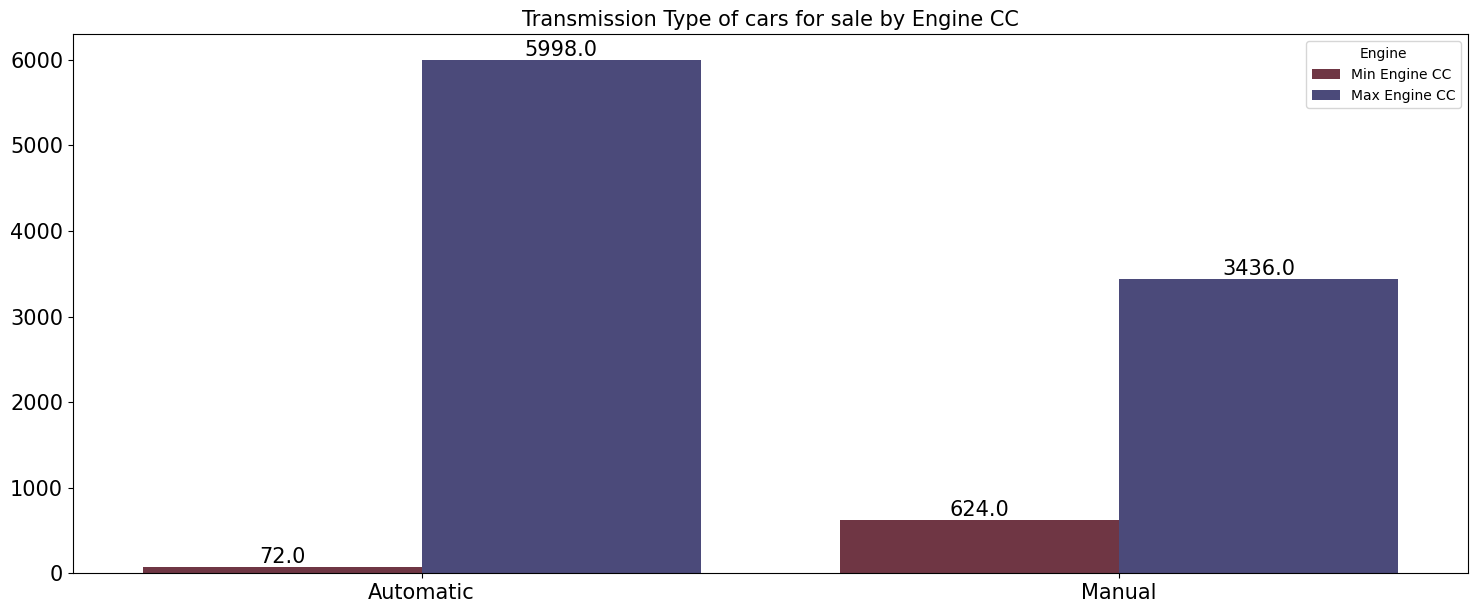

In [ ]:
te = te[["Transmission", "Min Engine CC", "Max Engine CC"]]
te = te.melt("Transmission", var_name = "Engine", value_name = "CC")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Transmission", y = "CC", hue = "Engine", data = te, palette = "icefire_r")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.2, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Transmission Type of cars for sale by Engine CC", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Transmission Type of cars for sale by Power bph

In [ ]:
tp = df.groupby("Transmission")["Power bph"].agg(["count", "min", "mean", "max"]).reset_index()
tp.columns = ["Transmission", "Cars", "Min Power bph", "Avg Power bph", "Max Power bph"]
tp

Transmission  Cars  Min Power bph  Avg Power bph  Max Power bph
0  Automatic    1720 37.48          167.01         560.00        
1  Manual       4299 34.20          91.73          210.00

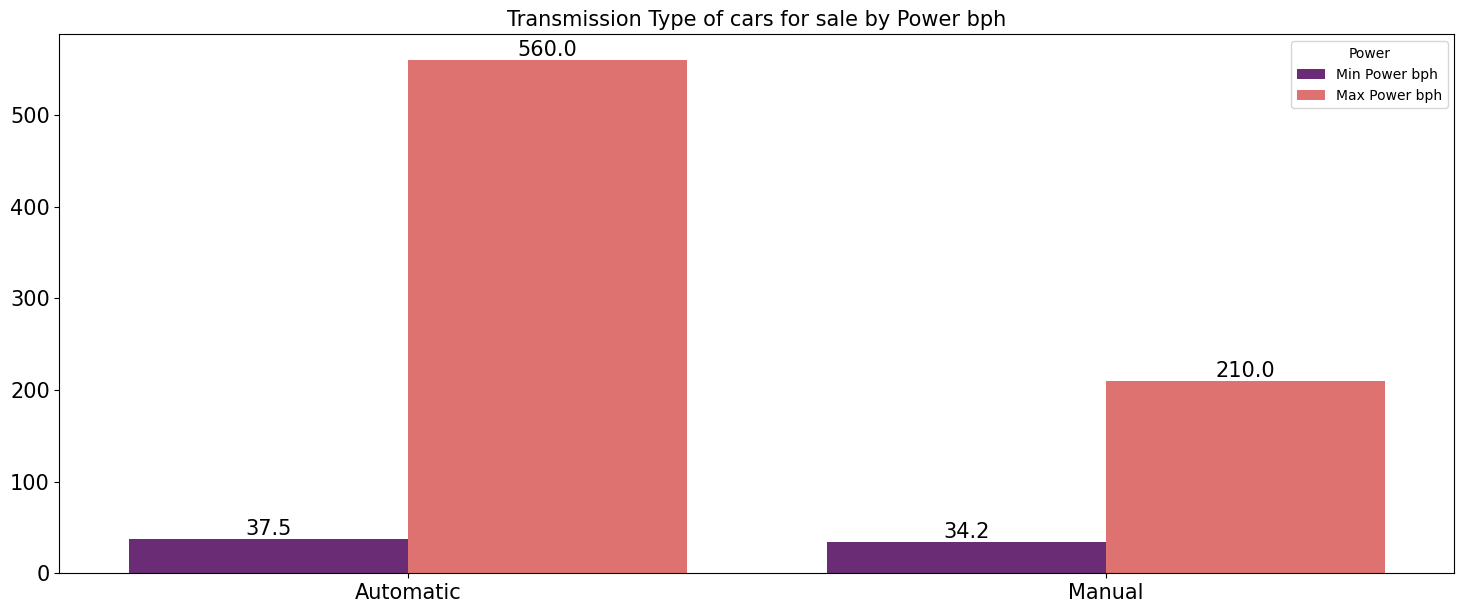

In [ ]:
tp = tp[["Transmission", "Min Power bph", "Max Power bph"]]
tp = tp.melt("Transmission", var_name = "Power", value_name = "bph")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Transmission", y = "bph", hue = "Power", data = tp, palette = "magma")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.2, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Transmission Type of cars for sale by Power bph", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Transmission Type of cars for sale by Seats

In [ ]:
ts = df.groupby("Transmission")["Seats"].agg(["count", "sum", "min", "mean", "max"]).reset_index()
ts.columns = ["Transmission", "Cars", "Total Seats", "Min Seats", "Avg Seats", "Max Seats"]
ts

Transmission  Cars  Total Seats  Min Seats  Avg Seats  Max Seats
0  Automatic    1720 8914.52      0.00       5.18       8.00      
1  Manual       4299 22858.23     2.00       5.32       10.00

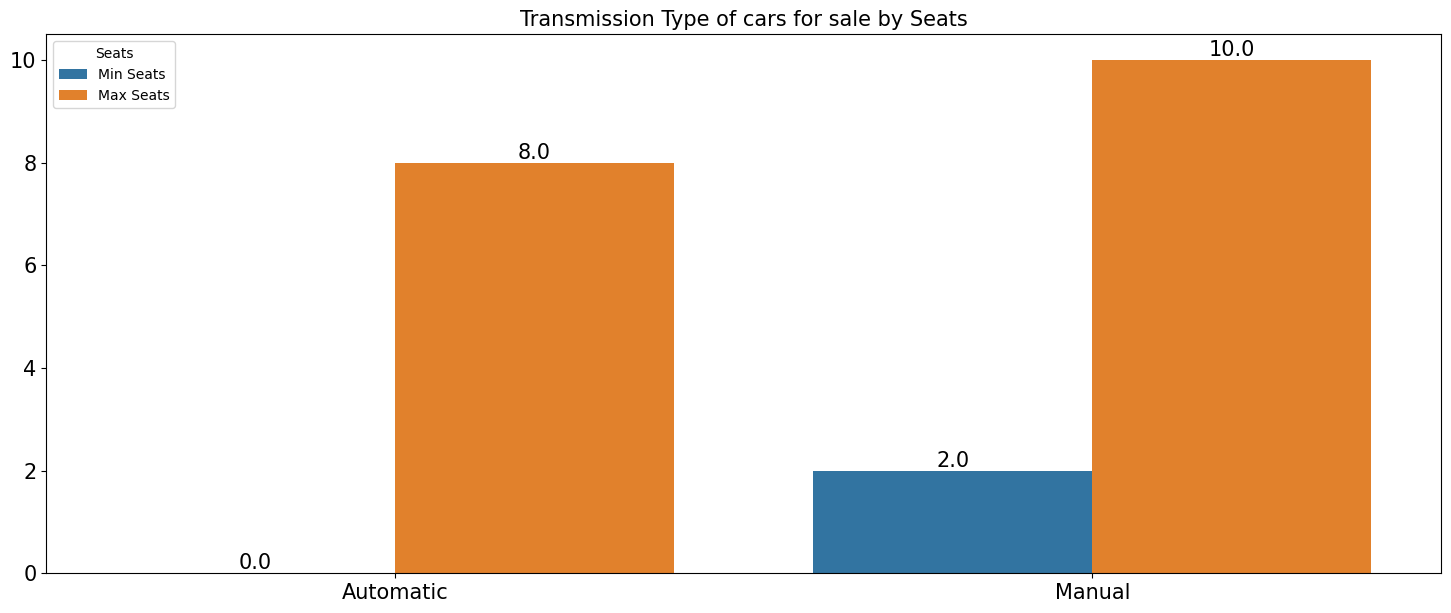

In [ ]:
ts = ts[["Transmission", "Min Seats", "Max Seats"]]
ts = ts.melt("Transmission", var_name = "Seats", value_name = "count")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Transmission", y = "count", hue = "Seats", data = ts)
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.2, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Transmission Type of cars for sale by Seats", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Transmission Type of cars for sale by Price

In [ ]:
tp = df.groupby("Transmission")["Price"].agg(["count", "sum", "min", "mean", "max"]).reset_index()
tp.columns = ["Transmission", "Cars", "Total Price", "Min Price", "Avg Price", "Max Price"]
tp

Transmission  Cars  Total Price  Min Price  Avg Price  Max Price
0  Automatic    1720 34131.63     1.50       19.84      160.00    
1  Manual       4299 22925.29     0.44       5.33       40.88

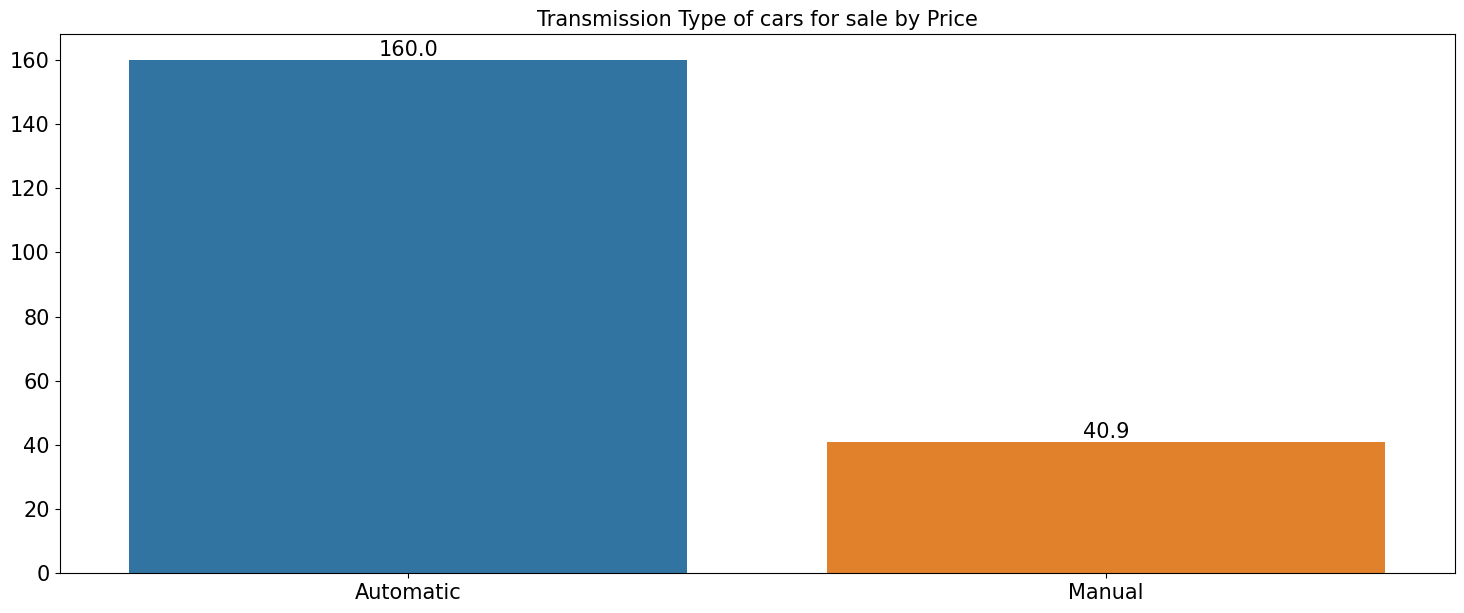

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Transmission", y = "Max Price", data = tp)
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.4, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Transmission Type of cars for sale by Price", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Owner Type of cars for sale by Year

In [ ]:
oy = df.groupby(["Owner_Type", "Year"])["Year"].agg(["count"]).reset_index()
oy.columns = ["Owner", "Year", "Cars"]
oy.sort_values(by = "Cars")

Owner  Year  Cars
0   First           1998  1   
1   First           1999  1   
30  Second          1999  1   
29  Second          1998  1   
28  Fourth & Above  2010  1   
27  Fourth & Above  2009  1   
24  Fourth & Above  2006  1   
23  Fourth & Above  2005  1   
22  Fourth & Above  2001  1   
50  Third           1998  2   
31  Second          2000  2   
26  Fourth & Above  2008  2   
25  Fourth & Above  2007  2   
32  Second          2001  2   
64  Third           2015  2   
2   First           2000  2   
3   First           2001  2   
51  Third           2001  3   
63  Third           2013  3   
54  Third           2004  3   
33  Second          2002  4   
4   First           2002  5   
53  Third           2003  5   
5   First           2003  5   
55  Third           2005  5   
52  Third           2002  6   
34  Second          2003  7   
49  Second          2018  7   
60  Third           2010  8   
56  Third           2006  10  
58  Third           2008  11  
6   First           2004  11  
59  Third           2009  13  
62  Third           2012  13  
61  Third           2011  14  
57  Third           2007  15  
35  Second          2004  17  
36  Second          2005  21  
48  Second          2017  24  
7   First           2005  30  
37  Second          2006  33  
8   First           2006  34  
47  Second          2016  34  
38  Second          2007  43  
9   First           2007  65  
40  Second          2009  68  
39  Second          2008  80  
10  First           2008  81  
46  Second          2015  81  
41  Second          2010  97  
21  First           2019  102 
45  Second          2014  104 
43  Second          2012  108 
42  Second          2011  116 
11  First           2009  116 
44  Second          2013  118 
12  First           2010  236 
20  First           2018  291 
13  First           2011  336 
14  First           2012  459 
15  First           2013  528 
19  First           2017  563 
17  First           2015  661 
16  First           2014  693 
18  First           2016  707

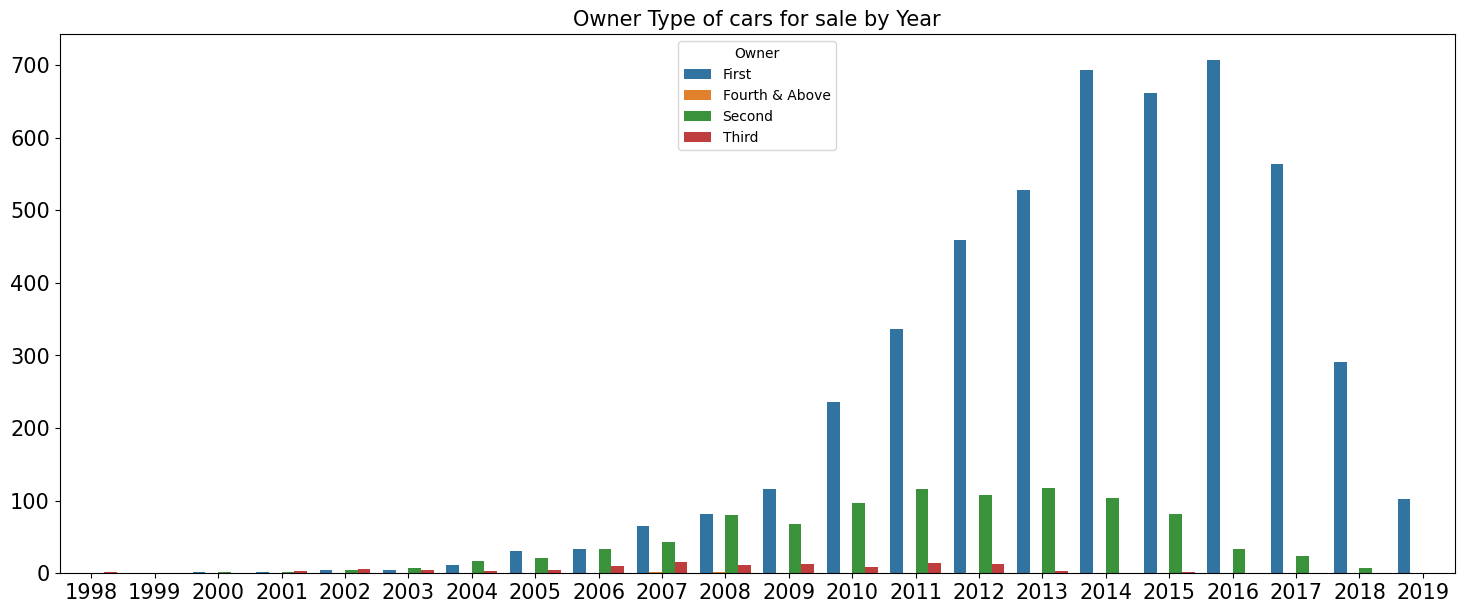

In [ ]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "Year", y = "Cars", hue = "Owner", data = oy)
plt.title("Owner Type of cars for sale by Year", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Owner Type of cars for sale by Kilometers_Driven

In [ ]:
ok = df.groupby("Owner_Type")["Kilometers_Driven"].agg(["count", "sum", "min", "mean", "max"]).reset_index()
ok.columns = ["Owner", "Cars", "Total Drive(km)", "Min Drive(km)", "Avg Drive(km)", "Max Drive(km)"]
ok

Owner  Cars  Total Drive(km)  Min Drive(km)  Avg Drive(km)  \
0  First           4929  272902869        171           55366.78         
1  Fourth & Above  9     1221833          59833         135759.22        
2  Second          968   69399021         3000          71693.20         
3  Third           113   10022588         6500          88695.47         

   Max Drive(km)  
0  6500000        
1  262000         
2  250000         
3  255000

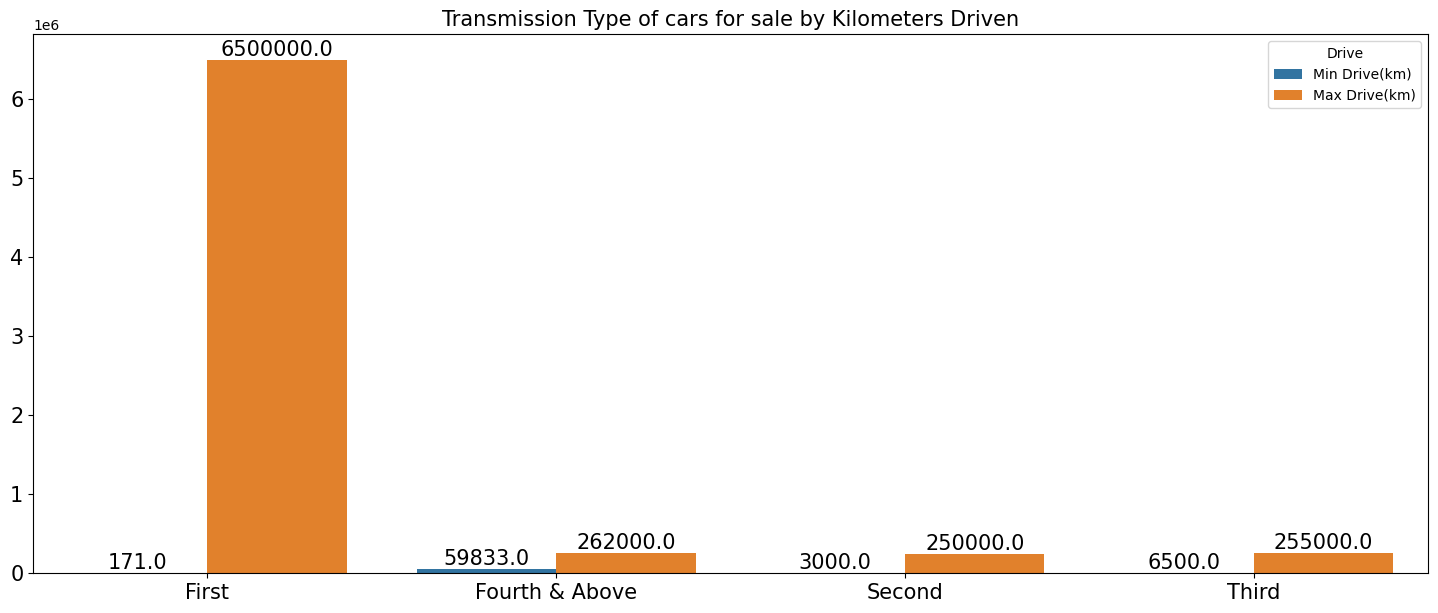

In [ ]:
ok = ok[["Owner", "Min Drive(km)", "Max Drive(km)"]]
ok = ok.melt("Owner", var_name = "Drive", value_name = "km")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Owner", y = "km", hue = "Drive", data = ok)
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.2, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Transmission Type of cars for sale by Kilometers Driven", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Owner Type of cars for sale by Mileage kmpl/kg

In [ ]:
om = df.groupby("Owner_Type")["Mileage kmpl/kg"].agg(["count", "sum", "min", "mean", "max"]).reset_index()
om.columns = ["Owner", "Cars", "Total Mileage kmpl/kg", "Min Mileage kmpl/kg", "Avg Mileage kmpl/kg", "Max Mileage kmpl/kg"]
om

Owner  Cars  Total Mileage kmpl/kg  Min Mileage kmpl/kg  \
0  First           4927 90959.35               0.00                   
1  Fourth & Above  9    110.90                 0.00                   
2  Second          968  16313.52               0.00                   
3  Third           113  1734.29                0.00                   

   Avg Mileage kmpl/kg  Max Mileage kmpl/kg  
0 18.46                33.54                 
1 12.32                17.80                 
2 16.85                33.44                 
3 15.35                28.40

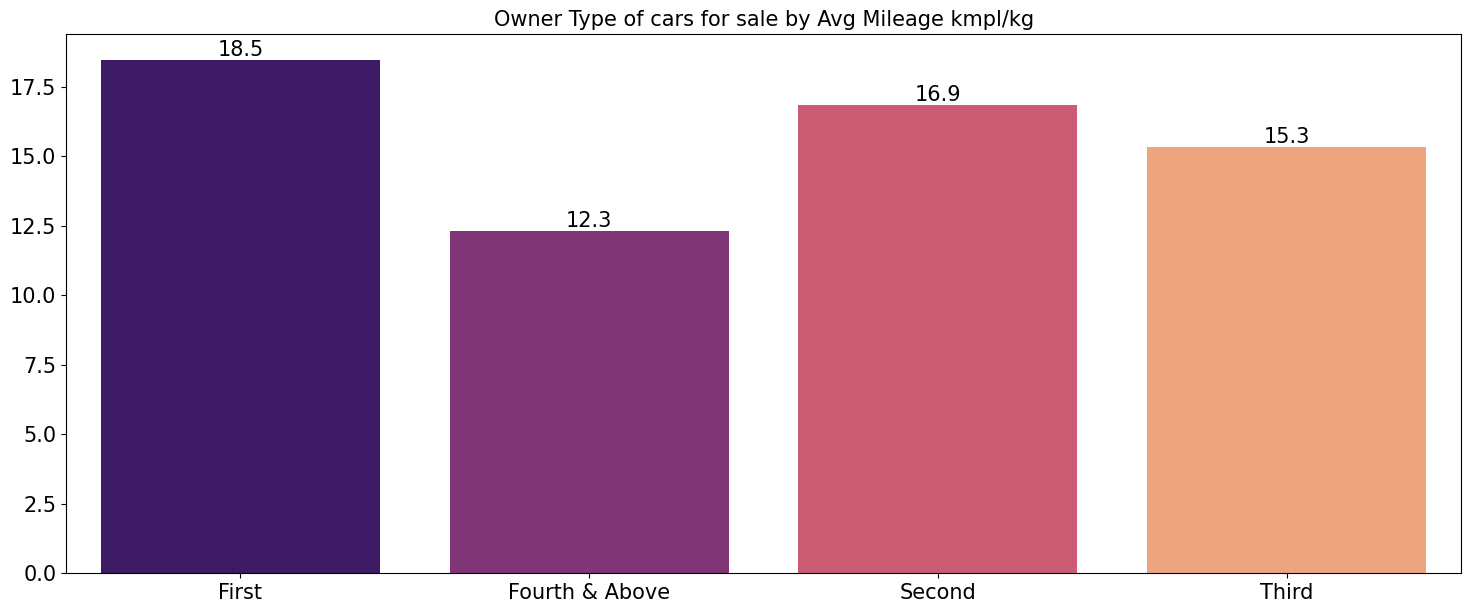

In [ ]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Owner", y = "Avg Mileage kmpl/kg", data = om, palette = "magma")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.4, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Owner Type of cars for sale by Avg Mileage kmpl/kg", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Owner Type of cars for sale by Engine CC

In [ ]:
oe = df.groupby("Owner_Type")["Engine CC"].agg(["count","min", "max"]).reset_index()
oe.columns = ["Owner", "Cars", "Min Engine CC", "Max Engine CC"]
oe

Owner  Cars  Min Engine CC  Max Engine CC
0  First           4929 72.00          5998.00       
1  Fourth & Above  9    1197.00        2499.00       
2  Second          968  624.00         5461.00       
3  Third           113  796.00         5204.00

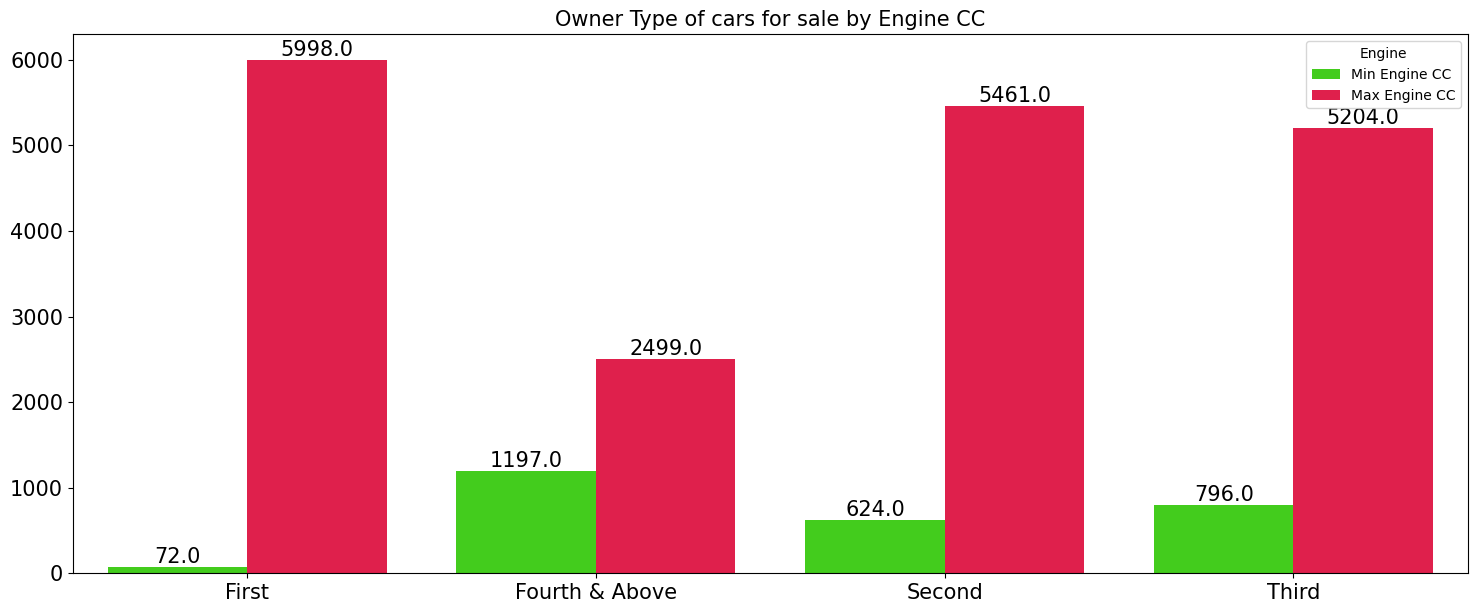

In [ ]:
oe = oe[["Owner", "Min Engine CC", "Max Engine CC"]]
oe = oe.melt("Owner", var_name = "Engine", value_name = "CC")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Owner", y = "CC", hue = "Engine", data = oe, palette = "prism")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.2, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Owner Type of cars for sale by Engine CC", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Owner Type of cars for sale by Power bph

In [ ]:
tp = df.groupby("Owner_Type")["Power bph"].agg(["count", "min", "mean", "max"]).reset_index()
tp.columns = ["Owner", "Cars", "Min Power bph", "Avg Power bph", "Max Power bph"]
tp

Owner  Cars  Min Power bph  Avg Power bph  Max Power bph
0  First           4929 34.20          112.50         552.00        
1  Fourth & Above  9    70.00          106.78         163.50        
2  Second          968  35.00          116.90         550.00        
3  Third           113  35.00          114.53         560.00

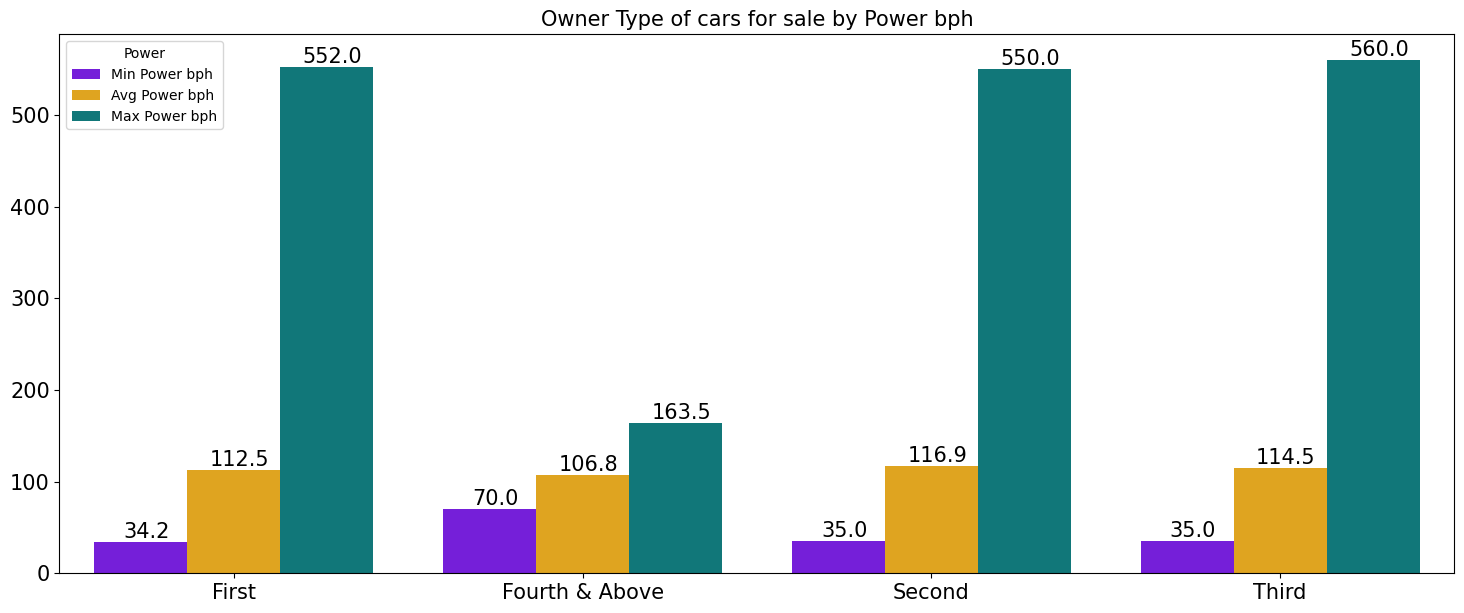

In [ ]:
tp = tp[["Owner", "Min Power bph", "Avg Power bph", "Max Power bph"]]
tp = tp.melt("Owner", var_name = "Power", value_name = "bph")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Owner", y = "bph", hue = "Power", data = tp, palette = "prism_r")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.15, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Owner Type of cars for sale by Power bph", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Owner Type of cars for sale by Seats

In [ ]:
os = df.groupby("Owner_Type")["Seats"].agg(["count", "sum", "min", "mean", "max"]).reset_index()
os.columns = ["Owner", "Cars", "Total Seats", "Min Seats", "Avg Seats", "Max Seats"]
os

Owner  Cars  Total Seats  Min Seats  Avg Seats  Max Seats
0  First           4929 26011.71     0.00       5.28       10.00     
1  Fourth & Above  9    55.28        5.00       6.14       8.00      
2  Second          968  5101.20      2.00       5.27       10.00     
3  Third           113  604.56       2.00       5.35       10.00

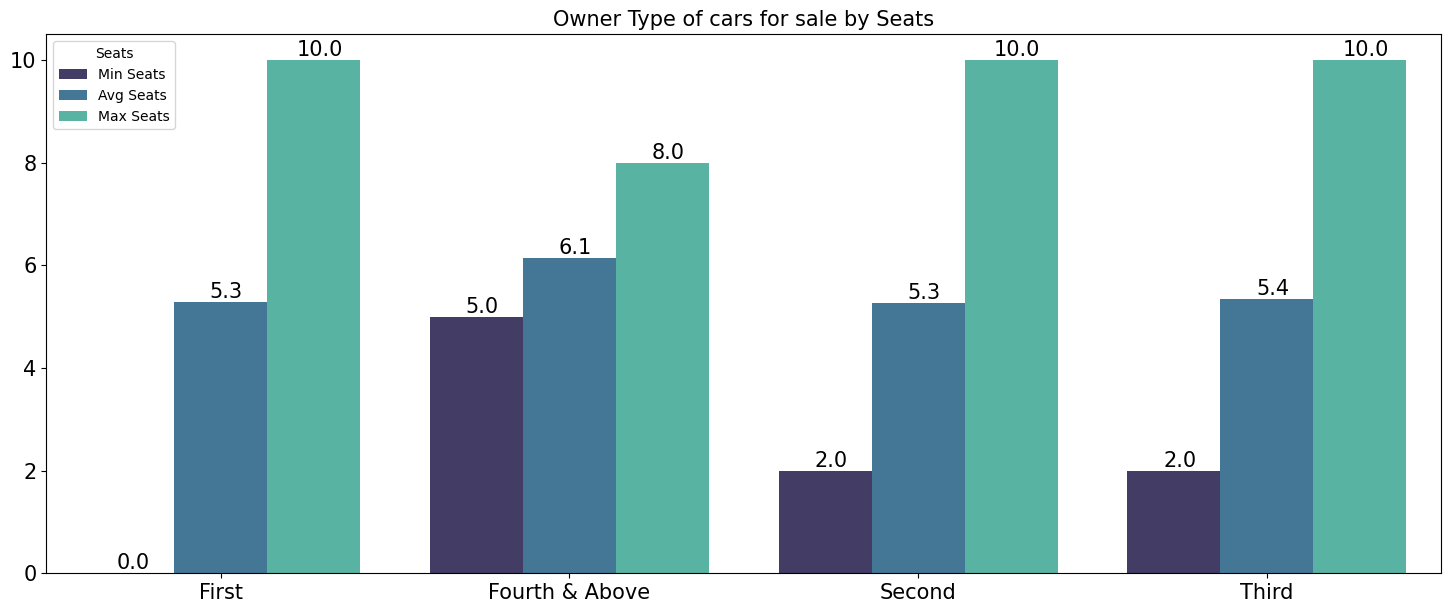

In [ ]:
os = os[["Owner", "Min Seats", "Avg Seats", "Max Seats"]]
os = os.melt("Owner", var_name = "Seats", value_name = "count")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Owner", y = "count", hue = "Seats", data = os, palette = "mako")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.15, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Owner Type of cars for sale by Seats", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Owner Type of cars for sale by Price

In [ ]:
op = df.groupby("Owner_Type")["Price"].agg(["count", "sum", "min", "mean", "max"]).reset_index()
op.columns = ["Owner", "Cars", "Total Price", "Min Price", "Avg Price", "Max Price"]
op

Owner  Cars  Total Price  Min Price  Avg Price  Max Price
0  First           4929 49104.89     0.50       9.96       160.00    
1  Fourth & Above  9    29.52        1.97       3.28       5.50      
2  Second          968  7356.69      0.44       7.60       90.00     
3  Third           113  565.82       0.45       5.01       120.00

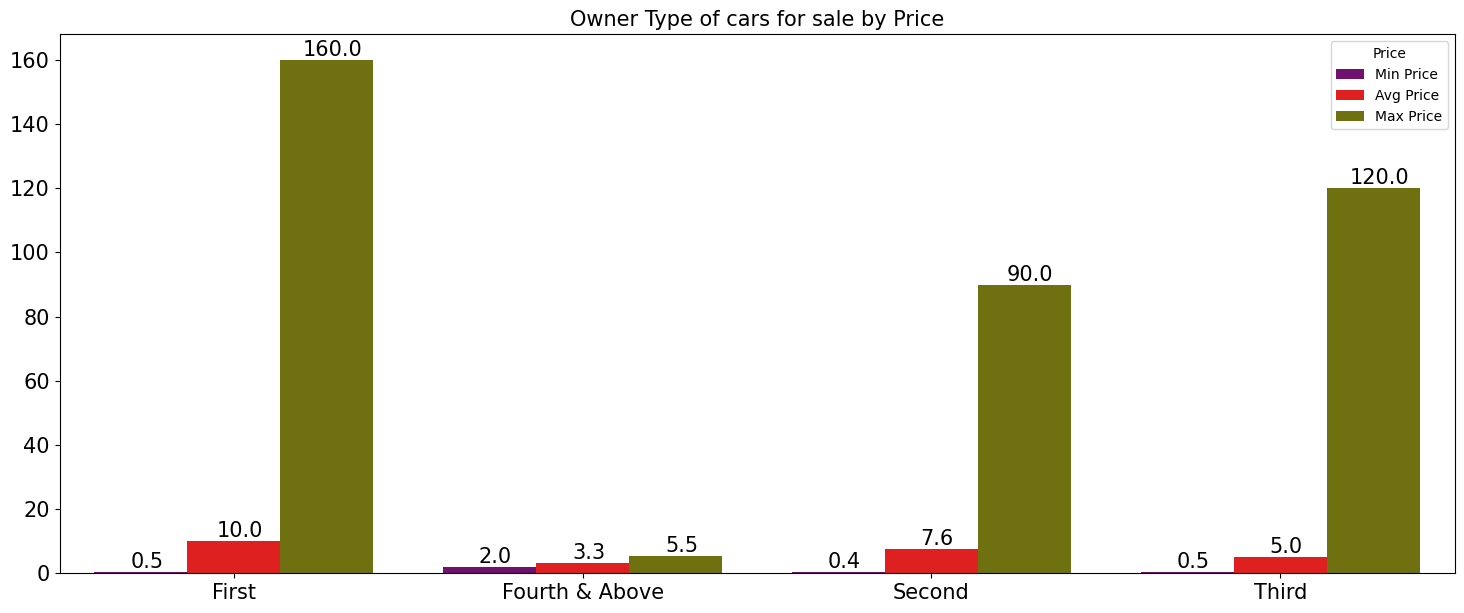

In [ ]:
op = op[["Owner", "Min Price", "Avg Price", "Max Price"]]
op = op.melt("Owner", var_name = "Price", value_name = "Amount")
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Owner", y = "Amount", hue = "Price", data = op, palette = "brg")
for p in graph.patches:
  graph.annotate('{:.01f}'.format(p.get_height()),
                 (p.get_x()+0.15, p.get_height()),
                 ha='center', va='bottom', color='black', size = 15)
plt.title("Owner Type of cars for sale by Price", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Linear Regression

In [ ]:
df.head()

S.No.                              Name    Location  Year  \
0  0      Maruti Wagon R LXI CNG            Mumbai      2010   
1  1      Hyundai Creta 1.6 CRDi SX Option  Pune        2015   
2  2      Honda Jazz V                      Chennai     2011   
3  3      Maruti Ertiga VDI                 Chennai     2012   
4  4      Audi A4 New 2.0 TDI Multitronic   Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage kmpl/kg  \
0  72000              CNG       Manual       First     26.60              
1  41000              Diesel    Manual       First     19.67              
2  46000              Petrol    Manual       First     18.20              
3  87000              Diesel    Manual       First     20.77              
4  40670              Diesel    Automatic    Second    15.20              

   Engine CC  Power bph  Seats  Price  
0 998.00     58.16      5.00   1.75    
1 1582.00    126.20     5.00   12.50   
2 1199.00    88.70      5.00   4.50    
3 1248.00    88.76      7.00   6.00    
4 1968.00    140.80     5.00   17.74

Linear Regression (Year | Price)



In [ ]:
X = df[["Year"]]
y = df["Price"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)

lr = LinearRegression()

lr.fit(x_train, y_train)

y_hat = lr.predict(x_test)

pd.DataFrame({"Actual": y_test, "Predicted": y_hat}).head()

Actual  Predicted
4859 5.38    13.12     
2650 12.90   13.12     
727  3.25    6.02      
3960 10.82   14.14     
421  4.35    9.06

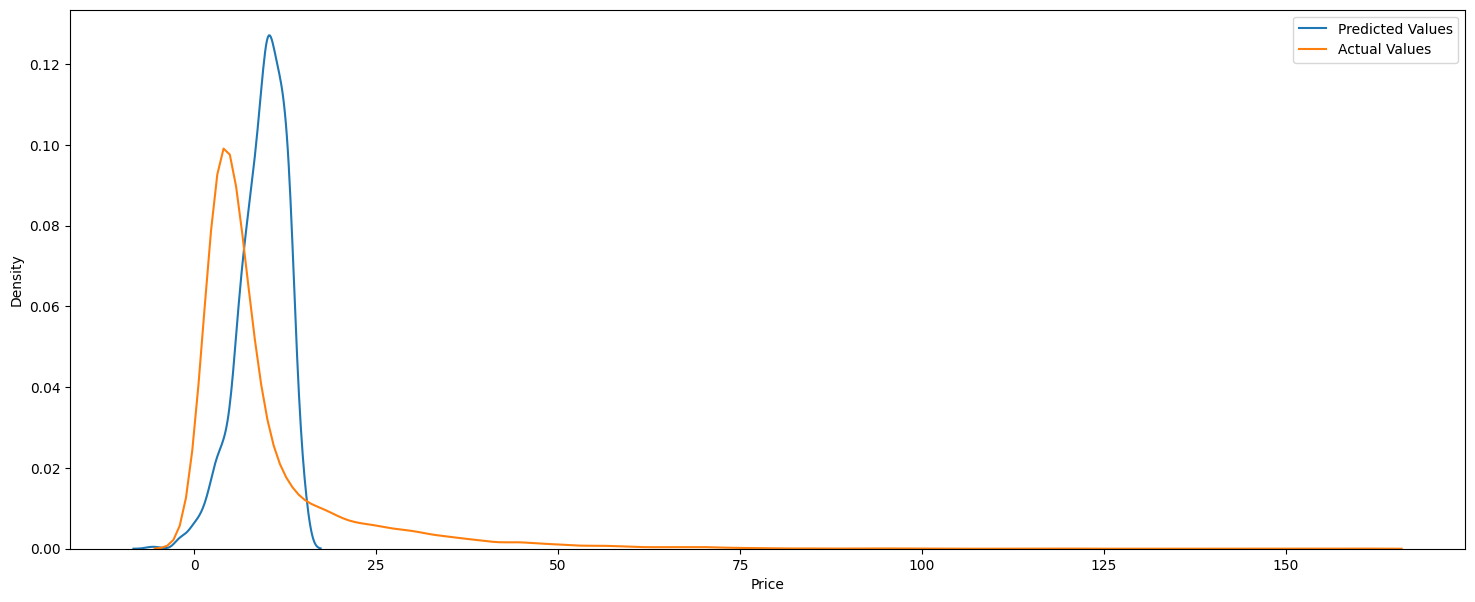

In [ ]:
plt.figure(figsize=(18, 7))
ax1 = sns.distplot(y_hat, hist=False, label='Predicted Values')
sns.distplot(y, hist=False, label='Actual Values', ax=ax1)
plt.legend()
plt.show()
plt.close()
plt.show()

In [ ]:
# Performance
print("Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = True))
print("Root Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = False))
print("Mean Absolute Error = ", mean_absolute_error(y_test, y_hat))
print("R-Squared: = ", r2_score(y_test, y_hat))

Mean Squared Error =  110.53237998480884
Root Mean Squared Error =  10.513438066817574
Mean Absolute Error =  6.799484666973446
R-Squared: =  0.10492931084611967


Linear Regression (Engine CC | Price)

In [ ]:
X = df[["Engine CC"]]
y = df["Price"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)

lr = LinearRegression()

lr.fit(x_train, y_train)

y_hat = lr.predict(x_test)

pd.DataFrame({"Actual": y_test, "Predicted": y_hat}).head()

Actual  Predicted
4859 5.38    4.25      
2650 12.90   9.01      
727  3.25    4.26      
3960 10.82   6.71      
421  4.35    7.91

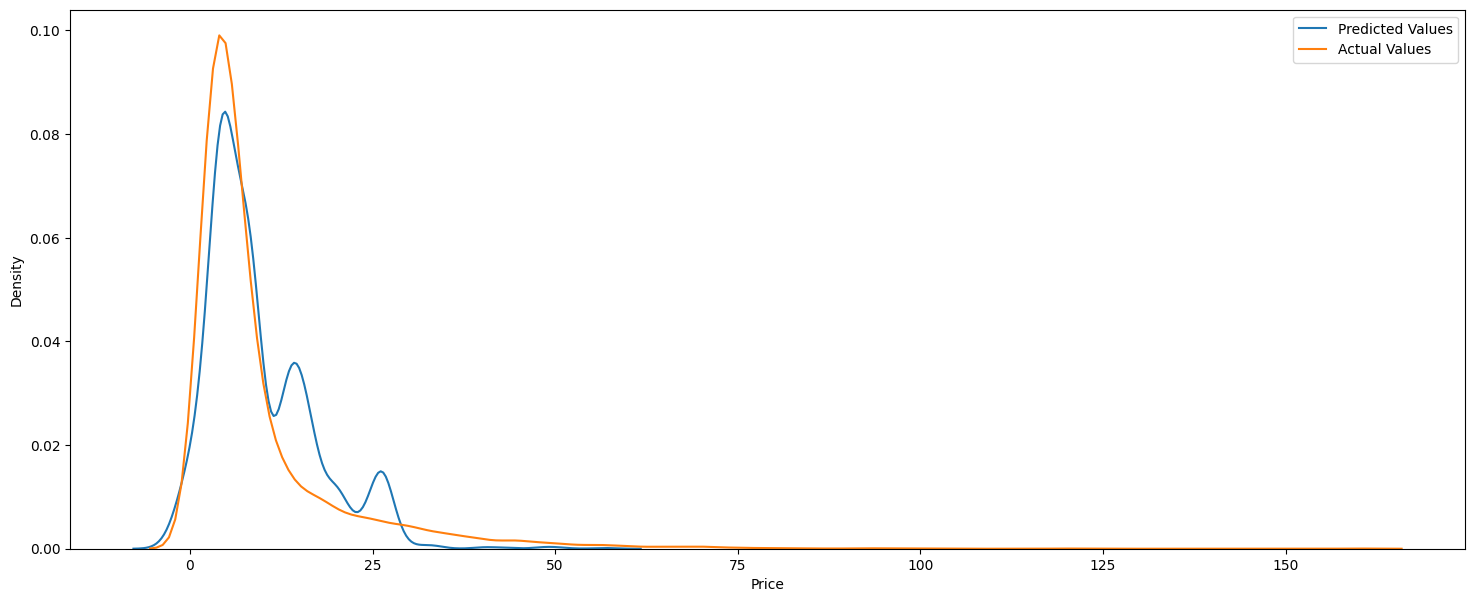

In [ ]:
plt.figure(figsize=(18, 7))
ax1 = sns.distplot(y_hat, hist=False, label='Predicted Values')
sns.distplot(y, hist=False, label='Actual Values', ax=ax1)
plt.legend()
plt.show()
plt.close()
plt.show()

In [ ]:
# Performance
print("Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = True))
print("Root Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = False))
print("Mean Absolute Error = ", mean_absolute_error(y_test, y_hat))
print("R-Squared: = ", r2_score(y_test, y_hat))

Mean Squared Error =  70.86117267463437
Root Mean Squared Error =  8.417907856150148
Mean Absolute Error =  5.050974470273945
R-Squared: =  0.4261793813825948


Linear Regression (Power bph | Price)

In [ ]:
X = df[["Power bph"]]
y = df["Price"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)

lr = LinearRegression()

lr.fit(x_train, y_train)

y_hat = lr.predict(x_test)

pd.DataFrame({"Actual": y_test, "Predicted": y_hat}).head()

Actual  Predicted
4859 5.38    5.28      
2650 12.90   11.61     
727  3.25    4.18      
3960 10.82   5.58      
421  4.35    7.40

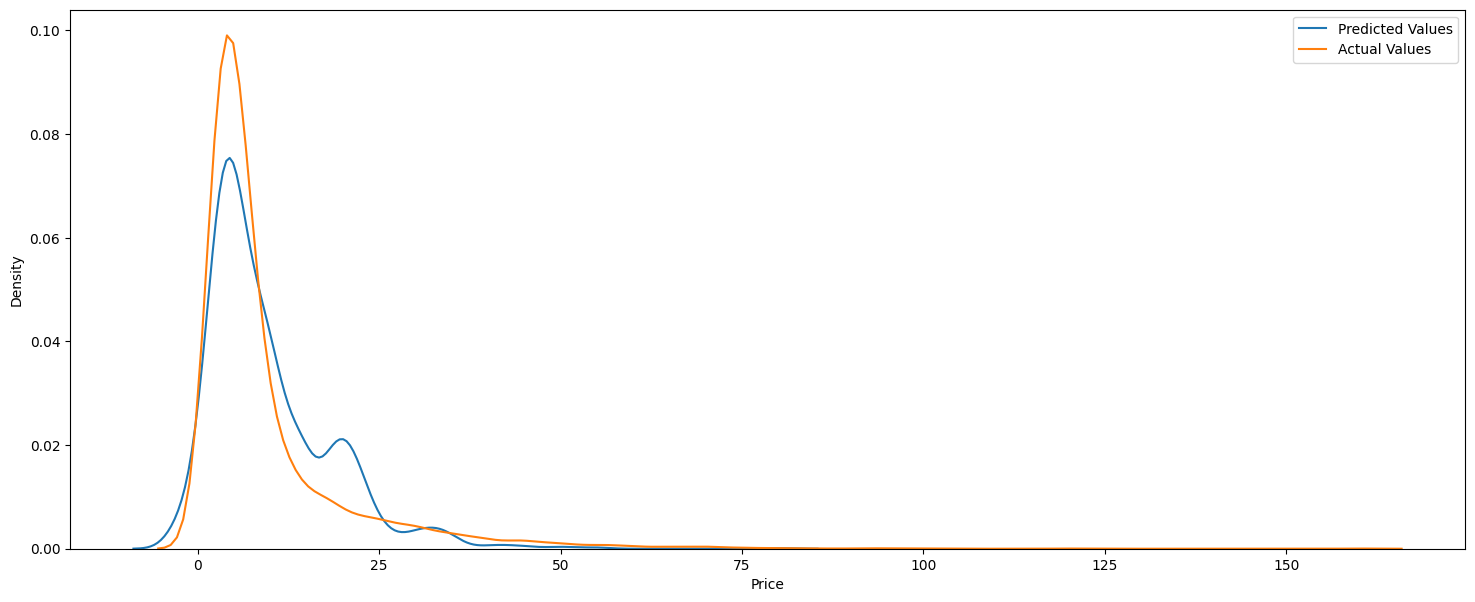

In [ ]:
plt.figure(figsize=(18, 7))
ax1 = sns.distplot(y_hat, hist=False, label='Predicted Values')
sns.distplot(y, hist=False, label='Actual Values', ax=ax1)
plt.legend()
plt.show()
plt.close()
plt.show()

In [ ]:
# Performance
print("Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = True))
print("Root Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = False))
print("Mean Absolute Error = ", mean_absolute_error(y_test, y_hat))
print("R-Squared: = ", r2_score(y_test, y_hat))

Mean Squared Error =  49.60555770842773
Root Mean Squared Error =  7.043121304395355
Mean Absolute Error =  4.319770181309899
R-Squared: =  0.5983034045765845


Linear Regression (Seats | Price)

In [ ]:
X = df[["Seats"]]
y = df["Price"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)

lr = LinearRegression()

lr.fit(x_train, y_train)

y_hat = lr.predict(x_test)

pd.DataFrame({"Actual": y_test, "Predicted": y_hat}).head()

Actual  Predicted
4859 5.38    9.31      
2650 12.90   9.31      
727  3.25    9.31      
3960 10.82   9.31      
421  4.35    9.31

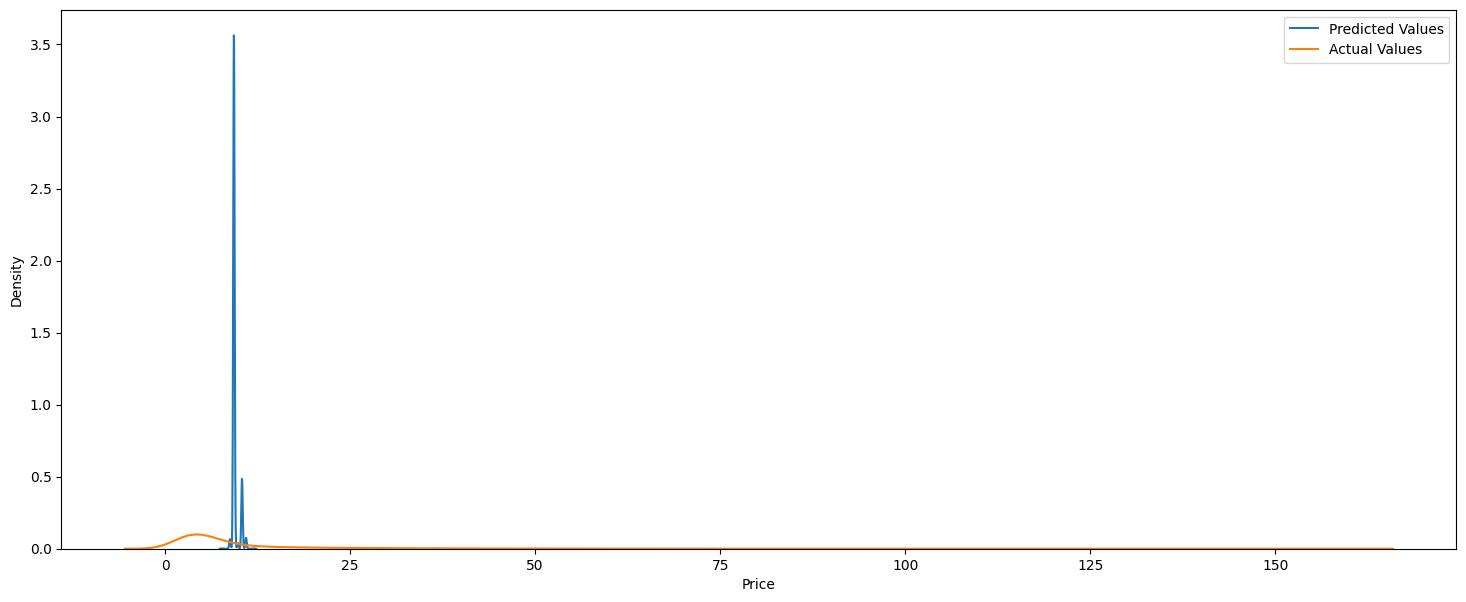

In [ ]:
plt.figure(figsize=(18, 7))
ax1 = sns.distplot(y_hat, hist=False, label='Predicted Values')
sns.distplot(y, hist=False, label='Actual Values', ax=ax1)
plt.legend()
plt.show()
plt.close()
plt.show()

In [ ]:
# Performance
print("Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = True))
print("Root Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = False))
print("Mean Absolute Error = ", mean_absolute_error(y_test, y_hat))
print("R-Squared: = ", r2_score(y_test, y_hat))

Mean Squared Error =  122.90133507192914
Root Mean Squared Error =  11.086087455542156
Mean Absolute Error =  7.132753701258022
R-Squared: =  0.00476780925297815


Simple Linear Regression Evaluation

As Root Mean Squared Error, R-Squared and Mean Absolute Error is best of Power bhp so it is good to predict price

Multiple Linear Regression

In [ ]:
X = df[["Year", "Engine CC", "Power bph", "Seats"]]
y = df["Price"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)

lr = LinearRegression()

lr.fit(x_train, y_train)

y_hat = lr.predict(x_test)

pd.DataFrame({"Actual": y_test, "Predicted": y_hat}).head()


Actual  Predicted
4859 5.38    8.71      
2650 12.90   15.10     
727  3.25    0.59      
3960 10.82   10.68     
421  4.35    7.29

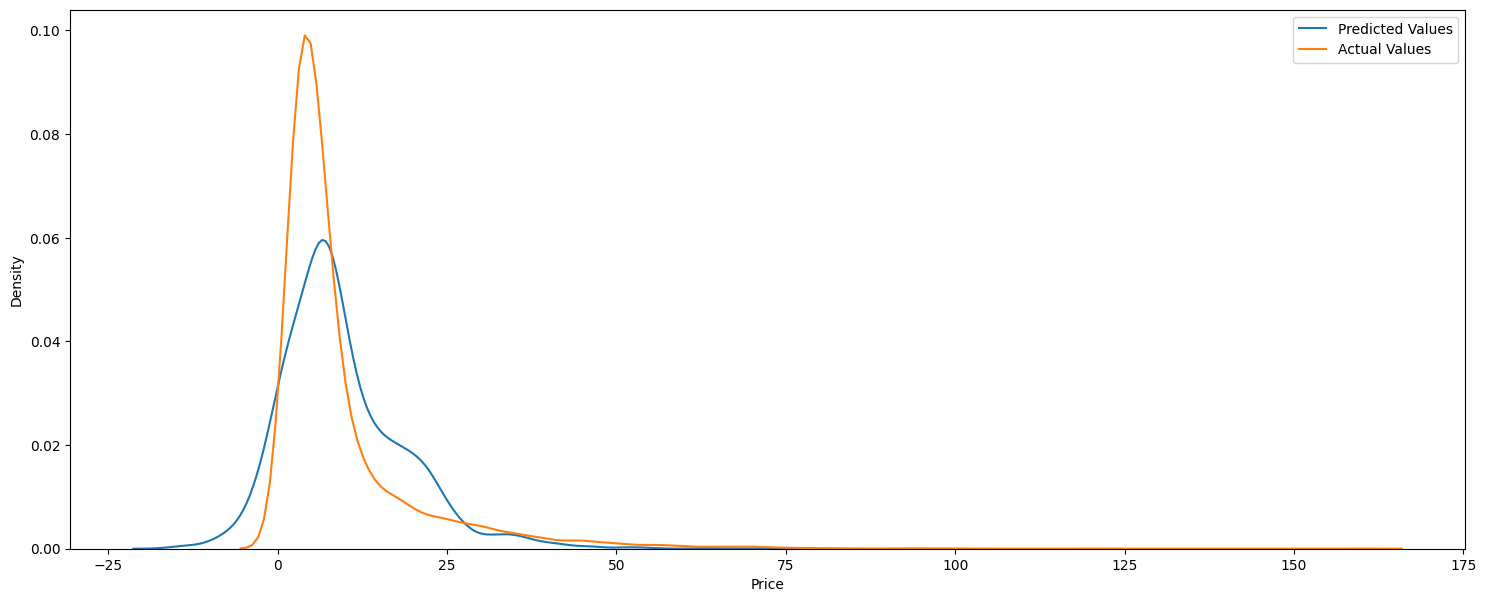

In [ ]:
plt.figure(figsize=(18, 7))
ax1 = sns.distplot(y_hat, hist=False, label='Predicted Values')
sns.distplot(y, hist=False, label='Actual Values', ax=ax1)
plt.legend()
plt.savefig('Multiple Linear Regression.png')
plt.show()
plt.close()
plt.show()

In [ ]:
# Performance
print("Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = True))
print("Root Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = False))
print("Mean Absolute Error = ", mean_absolute_error(y_test, y_hat))
print("R-Squared: = ", r2_score(y_test, y_hat))

Mean Squared Error =  38.189323569345085
Root Mean Squared Error =  6.179751092830931
Mean Absolute Error =  3.8963336711624574
R-Squared: =  0.6907499488364215


Random Forest

In [ ]:
df.head()

S.No.                              Name    Location  Year  \
0  0      Maruti Wagon R LXI CNG            Mumbai      2010   
1  1      Hyundai Creta 1.6 CRDi SX Option  Pune        2015   
2  2      Honda Jazz V                      Chennai     2011   
3  3      Maruti Ertiga VDI                 Chennai     2012   
4  4      Audi A4 New 2.0 TDI Multitronic   Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage kmpl/kg  \
0  72000              CNG       Manual       First     26.60              
1  41000              Diesel    Manual       First     19.67              
2  46000              Petrol    Manual       First     18.20              
3  87000              Diesel    Manual       First     20.77              
4  40670              Diesel    Automatic    Second    15.20              

   Engine CC  Power bph  Seats  Price  
0 998.00     58.16      5.00   1.75    
1 1582.00    126.20     5.00   12.50   
2 1199.00    88.70      5.00   4.50    
3 1248.00    88.76      7.00   6.00    
4 1968.00    140.80     5.00   17.74

Random Forest (Kilometers | Price)

In [ ]:
X = df[["Year"]]
y = df["Price"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)

rf = RandomForestRegressor(n_estimators = 100, random_state = 1)

rf.fit(x_train, y_train)

y_hat = rf.predict(x_test)

pd.DataFrame({"Actual": y_test, "Predicted": y_hat}).head()

Actual  Predicted
5150 7.25    9.59      
2164 4.25    4.88      
1136 3.90    7.11      
5641 8.41    7.11      
1515 13.48   13.75

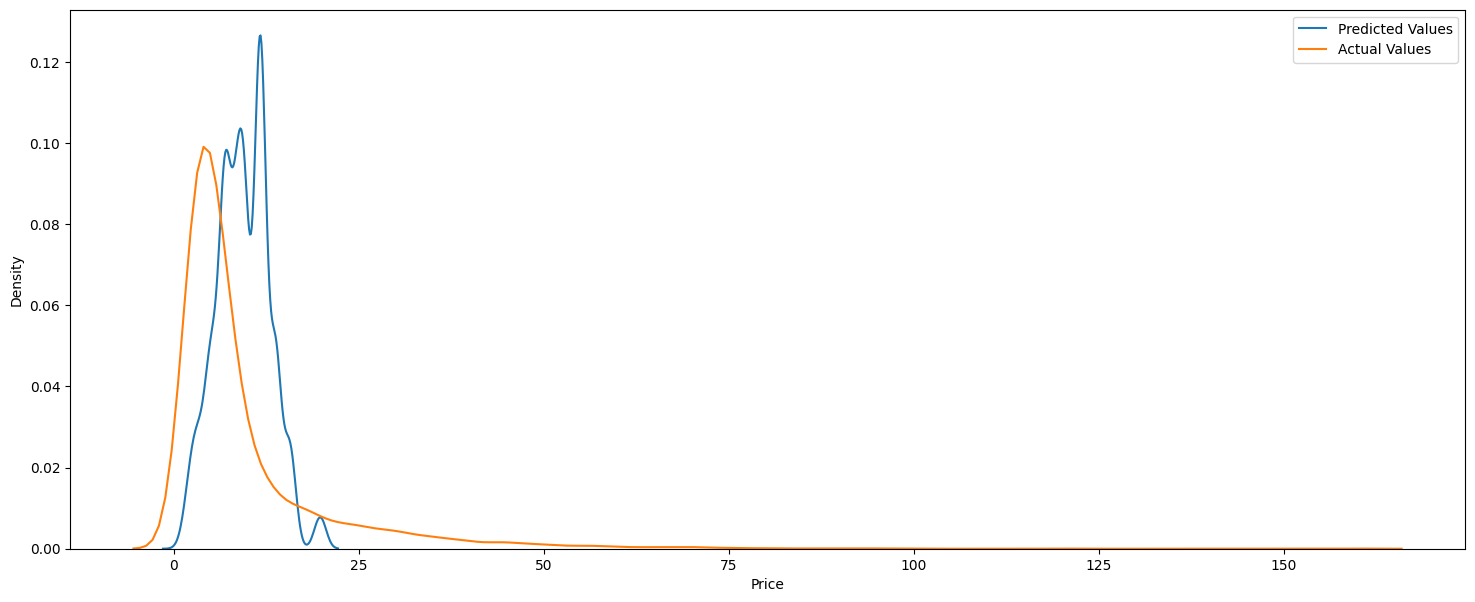

In [ ]:
plt.figure(figsize=(18, 7))
ax1 = sns.distplot(y_hat, hist=False, label='Predicted Values')
sns.distplot(y, hist=False, label='Actual Values', ax=ax1)
plt.legend()
plt.title('')
plt.savefig('Random Forest Price by Year.png')
plt.show()
plt.close()
plt.show()

In [ ]:
# Performance
print("Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = True))
print("Root Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = False))
print("Mean Absolute Error = ", mean_absolute_error(y_test, y_hat))
print("R-Squared: = ", r2_score(y_test, y_hat))

Mean Squared Error =  116.1488492854837
Root Mean Squared Error =  10.77723755354236
Mean Absolute Error =  6.885058579110939
R-Squared: =  0.07521855278172873


Random Forest (Engine CC | Price)

In [ ]:
X = df[["Engine CC"]]
y = df["Price"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)

rf = RandomForestRegressor(n_estimators = 100, random_state = 1)

rf.fit(x_train, y_train)

y_hat = rf.predict(x_test)

pd.DataFrame({"Actual": y_test, "Predicted": y_hat}).head()

Actual  Predicted
5150 7.25    14.07     
2164 4.25    5.68      
1136 3.90    5.65      
5641 8.41    7.22      
1515 13.48   9.72

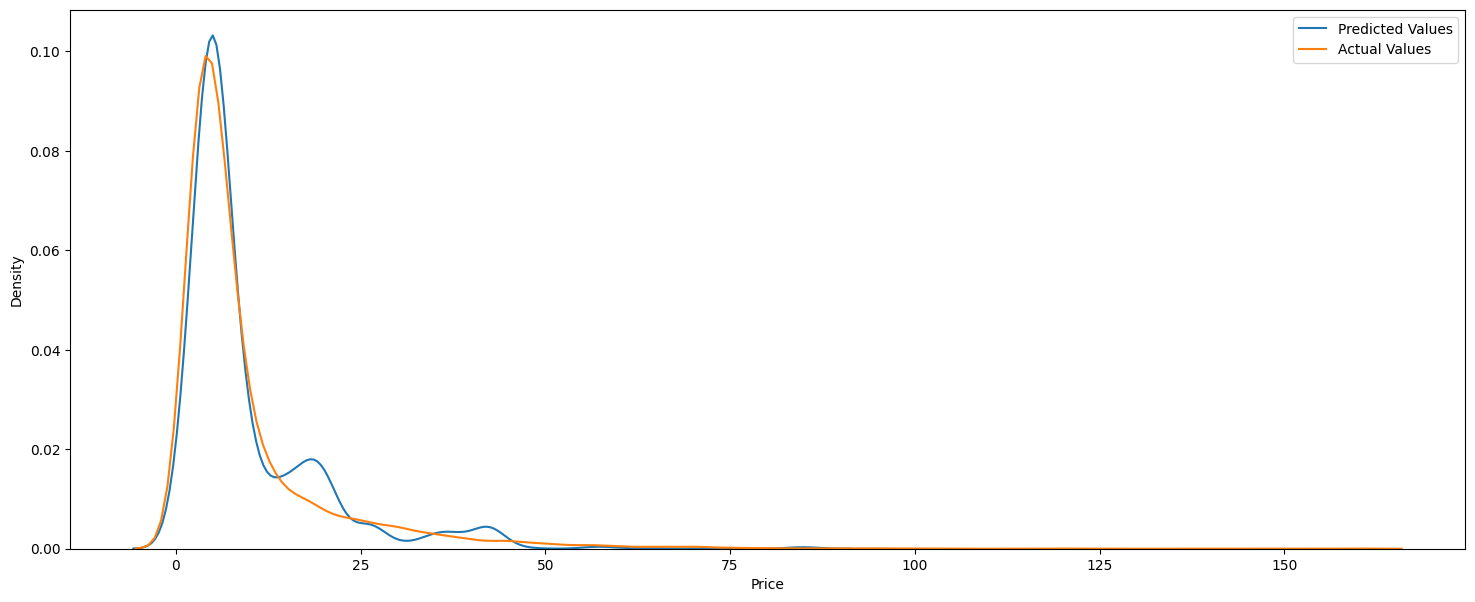

In [ ]:
plt.figure(figsize=(18, 7))
ax1 = sns.distplot(y_hat, hist=False, label='Predicted Values')
sns.distplot(y, hist=False, label='Actual Values', ax=ax1)
plt.legend()
plt.title('')
plt.savefig('Random Forest Price by Engine CC.png')
plt.show()
plt.close()
plt.show()

In [ ]:
# Performance
print("Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = True))
print("Root Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = False))
print("Mean Absolute Error = ", mean_absolute_error(y_test, y_hat))
print("R-Squared: = ", r2_score(y_test, y_hat))

Mean Squared Error =  52.43186135844851
Root Mean Squared Error =  7.240984833463505
Mean Absolute Error =  3.71961937535334
R-Squared: =  0.5825355746036323


Random Forest (Power bph | Price)

In [ ]:
X = df[["Power bph"]]
y = df["Price"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)

rf = RandomForestRegressor(n_estimators = 100, random_state = 1)

rf.fit(x_train, y_train)

y_hat = rf.predict(x_test)

pd.DataFrame({"Actual": y_test, "Predicted": y_hat}).head()


Actual  Predicted
5150 7.25    10.70     
2164 4.25    4.33      
1136 3.90    4.81      
5641 8.41    11.01     
1515 13.48   10.63

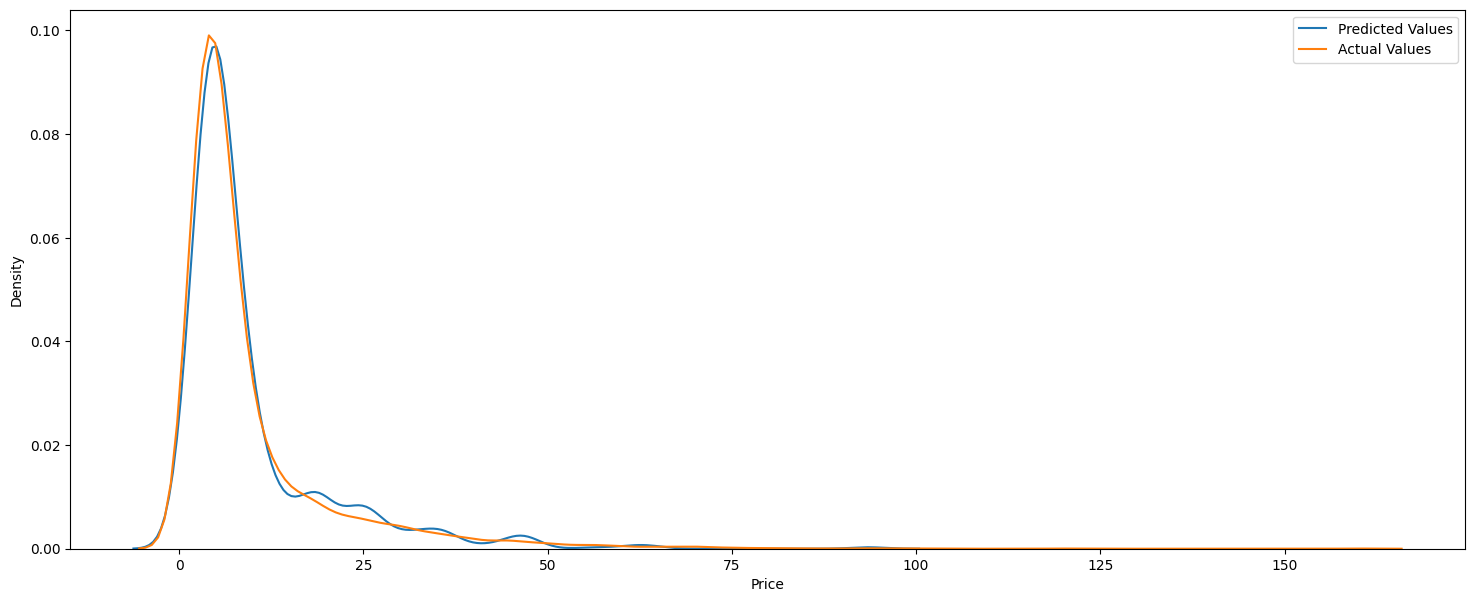

In [ ]:
plt.figure(figsize=(18, 7))
ax1 = sns.distplot(y_hat, hist=False, label='Predicted Values')
sns.distplot(y, hist=False, label='Actual Values', ax=ax1)
plt.legend()
plt.title('')
plt.savefig('Random Forest Price by Power bph.png')
plt.show()
plt.close()
plt.show()

In [ ]:
# Performance
print("Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = True))
print("Root Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = False))
print("Mean Absolute Error = ", mean_absolute_error(y_test, y_hat))
print("R-Squared: = ", r2_score(y_test, y_hat))

Mean Squared Error =  36.11952408461719
Root Mean Squared Error =  6.009952086715599
Mean Absolute Error =  2.804879087196865
R-Squared: =  0.7124150091775197


Random Forest (Seats | Price)

In [ ]:
X = df[["Seats"]]
y = df["Price"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)

rf = RandomForestRegressor(n_estimators = 100, random_state = 1)

rf.fit(x_train, y_train)

y_hat = rf.predict(x_test)

pd.DataFrame({"Actual": y_test, "Predicted": y_hat}).head()



Actual  Predicted
5150 7.25    14.59     
2164 4.25    8.51      
1136 3.90    8.51      
5641 8.41    14.59     
1515 13.48   7.56

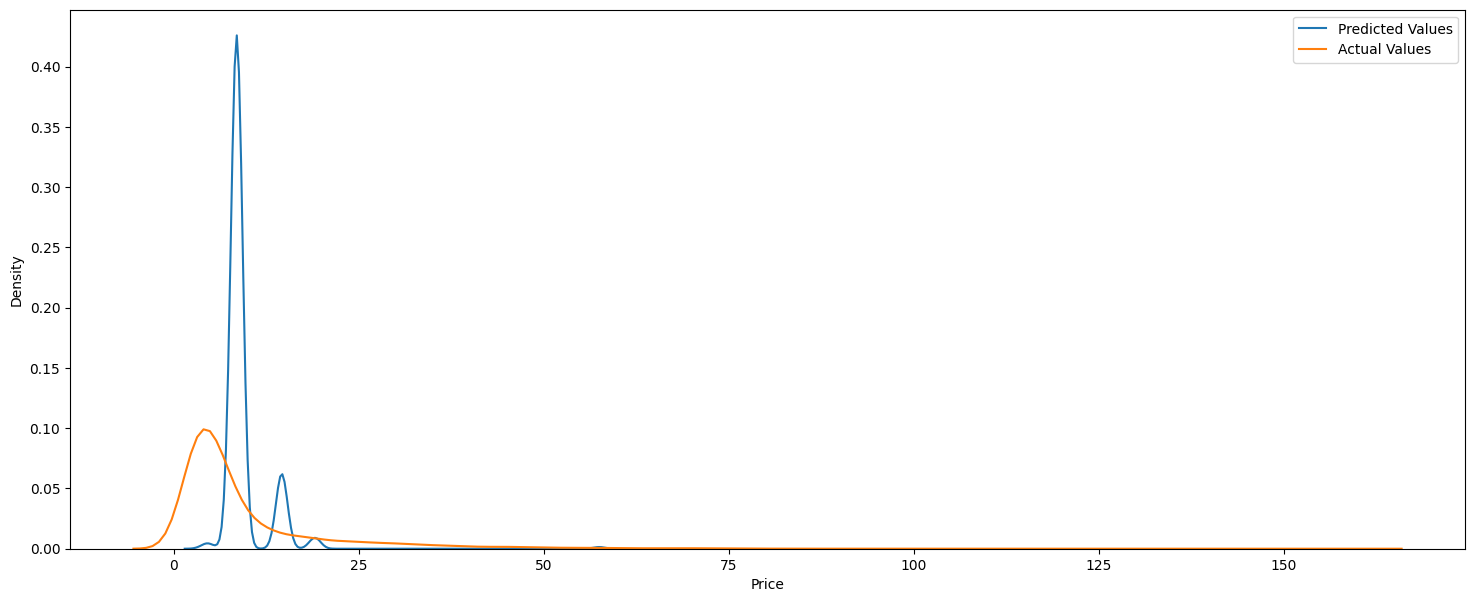

In [ ]:
plt.figure(figsize=(18, 7))
ax1 = sns.distplot(y_hat, hist=False, label='Predicted Values')
sns.distplot(y, hist=False, label='Actual Values', ax=ax1)
plt.legend()
plt.title('')
plt.savefig('Random Forest Price by Seats.png')
plt.show()
plt.close()
plt.show()

In [ ]:
# Performance
print("Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = True))
print("Root Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = False))
print("Mean Absolute Error = ", mean_absolute_error(y_test, y_hat))
print("R-Squared: = ", r2_score(y_test, y_hat))

Mean Squared Error =  112.14260363846006
Root Mean Squared Error =  10.589740489665461
Mean Absolute Error =  6.706888631515043
R-Squared: =  0.10711642925797449


Multiple Random Forest

In [ ]:
X = df[["Year", "Engine CC", "Power bph", "Seats"]]
y = df["Price"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)

rf = RandomForestRegressor(n_estimators = 100, random_state = 1)

rf.fit(x_train, y_train)

y_hat = rf.predict(x_test)
print(y_hat)

pd.DataFrame({"Actual": y_test, "Predicted": y_hat}).head()

[ 8.3965225   2.49291786  4.38084108 ...  6.15588917 28.55386302
  4.9790652 ]


Actual  Predicted
5150 7.25    8.40      
2164 4.25    2.49      
1136 3.90    4.38      
5641 8.41    9.26      
1515 13.48   14.24

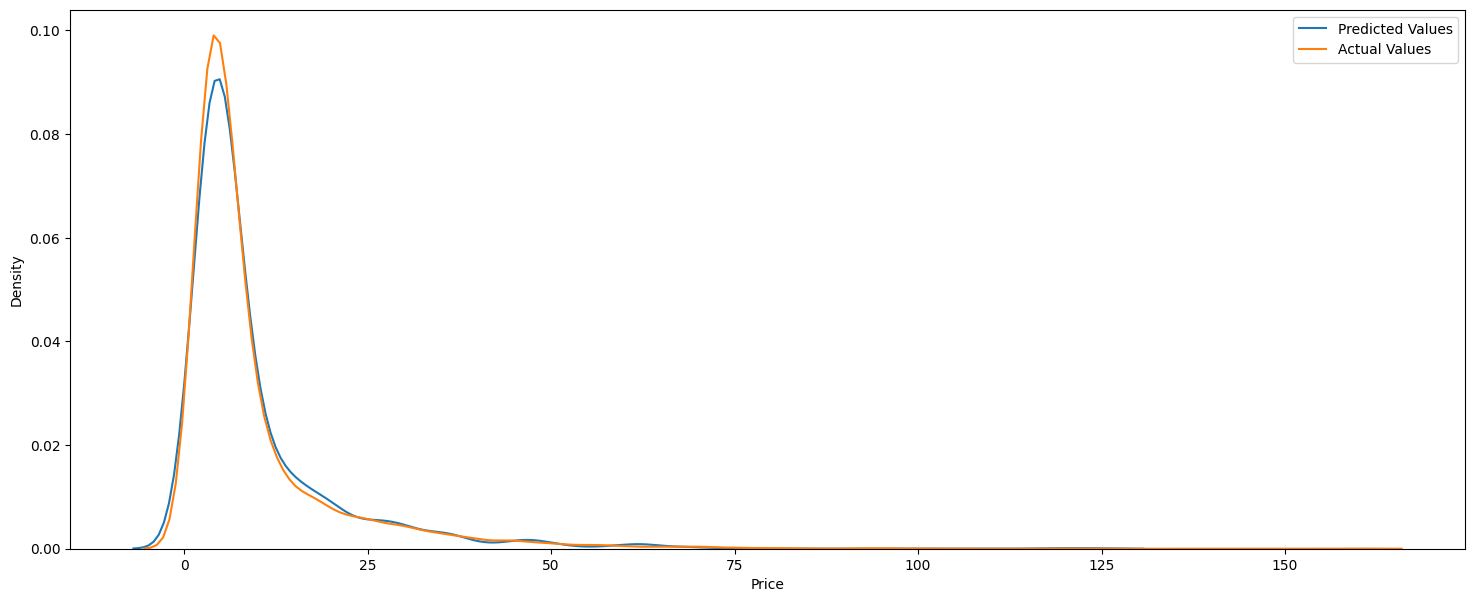

In [ ]:
plt.figure(figsize=(18, 7))
ax1 = sns.distplot(y_hat, hist=False, label='Predicted Values')
sns.distplot(y, hist=False, label='Actual Values', ax=ax1)
plt.legend()
plt.title('')
plt.savefig('Multiple Random Forest.png')
plt.show()
plt.close()
plt.show()

In [ ]:
# Performance
print("Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = True))
print("Root Mean Squared Error = ", mean_squared_error(y_test, y_hat, squared = False))
print("Mean Absolute Error = ", mean_absolute_error(y_test, y_hat))
print("R-Squared: = ", r2_score(y_test, y_hat))

Mean Squared Error =  23.041052751313625
Root Mean Squared Error =  4.800109660342525
Mean Absolute Error =  1.8776449500560701
R-Squared: =  0.8165462831541336
